## <h1><center>**Patient Survival Prediction**</center></h1>

The objective of the project is to predict whether a patient survives when admitted in an hospital with any health condition or in an emergency case. Dataset receives data submissions from intensive care units (ICUs) throughout multiple hospitals in different ethnicity, biochemical, physiological and demographic information required for the calculation of severity and diagnosis scores, together some data on therapies received during the ICU stay and information about patient outcomes

In [1474]:
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, LabelEncoder, StandardScaler, PowerTransformer
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve, average_precision_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [1221]:
from matplotlib import rcParams

rcParams['figure.figsize'] = (10,5) # figure size in inches
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_colwidth', 100)

## Index:
* [Checking Data Types](#first-bullet)
* [Univariate Analysis](#second-bullet)
* [Bivariate Analysis](#third-bullet)
* [Multivariate Analysis](#fourth-bullet)
* [Data Preprocessing](#fifth-bullet)
* [Missing Values](#sixth-bullet)
* [Encoding](#seventh-bullet)
* [Model Building](#eight-bullet)
* [Model Tuning](#tenth-bullet)

## Reading The DataSet

In [925]:
df = pd.read_csv('patient-survival.csv')
df.shape

(91713, 85)

In [926]:
df.head()

encounter_id  patient_id  hospital_id   age    bmi  elective_surgery  \
0         66154       25312          118  68.0  22.73                 0   
1        114252       59342           81  77.0  27.42                 0   
2        119783       50777          118  25.0  31.95                 0   
3         79267       46918          118  81.0  22.64                 1   
4         92056       34377           33  19.0    NaN                 0   

   ethnicity gender  height           icu_admit_source  icu_id icu_stay_type  \
0  Caucasian      M   180.3                      Floor      92         admit   
1  Caucasian      F   160.0                      Floor      90         admit   
2  Caucasian      F   172.7       Accident & Emergency      93         admit   
3  Caucasian      F   165.1  Operating Room / Recovery      92         admit   
4  Caucasian      M   188.0       Accident & Emergency      91         admit   

       icu_type  pre_icu_los_days  weight  apache_2_diagnosis  \
0         CTICU          0.541667    73.9               113.0   
1  Med-Surg ICU          0.927778    70.2               108.0   
2  Med-Surg ICU          0.000694    95.3               122.0   
3         CTICU          0.000694    61.7               203.0   
4  Med-Surg ICU          0.073611     NaN               119.0   

   apache_3j_diagnosis  apache_post_operative  arf_apache  gcs_eyes_apache  \
0               502.01                      0         0.0              3.0   
1               203.01                      0         0.0              1.0   
2               703.03                      0         0.0              3.0   
3              1206.03                      1         0.0              4.0   
4               601.01                      0         0.0              NaN   

   gcs_motor_apache  gcs_unable_apache  gcs_verbal_apache  heart_rate_apache  \
0               6.0                0.0                4.0              118.0   
1               3.0                0.0                1.0              120.0   
2               6.0                0.0                5.0              102.0   
3               6.0                0.0                5.0              114.0   
4               NaN                NaN                NaN               60.0   

   intubated_apache  map_apache  resprate_apache  temp_apache  \
0               0.0        40.0             36.0         39.3   
1               0.0        46.0             33.0         35.1   
2               0.0        68.0             37.0         36.7   
3               1.0        60.0              4.0         34.8   
4               0.0       103.0             16.0         36.7   

   ventilated_apache  d1_diasbp_max  d1_diasbp_min  d1_diasbp_noninvasive_max  \
0                0.0           68.0           37.0                       68.0   
1                1.0           95.0           31.0                       95.0   
2                0.0           88.0           48.0                       88.0   
3                1.0           48.0           42.0                       48.0   
4                0.0           99.0           57.0                       99.0   

   d1_diasbp_noninvasive_min  d1_heartrate_max  d1_heartrate_min  d1_mbp_max  \
0                       37.0             119.0              72.0        89.0   
1                       31.0             118.0              72.0       120.0   
2                       48.0              96.0              68.0       102.0   
3                       42.0             116.0              92.0        84.0   
4                       57.0              89.0              60.0       104.0   

   d1_mbp_min  d1_mbp_noninvasive_max  d1_mbp_noninvasive_min  \
0        46.0                    89.0                    46.0   
1        38.0                   120.0                    38.0   
2        68.0                   102.0                    68.0   
3        84.0                    84.0                    84.0   
4        90.0                   104.0         

## Data Types

In [927]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91713 entries, 0 to 91712
Data columns (total 85 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   encounter_id                   91713 non-null  int64  
 1   patient_id                     91713 non-null  int64  
 2   hospital_id                    91713 non-null  int64  
 3   age                            87485 non-null  float64
 4   bmi                            88284 non-null  float64
 5   elective_surgery               91713 non-null  int64  
 6   ethnicity                      90318 non-null  object 
 7   gender                         91688 non-null  object 
 8   height                         90379 non-null  float64
 9   icu_admit_source               91601 non-null  object 
 10  icu_id                         91713 non-null  int64  
 11  icu_stay_type                  91713 non-null  object 
 12  icu_type                       91713 non-null 

## Data Summary

In [928]:
df.describe(include='all')

encounter_id     patient_id   hospital_id           age  \
count    91713.000000   91713.000000  91713.000000  87485.000000   
unique            NaN            NaN           NaN           NaN   
top               NaN            NaN           NaN           NaN   
freq              NaN            NaN           NaN           NaN   
mean     65606.079280   65537.131464    105.669262     62.309516   
std      37795.088538   37811.252183     62.854406     16.775119   
min          1.000000       1.000000      2.000000     16.000000   
25%      32852.000000   32830.000000     47.000000     52.000000   
50%      65665.000000   65413.000000    109.000000     65.000000   
75%      98342.000000   98298.000000    161.000000     75.000000   
max     131051.000000  131051.000000    204.000000     89.000000   

                 bmi  elective_surgery  ethnicity gender        height  \
count   88284.000000      91713.000000      90318  91688  90379.000000   
unique           NaN               NaN          6      2           NaN   
top              NaN               NaN  Caucasian      M           NaN   
freq             NaN               NaN      70684  49469           NaN   
mean       29.185818          0.183736        NaN    NaN    169.641588   
std         8.275142          0.387271        NaN    NaN     10.795378   
min        14.844926          0.000000        NaN    NaN    137.200000   
25%        23.641975          0.000000        NaN    NaN    162.500000   
50%        27.654655          0.000000        NaN    NaN    170.100000   
75%        32.930206          0.000000        NaN    NaN    177.800000   
max        67.814990          1.000000        NaN    NaN    195.590000   

            icu_admit_source        icu_id icu_stay_type      icu_type  \
count                  91601  91713.000000         91713         91713   
unique                     5           NaN             3             8   
top     Accident & Emergency           NaN         admit  Med-Surg ICU   
freq                   54060           NaN         86183         50586   
mean                     NaN    508.357692           NaN           NaN   
std                      NaN    228.989661           NaN           NaN   
min                      NaN     82.000000           NaN           NaN   
25%                      NaN    369.000000           NaN           NaN   
50%                      NaN    504.000000           NaN           NaN   
75%                      NaN    679.000000           NaN           NaN   
max                      NaN    927.000000           NaN           NaN   

        pre_icu_los_days        weight  apache_2_diagnosis  \
count       91713.000000  88993.000000        90051.000000   
unique               NaN           NaN                 NaN   
top                  NaN           NaN                 NaN   
freq                 NaN           NaN                 NaN   
mean            0.835766     84.028340          185.401739   
std             2.487756     25.011497           86.050882   
min           -24.947222     38.600000          101.000000   
25%             0.035417     66.800000          113.000000   
50%             0.138889     80.300000          122.000000   
75%             0.409028     97.100000          301.000000   
max           159.090972    186.000000          308.000000   

        apache_3j_diagnosis  apache_post_operative    arf_apache  \
count          90612.000000           91713.000000  90998.000000   
unique                  NaN                    NaN           NaN   
top                     NaN                    NaN           NaN   
freq                    NaN                    NaN           NaN   
mean             558.216377               0.201106      0.027979   
std              463.266985               0.400829      0.164912   
min                0.010000               0.000000      0.000000   
25%              203.010000               0.000000      0.000000   
50%              409.020000               0.000000      0

## Removing unnecessary columns

In [929]:
df['patient_id'].duplicated().sum()

0

In [930]:
df['encounter_id'].duplicated().sum()

0

In [931]:
df['icu_id'].duplicated().sum()

91472

In [932]:
df['hospital_id'].duplicated().sum()

91566

In [933]:
# Since these columns are arbitrary and are only used for identification, we will drop them

In [934]:
df = df.drop(columns=['Unnamed: 83', 'patient_id', 'encounter_id', 'hospital_id', 'icu_id'])

In [935]:
# New shape
df.shape

(91713, 80)

In [936]:
# duplicate rows
df.duplicated().sum()

0

In [937]:
apache_prob = df['apache_4a_hospital_death_prob']
actual = df['hospital_death']

In [938]:
actual = actual[~apache_prob.isna()]
apache_prob = apache_prob[~apache_prob.isna()]

In [939]:
apache_pred = [1 if x>=0.5 else 0 for x in apache_prob]

## Checking Data Types <a class="anchor" id="first-bullet"></a>

In [940]:
df_cat = df.select_dtypes('object')
df_cat.shape

(91713, 7)

In [941]:
df_num = df.select_dtypes('number')
df_num.shape

(91713, 73)

In [942]:
# No of categories in categorical variables

In [943]:
for col in df_cat.columns:
    print(f'{col:>20}: ',df_cat[col].value_counts().count())

           ethnicity:  6
              gender:  2
    icu_admit_source:  5
       icu_stay_type:  3
            icu_type:  8
apache_3j_bodysystem:  11
 apache_2_bodysystem:  10


In [944]:
# some numerical columns have very few unique values, they are possibly categorical
categorical_columns = []
for col in df_num.columns:
    cats = df_num[col].value_counts()
    if cats.count() <= 20: 
        categorical_columns.append(col)
        print(f'{col:>30}: ',cats.index.to_list())

              elective_surgery:  [0, 1]
         apache_post_operative:  [0, 1]
                    arf_apache:  [0.0, 1.0]
               gcs_eyes_apache:  [4.0, 3.0, 1.0, 2.0]
              gcs_motor_apache:  [6.0, 5.0, 1.0, 4.0, 3.0, 2.0]
             gcs_unable_apache:  [0.0, 1.0]
             gcs_verbal_apache:  [5.0, 1.0, 4.0, 3.0, 2.0]
              intubated_apache:  [0.0, 1.0]
             ventilated_apache:  [0.0, 1.0]
                          aids:  [0.0, 1.0]
                     cirrhosis:  [0.0, 1.0]
             diabetes_mellitus:  [0.0, 1.0]
               hepatic_failure:  [0.0, 1.0]
             immunosuppression:  [0.0, 1.0]
                      leukemia:  [0.0, 1.0]
                      lymphoma:  [0.0, 1.0]
   solid_tumor_with_metastasis:  [0.0, 1.0]
                hospital_death:  [0, 1]


In [945]:
# All these variables need to be converted to categorical

In [946]:
# separate numerical and categorical again

In [947]:
for col in categorical_columns:
    df[col] = df[col].astype('object')

In [948]:
df_num = df.select_dtypes('number')
numerical_columns = df_num.columns
df_num.shape

(91713, 55)

In [949]:
df_cat = df.select_dtypes('object')
categorical_columns = df_cat.columns
df_cat.shape

(91713, 25)

In [950]:
# Display categories of multicategory variables
for col in categorical_columns:
    if df_cat[col].value_counts().count()>2:
        print('\n')
        print(df_cat[col].value_counts(normalize=True)*100)



Caucasian           78.261255
African American    10.570429
Other/Unknown        4.842888
Hispanic             4.202927
Asian                1.250028
Native American      0.872473
Name: ethnicity, dtype: float64


Accident & Emergency         59.016823
Operating Room / Recovery    20.428816
Floor                        17.042390
Other Hospital                2.574208
Other ICU                     0.937763
Name: icu_admit_source, dtype: float64


admit       93.970320
transfer     5.419079
readmit      0.610600
Name: icu_stay_type, dtype: float64


Med-Surg ICU    55.156848
MICU             8.390305
Neuro ICU        8.368497
CCU-CTICU        7.802602
SICU             5.679675
Cardiac ICU      5.207550
CSICU            5.029821
CTICU            4.364703
Name: icu_type, dtype: float64


4.0    70.140961
3.0    15.435577
1.0     9.212577
2.0     5.210885
Name: gcs_eyes_apache, dtype: float64


6.0    79.009486
5.0     8.887454
1.0     6.171781
4.0     5.003786
3.0     0.583441
2.0     0.

In [951]:
# Undefined Diagnoses repeats two times in apache_2_bodysystem, we need to replace it
df['apache_2_bodysystem'] = df['apache_2_bodysystem'].replace('Undefined Diagnoses', 'Undefined diagnoses')

In [952]:
# Total no of categories across all variables
df[categorical_columns].nunique().sort_values(ascending=False).sum()

89

## Univariate Analysis <a class="anchor" id="second-bullet"></a>

### Target Variable - hospital_death

In [206]:
df['hospital_death'].value_counts(normalize=True)

0    0.913698
1    0.086302
Name: hospital_death, dtype: float64

<AxesSubplot:ylabel='hospital_death'>

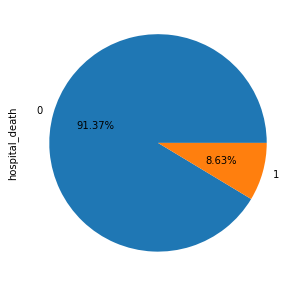

In [207]:
df['hospital_death'].value_counts().plot(kind='pie', autopct='%0.2f%%')

<AxesSubplot:ylabel='cirrhosis'>

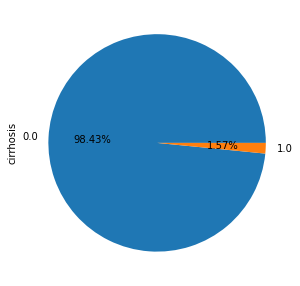

In [208]:
df['cirrhosis'].value_counts().plot(kind='pie', autopct='%0.2f%%')

In [47]:
df[categorical_columns].describe()

elective_surgery  ethnicity gender      icu_admit_source  \
count              91713      90318  91688                 91601   
unique                 2          6      2                     5   
top                    0  Caucasian      M  Accident & Emergency   
freq               74862      70684  49469                 54060   

       icu_stay_type      icu_type  apache_post_operative  arf_apache  \
count          91713         91713                  91713     90998.0   
unique             3             8                      2         2.0   
top            admit  Med-Surg ICU                      0         0.0   
freq           86183         50586                  73269     88452.0   

        gcs_eyes_apache  gcs_motor_apache  gcs_unable_apache  \
count           89812.0           89812.0            90676.0   
unique              4.0               6.0                2.0   
top                 4.0               6.0                0.0   
freq            62995.0           70960.0            89812.0   

        gcs_verbal_apache  intubated_apache  ventilated_apache     aids  \
count             89812.0           90998.0            90998.0  90998.0   
unique                5.0               2.0                2.0      2.0   
top                   5.0               0.0                0.0      0.0   
freq              56909.0           77237.0            61358.0  90920.0   

        cirrhosis  diabetes_mellitus  hepatic_failure  immunosuppression  \
count     90998.0            90998.0          90998.0            90998.0   
unique        2.0                2.0              2.0                2.0   
top           0.0                0.0              0.0                0.0   
freq      89570.0            70506.0          89816.0            88617.0   

        leukemia  lymphoma  solid_tumor_with_metastasis apache_3j_bodysystem  \
count    90998.0   90998.0                      90998.0                90051   
unique       2.0       2.0                          2.0                   11   
top          0.0       0.0                          0.0       Cardiovascular   
freq     90355.0   90622.0                      89120.0                29999   

       apache_2_bodysystem  hospital_death  
count                90051           91713  
unique                  10               2  
top         Cardiovascular               0  
freq                 38816           83798

#### We observe that our target variable - hospital_death is moderately unbalanced

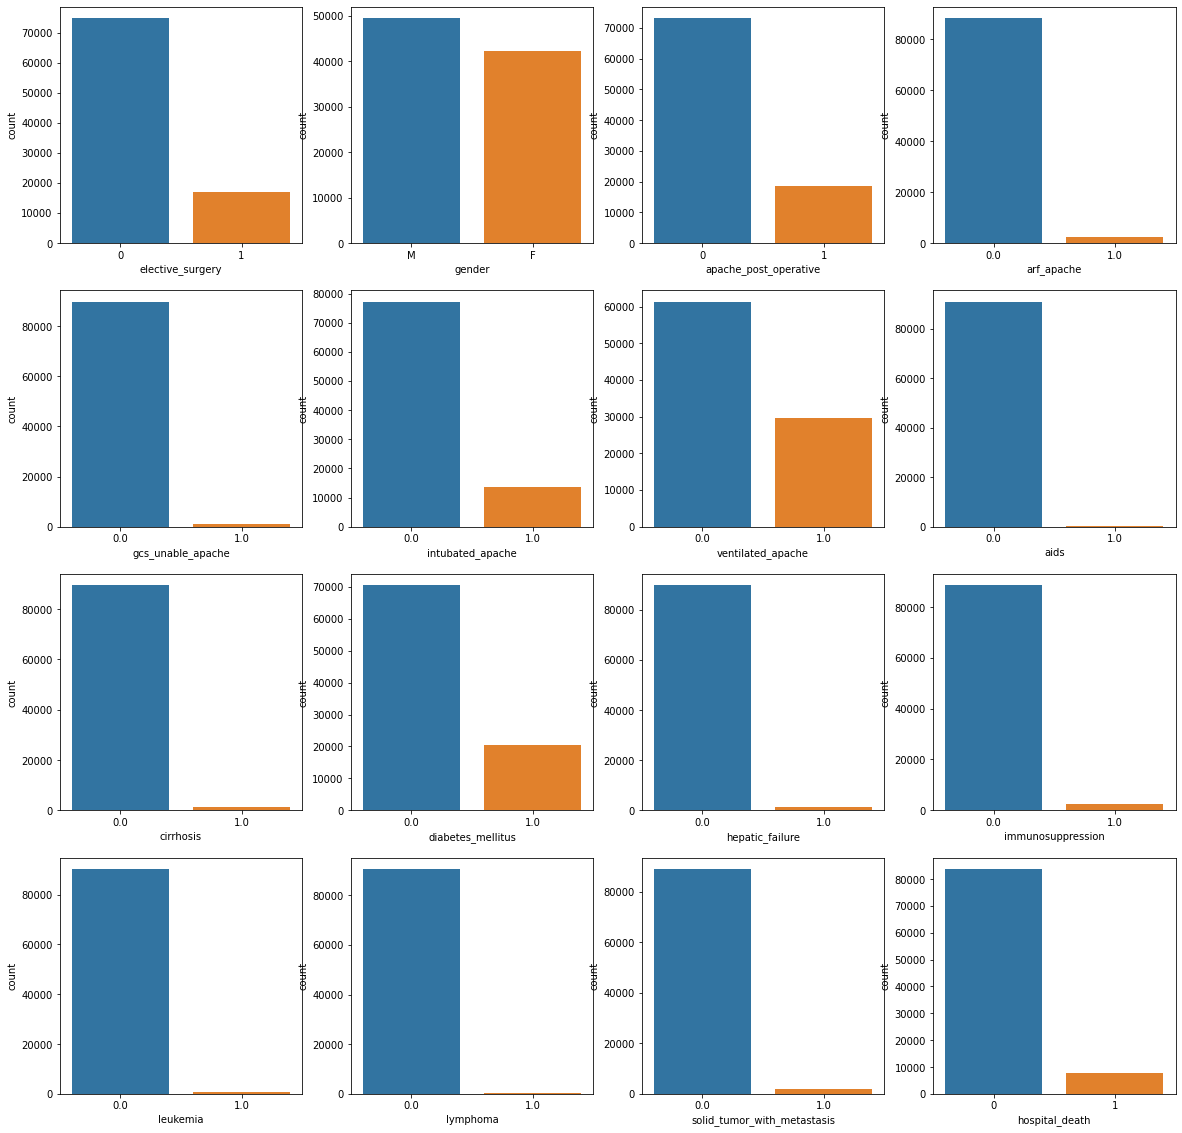

In [56]:
# some categorical variables have many categories, we will plot them separately
many_cat_cols = []

fig, ax = plt.subplots(nrows=4, ncols=4, figsize=(20,20))
i=0
for col in categorical_columns:
    
    if df[col].value_counts().count()>2:
        many_cat_cols.append(col)
        continue
    
    # row_index and col_index to use for subplot
    r = i//4
    c = i%4
    i+=1
    sns.countplot(data=df, x=col, ax=ax[r][c])

In [35]:
# plot multi category columns separately
print(many_cat_cols)

['ethnicity', 'icu_admit_source', 'icu_stay_type', 'icu_type', 'gcs_eyes_apache', 'gcs_motor_apache', 'gcs_verbal_apache', 'apache_3j_bodysystem', 'apache_2_bodysystem']


<AxesSubplot:xlabel='ethnicity', ylabel='count'>

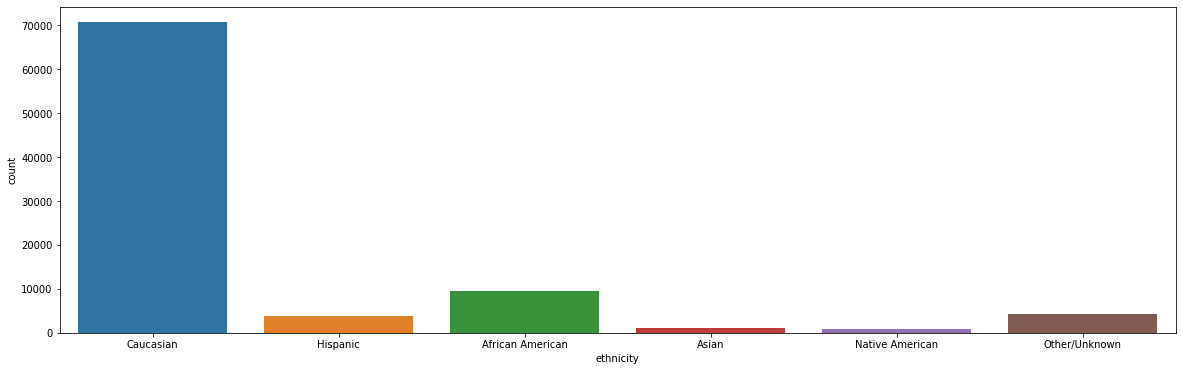

In [36]:
plt.figure(figsize=(20,6))
sns.countplot(data=df, x='ethnicity')

<AxesSubplot:xlabel='icu_admit_source', ylabel='count'>

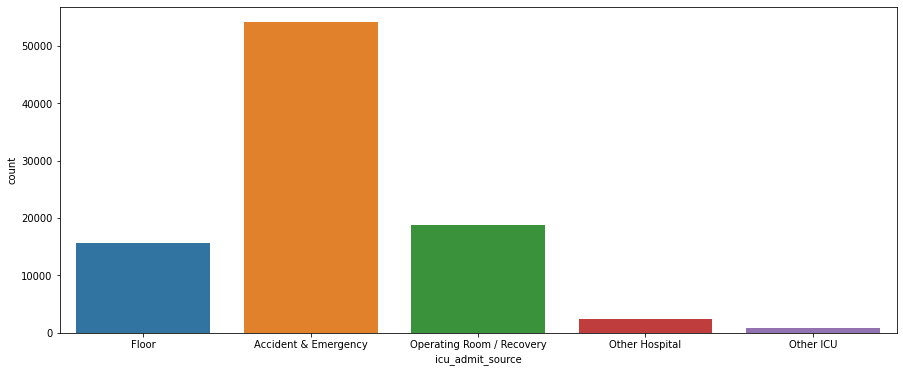

In [37]:
plt.figure(figsize=(15,6))
sns.countplot(data=df, x='icu_admit_source')

<AxesSubplot:xlabel='icu_stay_type', ylabel='count'>

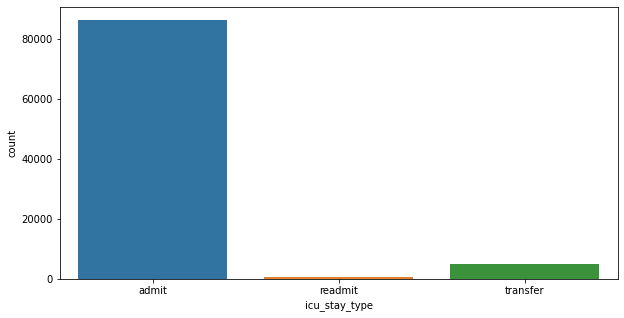

In [38]:
sns.countplot(data=df, x='icu_stay_type')

<AxesSubplot:xlabel='icu_type', ylabel='count'>

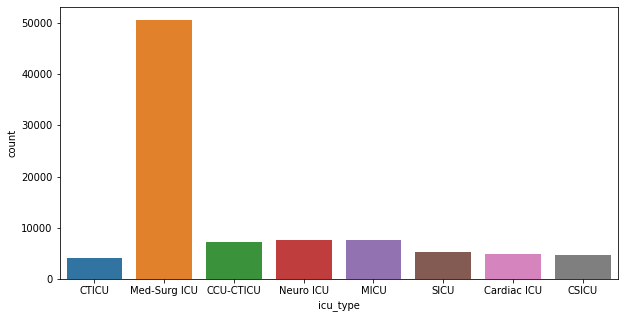

In [39]:
sns.countplot(data=df, x='icu_type')

<AxesSubplot:xlabel='gcs_eyes_apache', ylabel='count'>

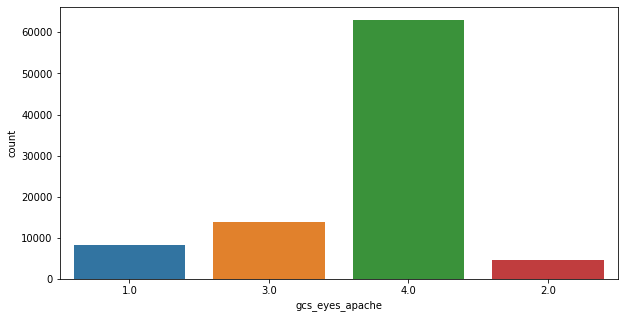

In [40]:
sns.countplot(data=df, x='gcs_eyes_apache')

<AxesSubplot:xlabel='gcs_motor_apache', ylabel='count'>

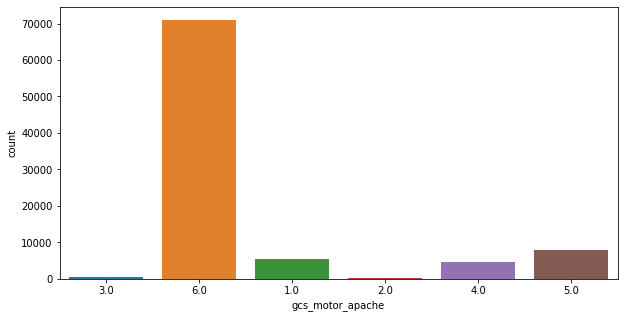

In [41]:
sns.countplot(data=df, x='gcs_motor_apache')

<AxesSubplot:xlabel='gcs_verbal_apache', ylabel='count'>

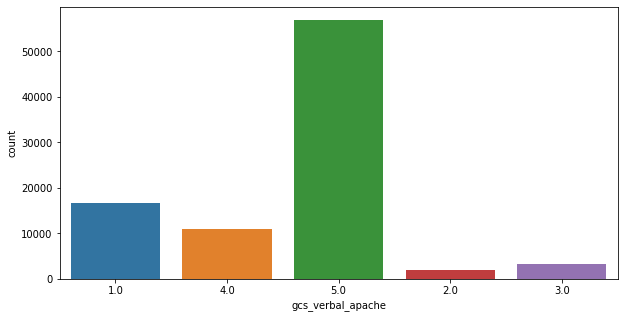

In [42]:
sns.countplot(data=df, x='gcs_verbal_apache')

<AxesSubplot:xlabel='apache_3j_bodysystem', ylabel='count'>

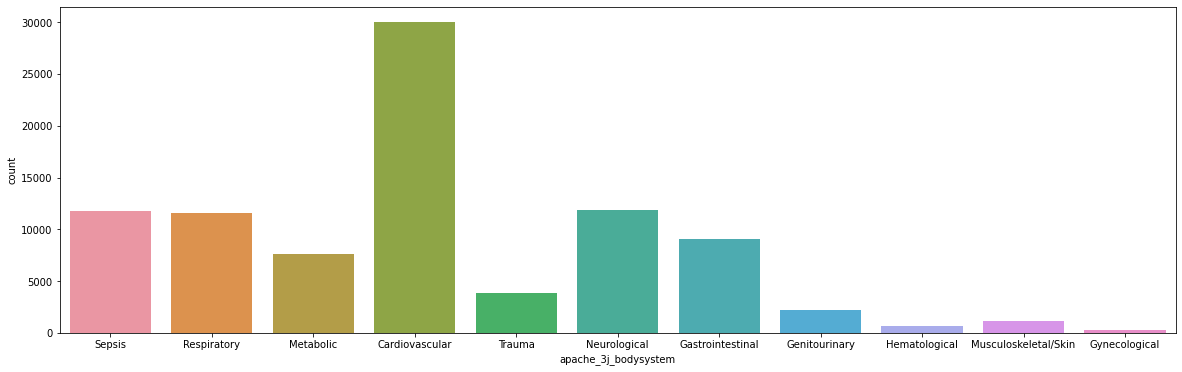

In [43]:
plt.figure(figsize=(20,6))
sns.countplot(data=df, x='apache_3j_bodysystem')

<AxesSubplot:xlabel='apache_2_bodysystem', ylabel='count'>

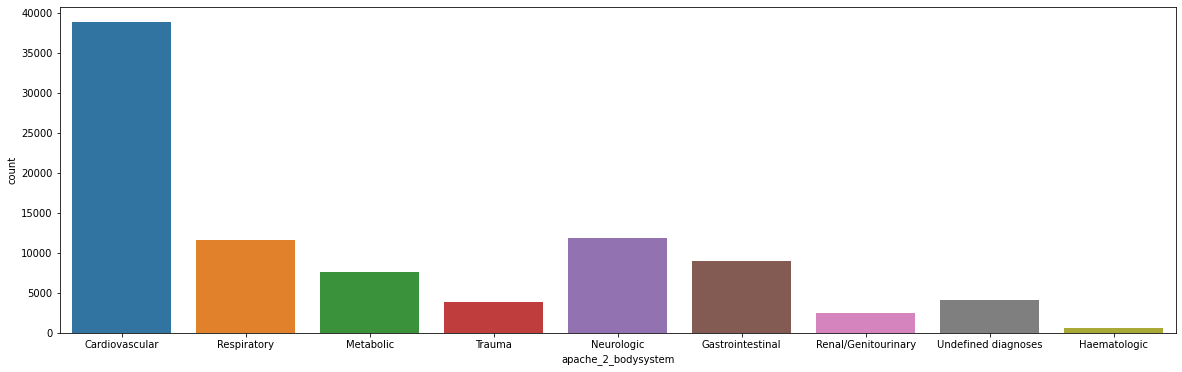

In [44]:
plt.figure(figsize=(20,6))
sns.countplot(data=df, x='apache_2_bodysystem')

In [57]:
df[numerical_columns].describe()

age           bmi        height  pre_icu_los_days  \
count  87485.000000  88284.000000  90379.000000      91713.000000   
mean      62.309516     29.185818    169.641588          0.835766   
std       16.775119      8.275142     10.795378          2.487756   
min       16.000000     14.844926    137.200000        -24.947222   
25%       52.000000     23.641975    162.500000          0.035417   
50%       65.000000     27.654655    170.100000          0.138889   
75%       75.000000     32.930206    177.800000          0.409028   
max       89.000000     67.814990    195.590000        159.090972   

             weight  apache_2_diagnosis  apache_3j_diagnosis  \
count  88993.000000        90051.000000         90612.000000   
mean      84.028340          185.401739           558.216377   
std       25.011497           86.050882           463.266985   
min       38.600000          101.000000             0.010000   
25%       66.800000          113.000000           203.010000   
50%       80.300000          122.000000           409.020000   
75%       97.100000          301.000000           703.030000   
max      186.000000          308.000000          2201.050000   

       heart_rate_apache    map_apache  resprate_apache   temp_apache  \
count       90835.000000  90719.000000     90479.000000  87605.000000   
mean           99.707932     88.015873        25.811007     36.414472   
std            30.870502     42.032412        15.106312      0.833496   
min            30.000000     40.000000         4.000000     32.100000   
25%            86.000000     54.000000        11.000000     36.200000   
50%           104.000000     67.000000        28.000000     36.500000   
75%           120.000000    125.000000        36.000000     36.700000   
max           178.000000    200.000000        60.000000     39.700000   

       d1_diasbp_max  d1_diasbp_min  d1_diasbp_noninvasive_max  \
count   91548.000000   91548.000000               90673.000000   
mean       88.491873      50.161314                  88.610513   
std        19.798379      13.317586                  19.793743   
min        46.000000      13.000000                  46.000000   
25%        75.000000      42.000000                  75.000000   
50%        86.000000      50.000000                  87.000000   
75%        99.000000      58.000000                  99.000000   
max       165.000000      90.000000                 165.000000   

       d1_diasbp_noninvasive_min  d1_heartrate_max  d1_heartrate_min  \
count               90673.000000      91568.000000      91568.000000   
mean                   50.242597        103.000568         70.321848   
std                    13.341521         22.017346         17.115903   
min                    13.000000         58.000000          0.000000   
25%                    42.000000         87.000000         60.000000   
50%                    50.000000        101.000000         69.000000   
75%                    58.000000        116.000000         81.000000   
max                    90.000000        177.000000        175.000000   

         d1_mbp_max    d1_mbp_min  d1_mbp_noninvasive_max  \
count  91493.000000  91493.000000            90234.000000   
mean     104.651339     64.871859              104.590454   
std       20.808358     15.679680               20.701171   
min       60.000000     22.000000               60.000000   
25%       90.000000     55.000000               90.000000   
50%      102.000000     64.000000              102.000000   
75%      116.000000     75.000000              116.000000   
max      184.000000    112.000000              181.000000   

       d1_mbp_noninvasive_min  d1_resprate_max  d1_resprate_min   d1_spo2_max  \
count            90234.000000     91328.000000     91328.000000  91380.000000   
mean                64.941541        28.882774        12.846279     99.241836   
std                 15.701305        10.701973         5.064943      1.794181   
min                 22.000000        14.0

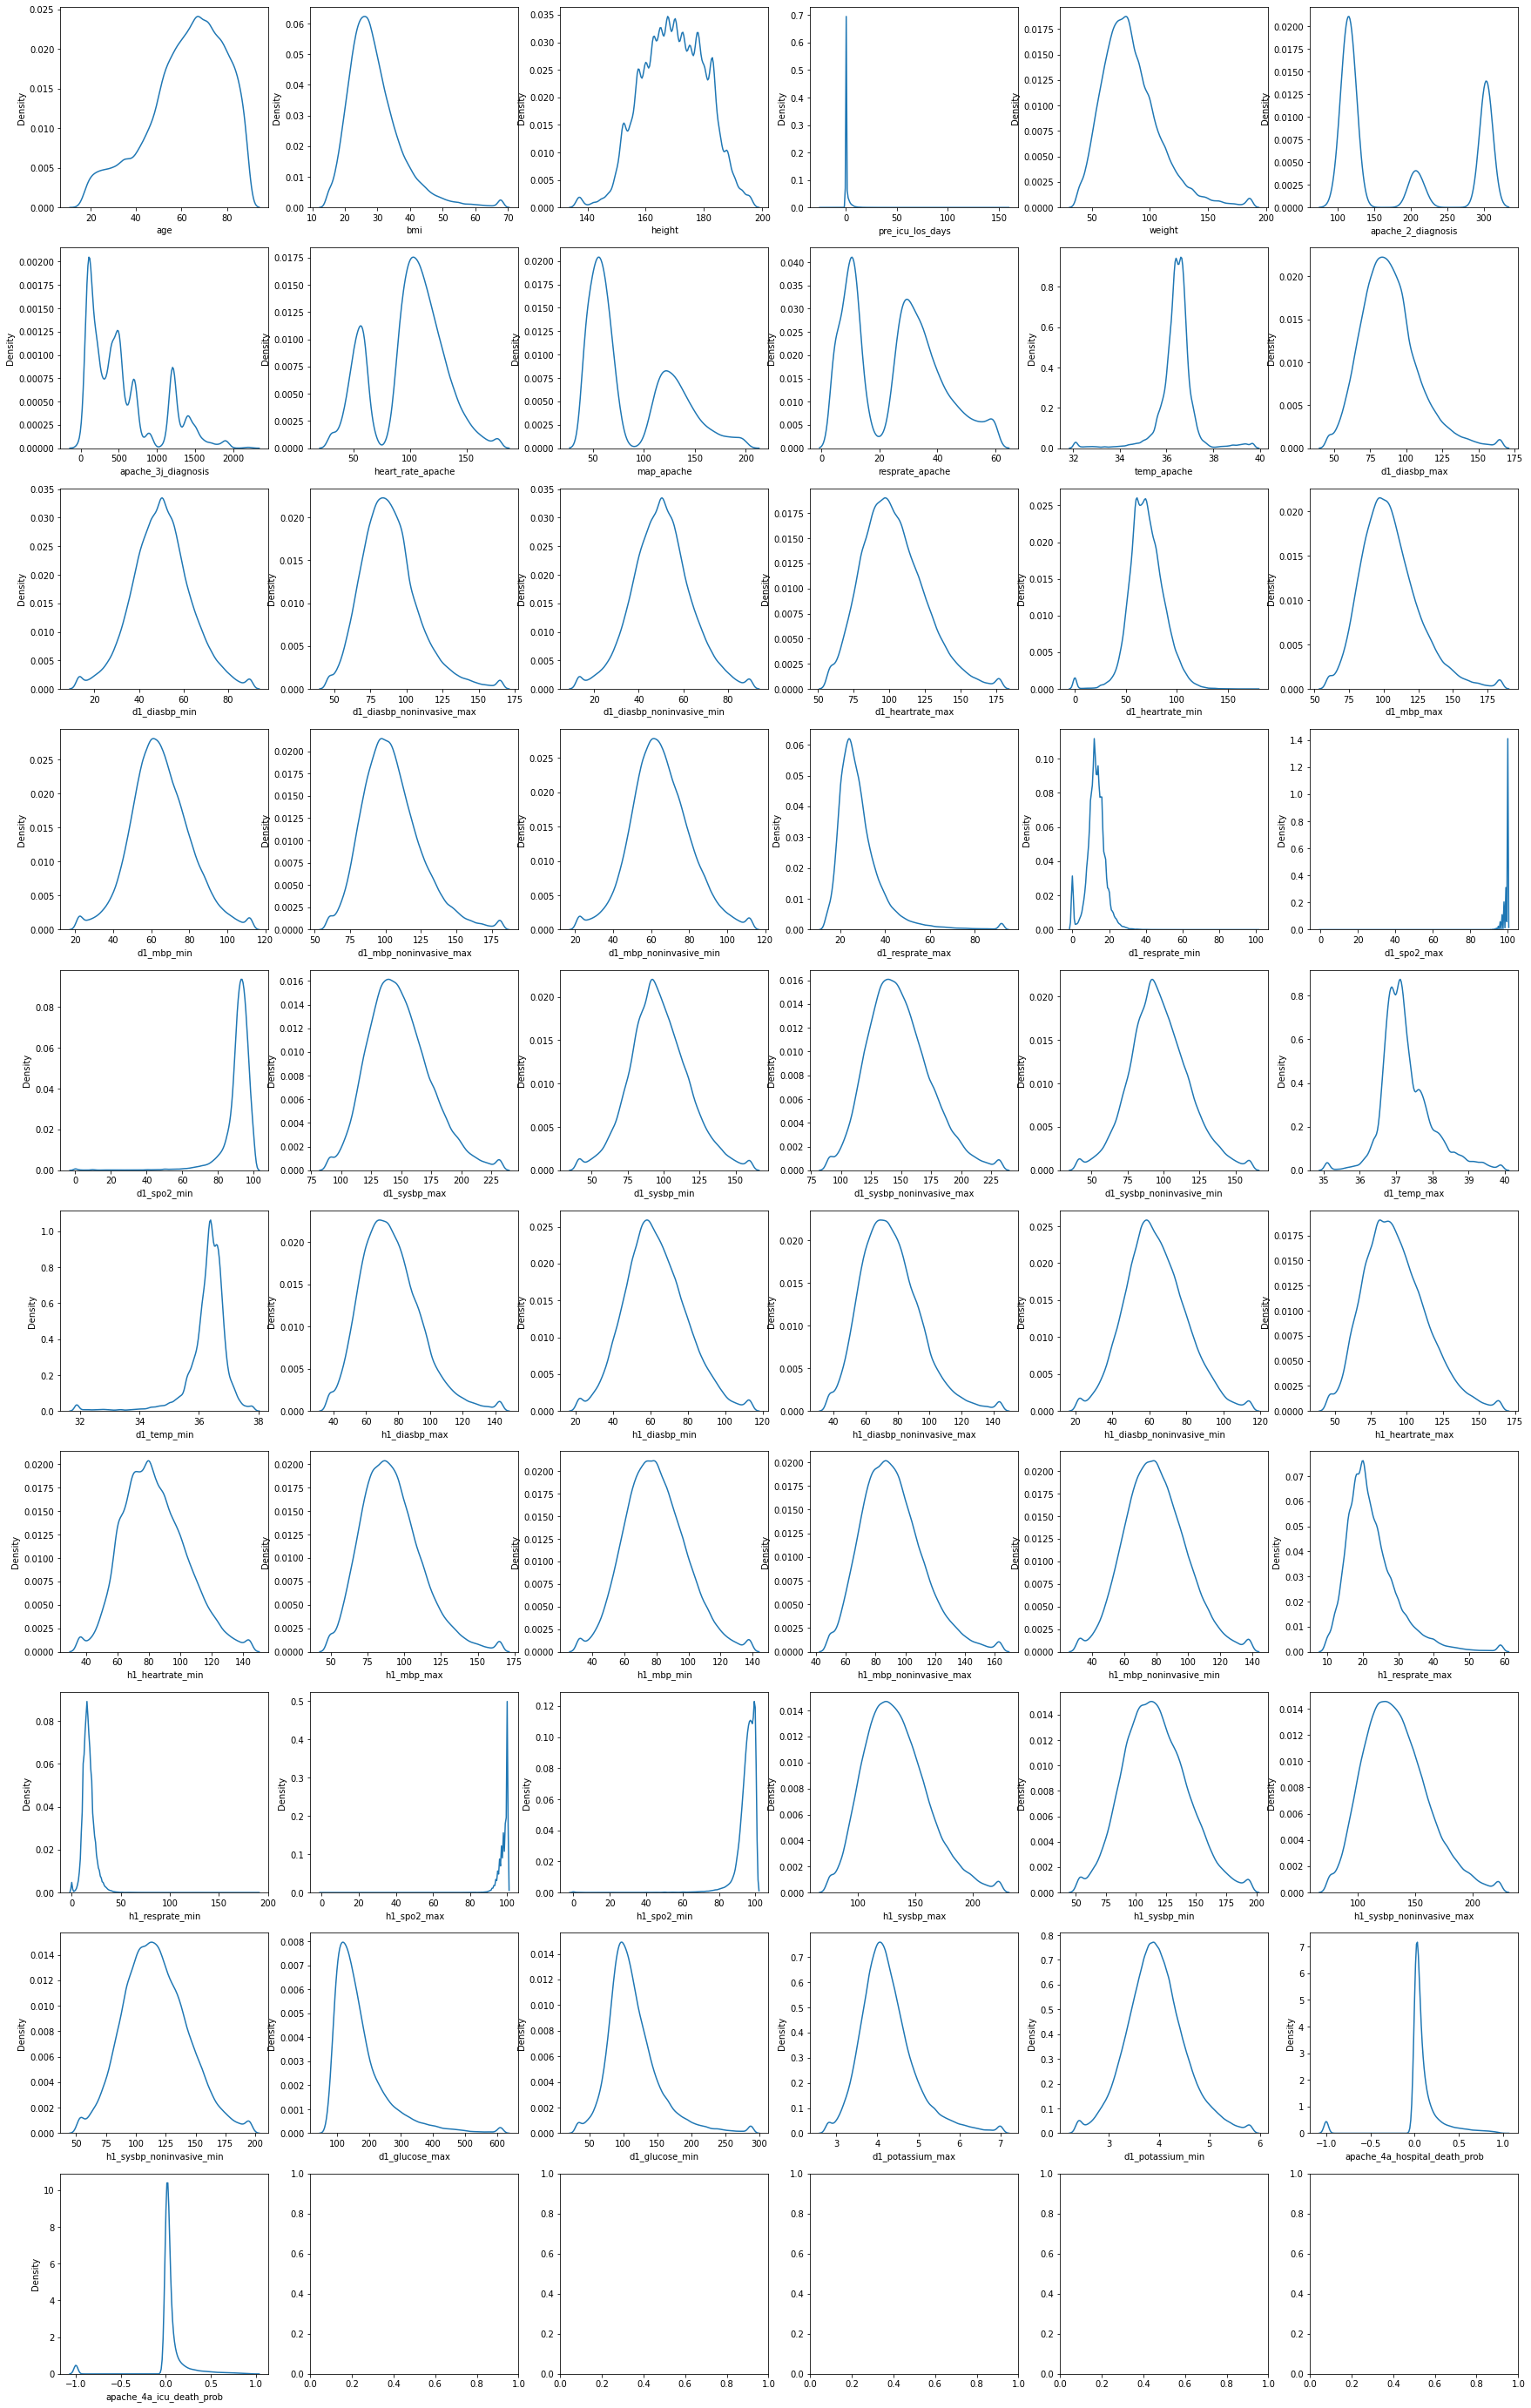

In [45]:
fig, ax = plt.subplots(nrows=10, ncols=6, figsize=(30,50))

i=0
for col in df_num.columns:   
    r = i//6
    c = i%6
    i+=1
    sns.kdeplot(data=df, x=col, ax=ax[r][c])

<AxesSubplot:xlabel='pre_icu_los_days', ylabel='Density'>

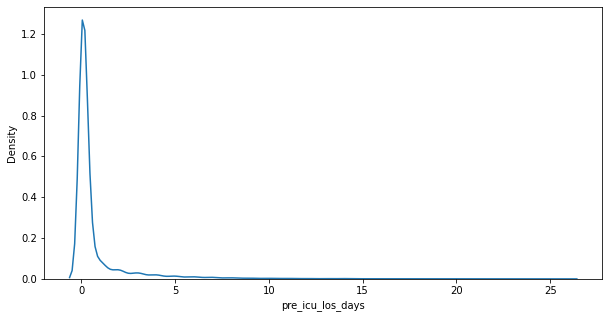

In [137]:
sns.kdeplot(df[(df['pre_icu_los_days']>=0)&(df['pre_icu_los_days']<26)]['pre_icu_los_days'])

## Bivariate Analysis <a class="anchor" id="third-bullet"></a>

<AxesSubplot:xlabel='apache_4a_hospital_death_prob', ylabel='apache_4a_icu_death_prob'>

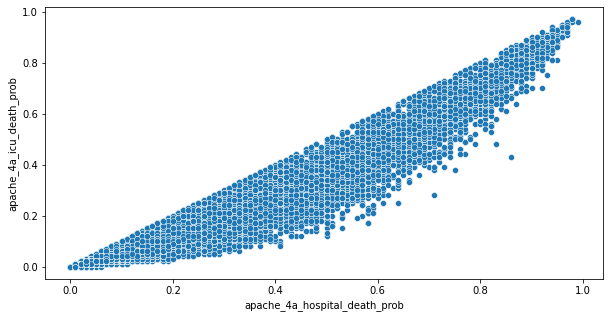

In [781]:
# df['apache_4a_hospital_death_prob']
sns.scatterplot(data=df, x='apache_4a_hospital_death_prob', y='apache_4a_icu_death_prob')

In [29]:
def show_bivariate(df, col):
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(25,6))
    ax1 = sns.kdeplot(df.loc[df['hospital_death']==1, col], color='Red', shade=True, ax= ax[0])
    ax1 = sns.kdeplot(df.loc[df['hospital_death']==0, col], color='Green', shade=True, ax= ax[0])
    ax1.legend(['Death', 'Not Death'], loc='upper right')
    ax1.set_ylabel('Density')
    ax1.set_xlabel(col)
    ax1.set_title('Distribution of variable by death')
    sns.boxplot(x=df['hospital_death'], y=df[col], ax=ax[1])

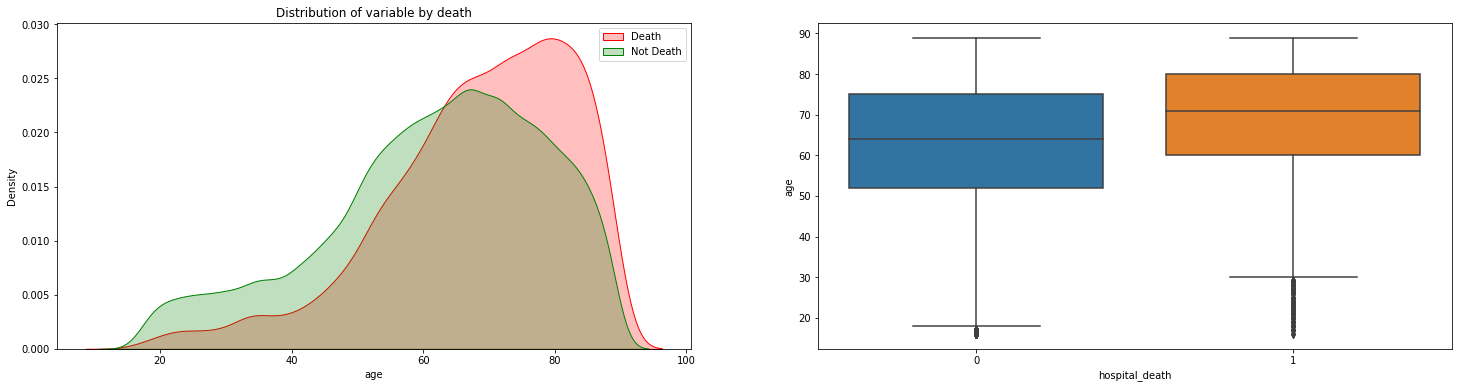

In [30]:
show_bivariate(df, 'age')

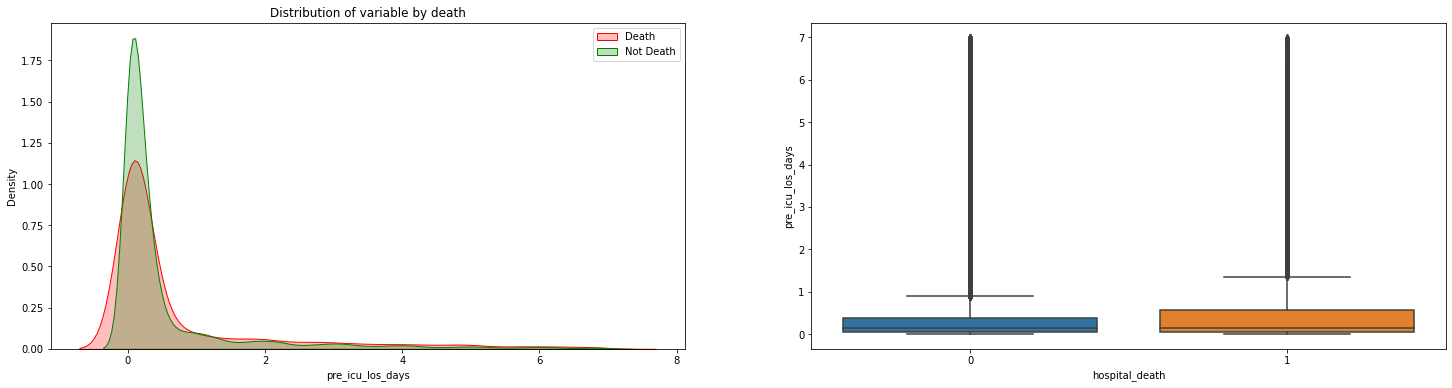

In [31]:
df_filt = df[(df['pre_icu_los_days']>0) & (df['pre_icu_los_days']<7)]
show_bivariate(df_filt, 'pre_icu_los_days')

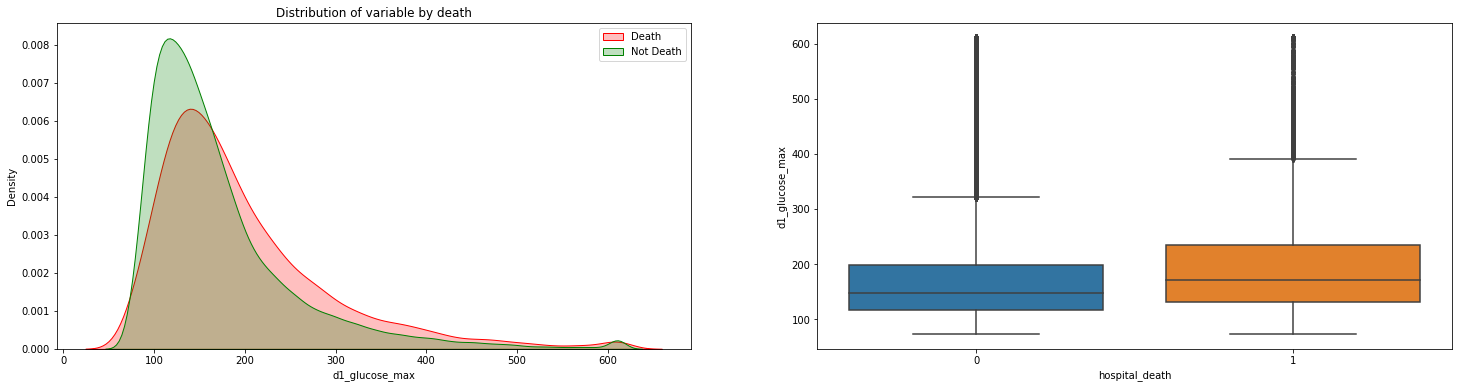

In [32]:
# df_filt = df[(df['pre_icu_los_days']>0) & (df['pre_icu_los_days']<7)]
show_bivariate(df, 'd1_glucose_max')

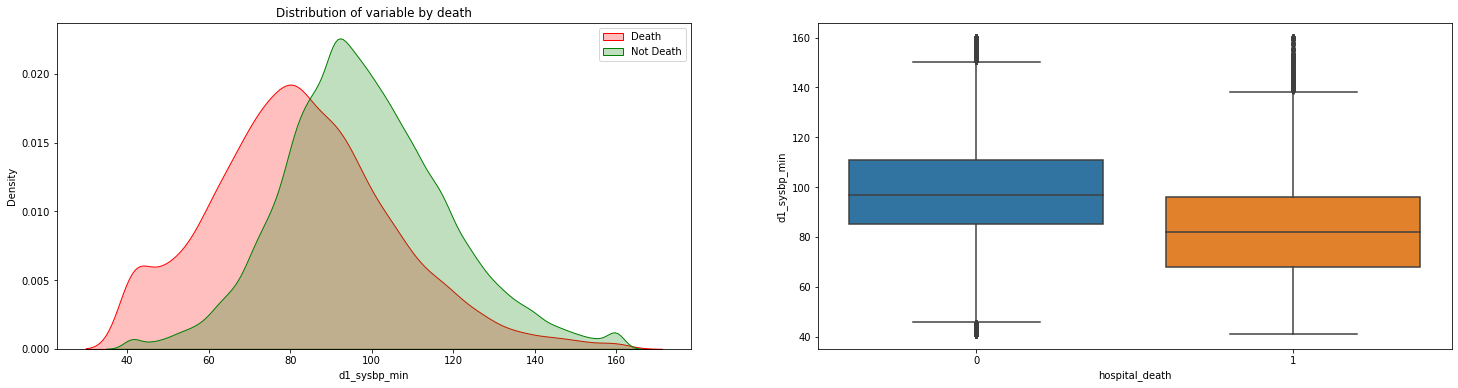

In [33]:
show_bivariate(df, 'd1_sysbp_min')

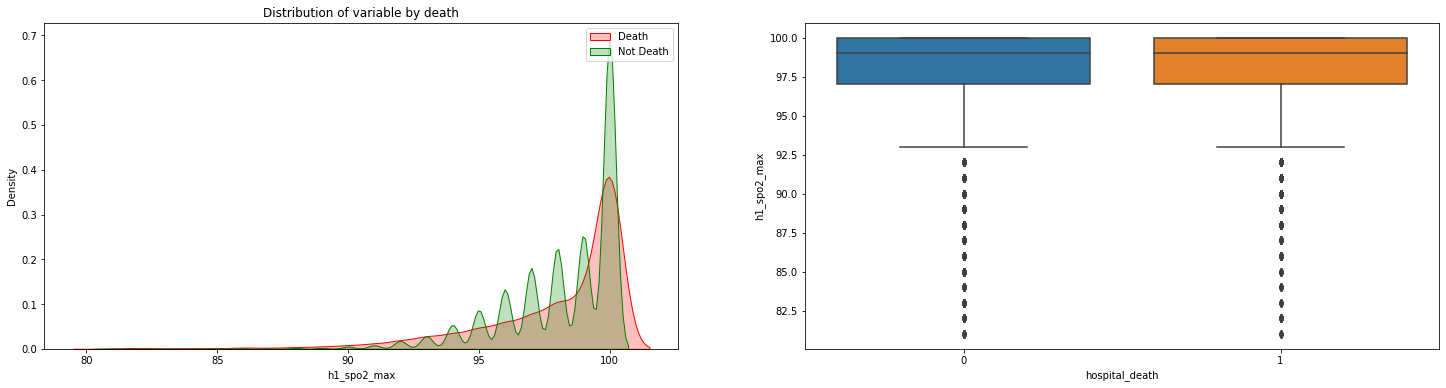

In [53]:
df_filt = df[(df['h1_spo2_max']>80) & (df['h1_spo2_max']<120)]
show_bivariate(df_filt, 'h1_spo2_max')

In [ ]:
df['h1_spo2_min

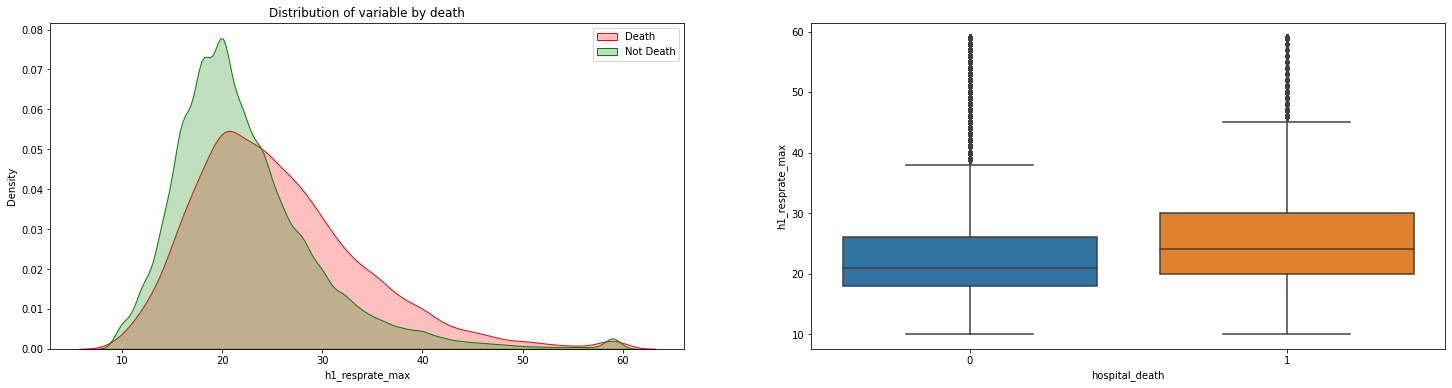

In [54]:
show_bivariate(df, 'h1_resprate_max')

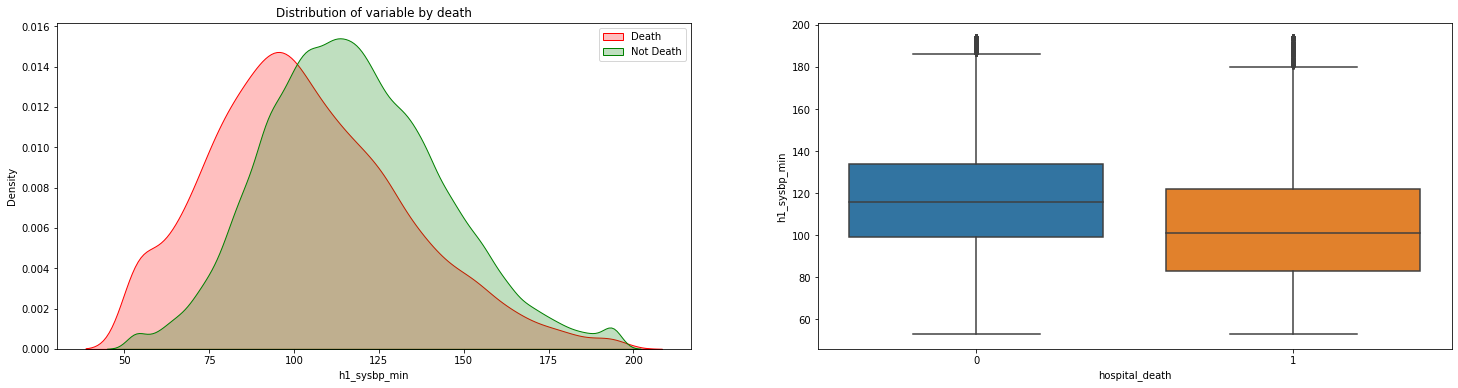

In [55]:
show_bivariate(df, 'h1_sysbp_min')

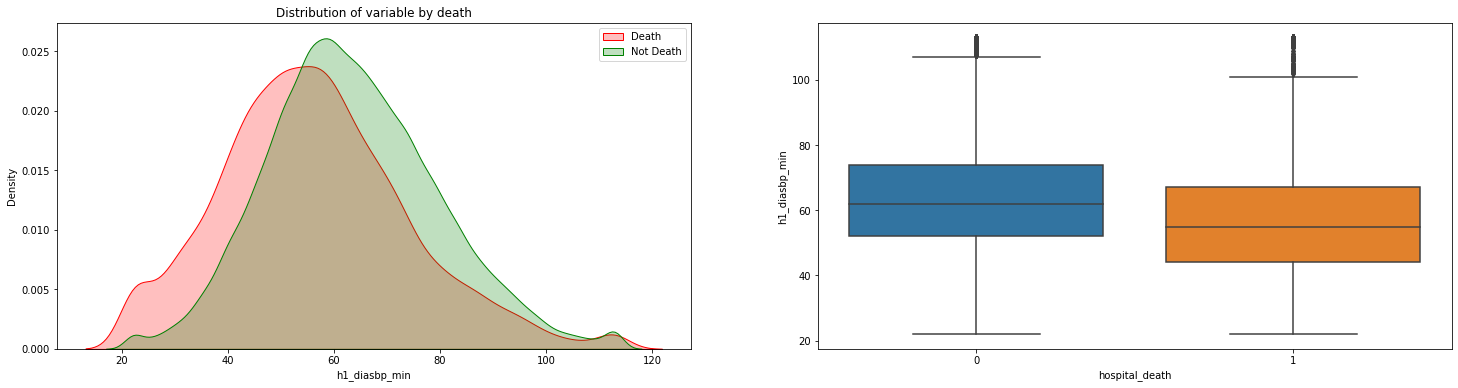

In [56]:
show_bivariate(df, 'h1_diasbp_min')

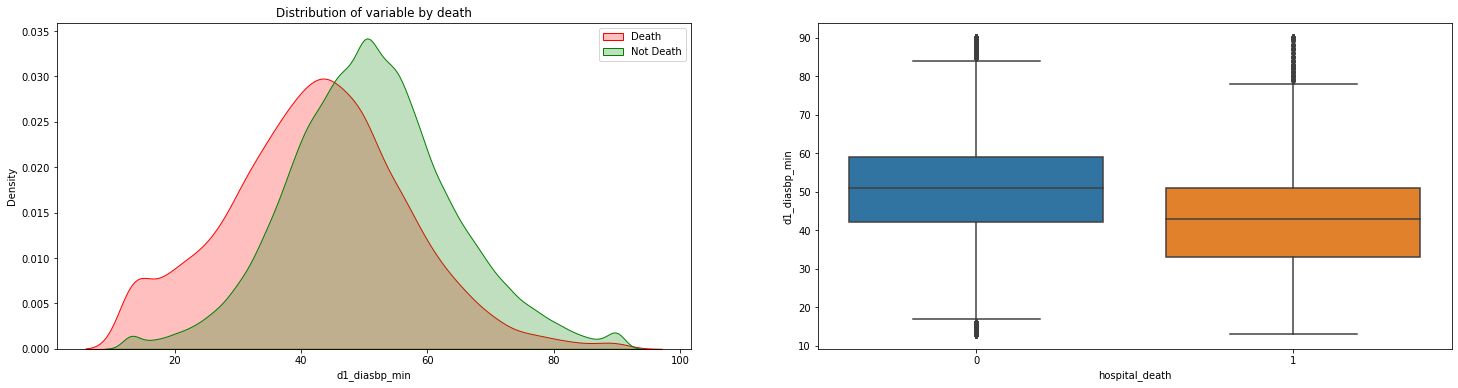

In [57]:
show_bivariate(df, 'd1_diasbp_min')

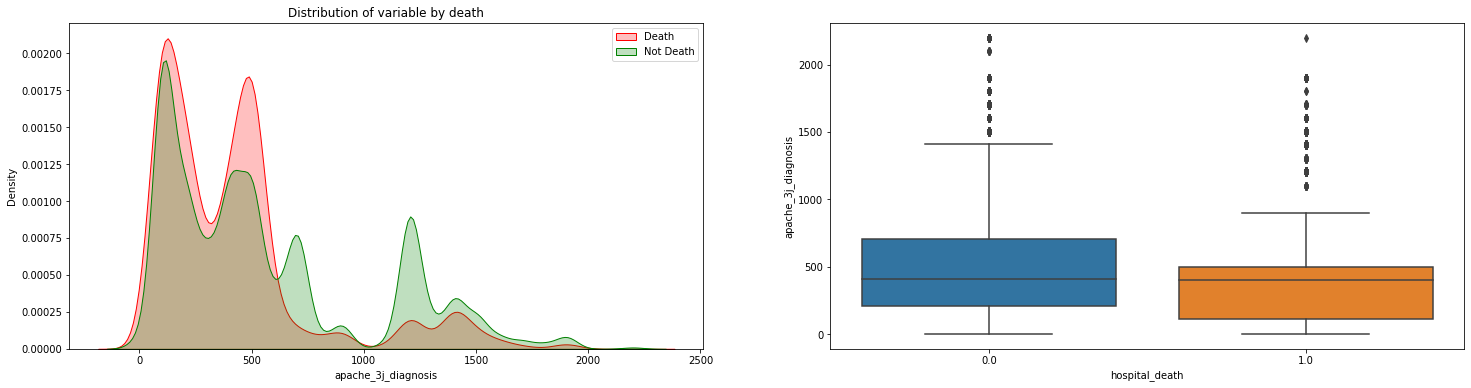

In [164]:
show_bivariate(df, 'apache_3j_diagnosis')

<AxesSubplot:xlabel='icu_type', ylabel='count'>

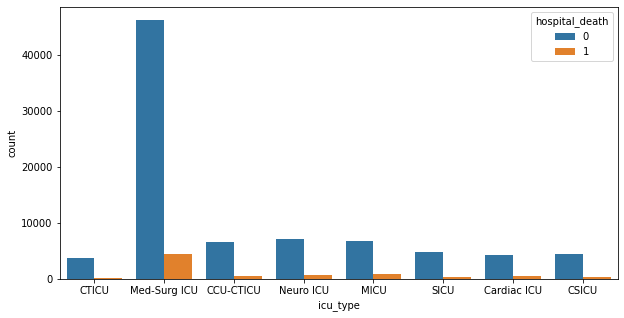

In [59]:
sns.countplot(data=df, x='icu_type', hue='hospital_death')

In [91]:
# analyze the apache death probabilities with target

In [86]:
threshold = 0.2
apache_death_prob = df['apache_4a_hospital_death_prob'].apply(lambda x: 1 if x >=threshold else 0)
apache_death_prob.value_counts(normalize=True)

0    0.845017
1    0.154983
Name: apache_4a_hospital_death_prob, dtype: float64

In [88]:
pd.crosstab(df['hospital_death'], apache_death_prob, normalize=True)*100

apache_4a_hospital_death_prob          0          1
hospital_death                                     
0                              80.977615  10.392202
1                               3.524037   5.106146

In [62]:
# We observe apache mortality prediction does not have a good performance in case of class 1 (death), when threshhold was 0.5, but performs better at 0.2

In [118]:
apache_death_prob_icu = df['apache_4a_icu_death_prob'].apply(lambda x: 1 if x >=0.2 else 0)
apache_death_prob_icu.value_counts(normalize=True)

0    0.912739
1    0.087261
Name: apache_4a_icu_death_prob, dtype: float64

In [119]:
pd.crosstab(df['hospital_death'], apache_death_prob_icu, normalize=True)*100

apache_4a_icu_death_prob          0         1
hospital_death                               
0                         86.480652  4.889165
1                          4.793214  3.836970

## Multi Variate Analysis <a class="anchor" id="fourth-bullet"></a>

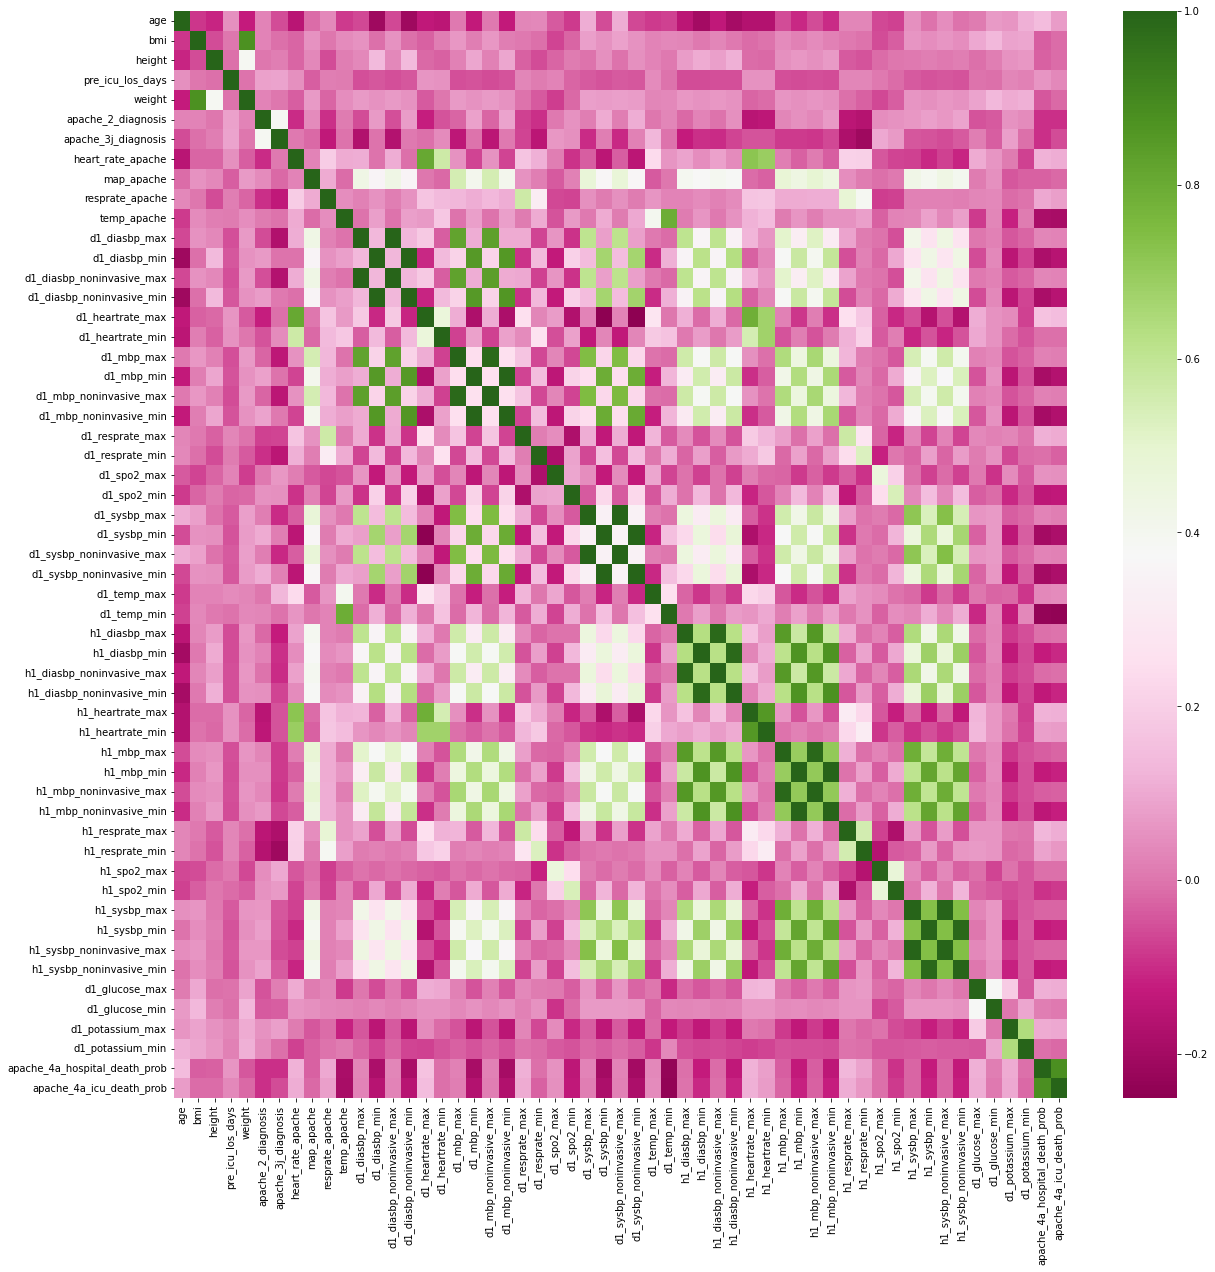

In [65]:
plt.figure(figsize=(20,20))
_=sns.heatmap(df[numerical_columns].corr(),cmap='PiYG')

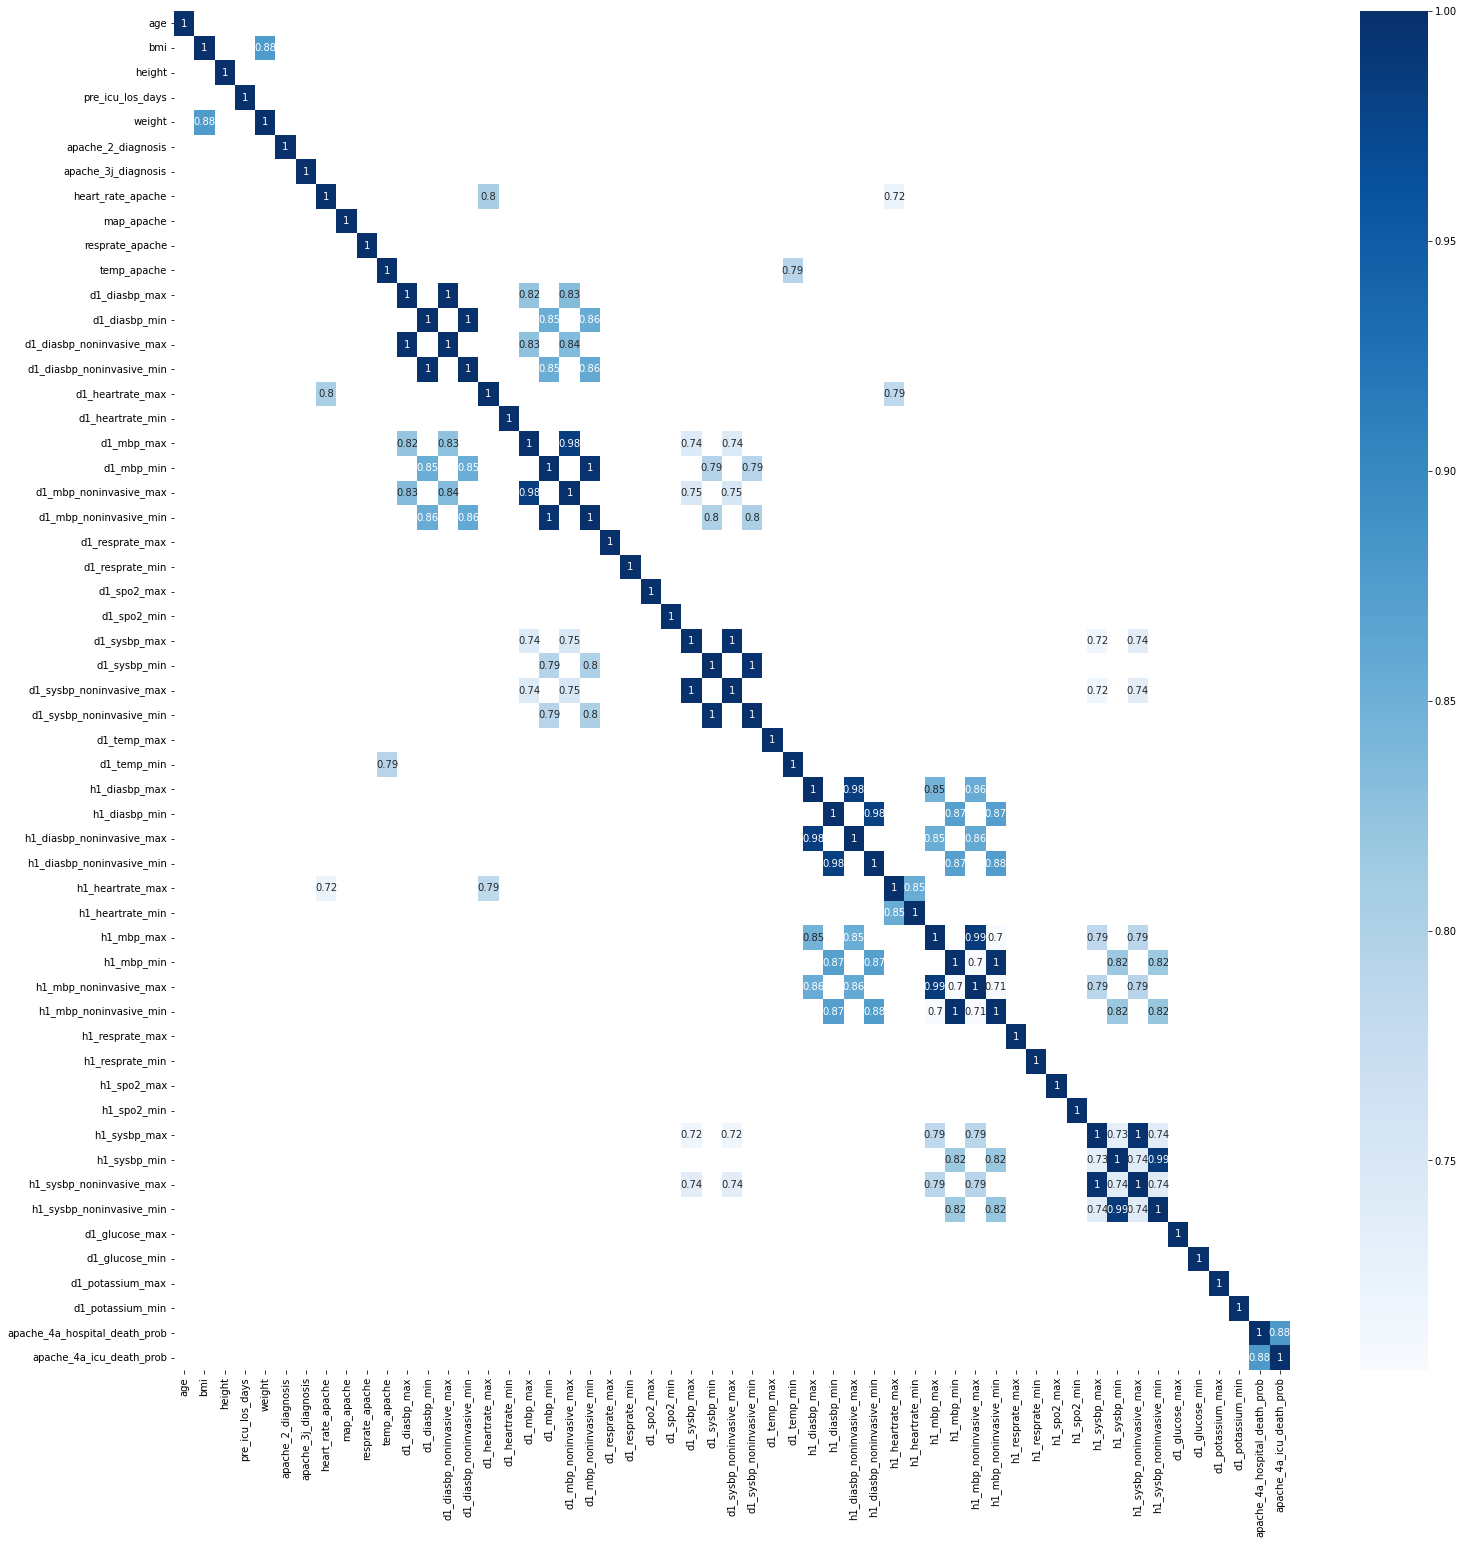

In [92]:
plt.figure(figsize=(25,25))
corr = df[numerical_columns].corr()
pearsonmap=sns.heatmap(corr[corr>=0.7],cmap='Blues',annot=True)

In [120]:
# we can see there are some variables that have correlation more than 0.98

## Outliers

In [775]:
df.describe(percentiles=[0.001, 0.005, 0.01, 0.05, 0.1, 0.25, 0.5, 0.75, 0.9, 0.95, 0.99, 0.995, 0.999])

age           bmi        height  pre_icu_los_days  \
count  87485.000000  88284.000000  90379.000000      91713.000000   
mean      62.309516     29.185818    169.641588          0.835766   
std       16.775119      8.275142     10.795378          2.487756   
min       16.000000     14.844926    137.200000        -24.947222   
0.1%      17.000000     14.844926    137.200000         -1.280011   
0.5%      19.000000     14.844926    137.200000         -0.114194   
1%        20.000000     15.937500    144.800000          0.000000   
5%        29.000000     18.855359    152.400000          0.000694   
10%       37.000000     20.541293    155.000000          0.003472   
25%       52.000000     23.641975    162.500000          0.035417   
50%       65.000000     27.654655    170.100000          0.138889   
75%       75.000000     32.930206    177.800000          0.409028   
90%       83.000000     39.424148    182.900000          2.231806   
95%       86.000000     44.516538    187.900000          4.387778   
99%       89.000000     59.419030    193.000000         10.860278   
99.5%     89.000000     67.247209    195.500000         14.362028   
99.9%     89.000000     67.814990    195.590000         26.882050   
max       89.000000     67.814990    195.590000        159.090972   

             weight  apache_2_diagnosis  apache_3j_diagnosis  \
count  88993.000000        90051.000000         90612.000000   
mean      84.028340          185.401739           558.216377   
std       25.011497           86.050882           463.266985   
min       38.600000          101.000000             0.010000   
0.1%      38.600000          101.000000             0.220000   
0.5%      38.600000          102.000000             0.250000   
1%        41.000000          102.000000           102.010000   
5%        50.300000          106.000000           104.010000   
10%       56.000000          110.000000           106.010000   
25%       66.800000          113.000000           203.010000   
50%       80.300000          122.000000           409.020000   
75%       97.100000          301.000000           703.030000   
90%      115.700000          304.000000          1302.020000   
95%      130.000000          307.000000          1501.010000   
99%      169.000000          308.000000          1902.010000   
99.5%    186.000000          308.000000          1903.019450   
99.9%    186.000000          308.000000          2201.010000   
max      186.000000          308.000000          2201.050000   

       heart_rate_apache    map_apache  resprate_apache   temp_apache  \
count       90835.000000  90719.000000     90479.000000  87605.000000   
mean           99.707932     88.015873        25.811007     36.414472   
std            30.870502     42.032412        15.106312      0.833496   
min            30.000000     40.000000         4.000000     32.100000   
0.1%           30.000000     40.000000         4.000000     32.100000   
0.5%           30.000000     40.000000         4.000000     32.100000   
1%             34.000000     40.000000         4.000000     32.800000   
5%             47.000000     42.000000         5.000000     35.300000   
10%            53.000000     46.000000         7.000000     35.700000   
25%            86.000000     54.000000        11.000000     36.200000   
50%           104.000000     67.000000        28.000000     36.500000   
75%           120.000000    125.000000        36.000000     36.700000   
90%           136.000000    148.000000        46.000000     37.000000   
95%           146.000000    164.000000        53.000000     37.300000   
99%           168.000000    193.000000        60.000000     39.300000   
99.5%         178.000000    197.000000        60.000000     39.600000   
99.9%         178.000000    200.000000        60.000000     39.700000   
max           178.000000    200.000000        60.000000     39.700000   

       d1_diasbp_max  d1_diasbp_min  d1_diasbp_noninvasive_max  \
count   91548.000000   91548.0000

<AxesSubplot:>

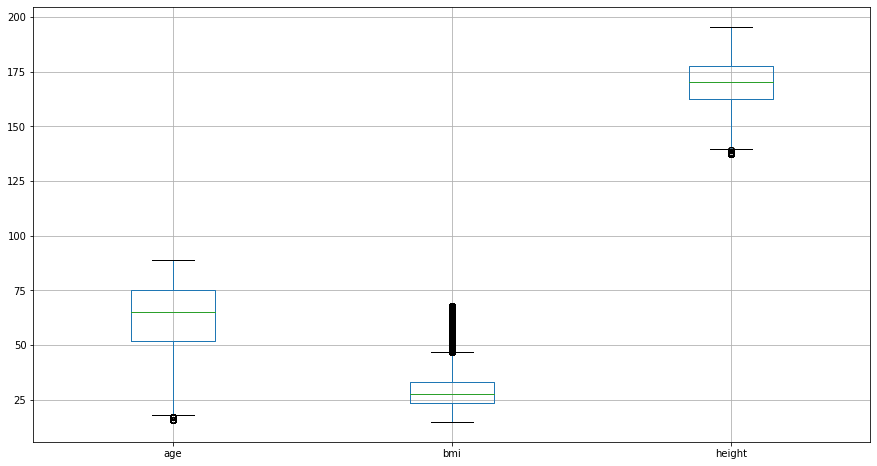

In [776]:
plt.figure(figsize=(15,8))
df_num.loc[:,['age', 'bmi', 'height']].boxplot()

<AxesSubplot:>

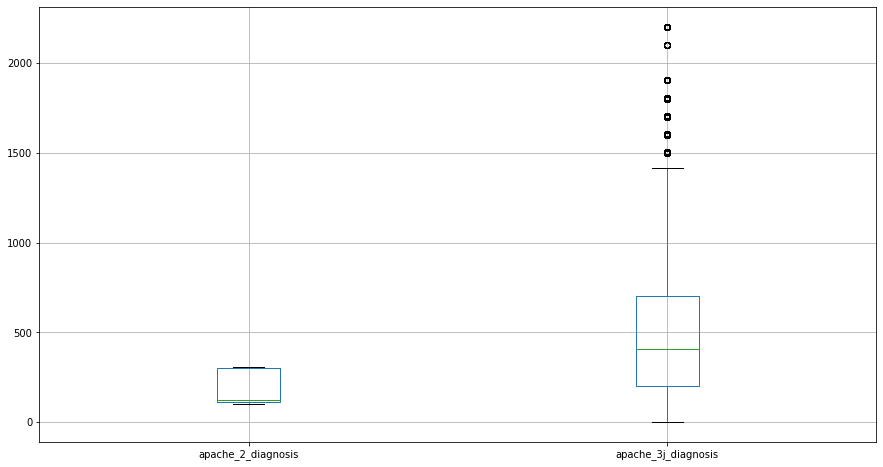

In [55]:
plt.figure(figsize=(15,8))
df_num.loc[:,['apache_2_diagnosis','apache_3j_diagnosis']].boxplot()

<AxesSubplot:>

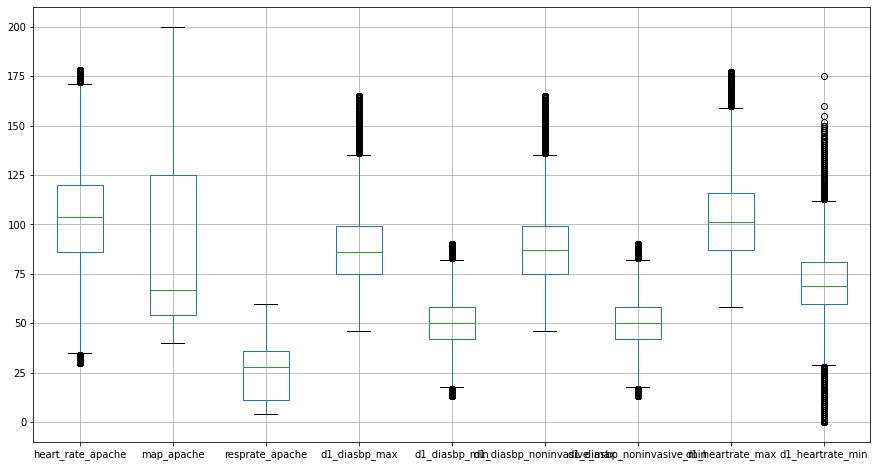

In [56]:
plt.figure(figsize=(15,8))
df_num.loc[:,['heart_rate_apache','map_apache','resprate_apache','d1_diasbp_max','d1_diasbp_min','d1_diasbp_noninvasive_max','d1_diasbp_noninvasive_min','d1_heartrate_max','d1_heartrate_min']].boxplot()

<AxesSubplot:>

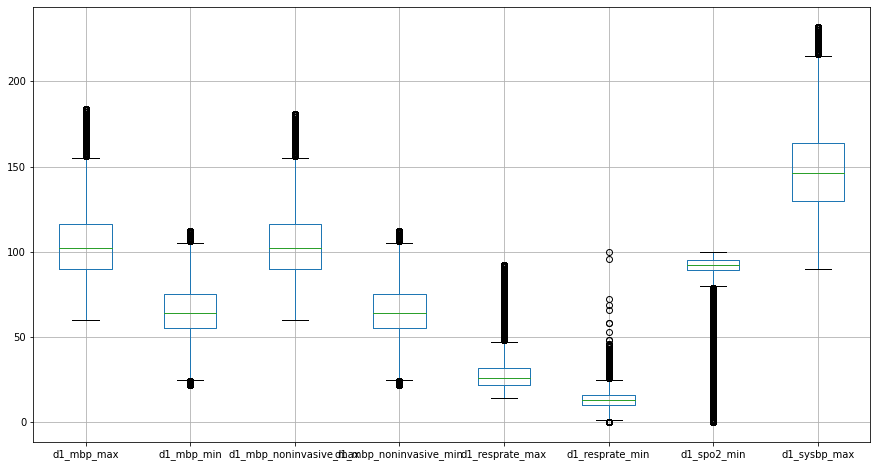

In [57]:
plt.figure(figsize=(15,8))
df_num.loc[:,['d1_mbp_max','d1_mbp_min','d1_mbp_noninvasive_max','d1_mbp_noninvasive_min','d1_resprate_max','d1_resprate_min','d1_spo2_min','d1_sysbp_max']].boxplot()

<AxesSubplot:>

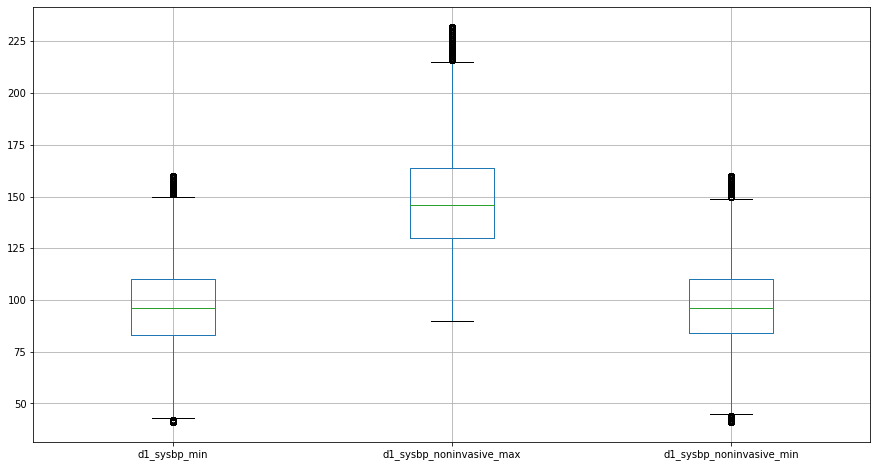

In [58]:
plt.figure(figsize=(15,8))
df_num.loc[:,['d1_sysbp_min','d1_sysbp_noninvasive_max', 'd1_sysbp_noninvasive_min']].boxplot()

<AxesSubplot:>

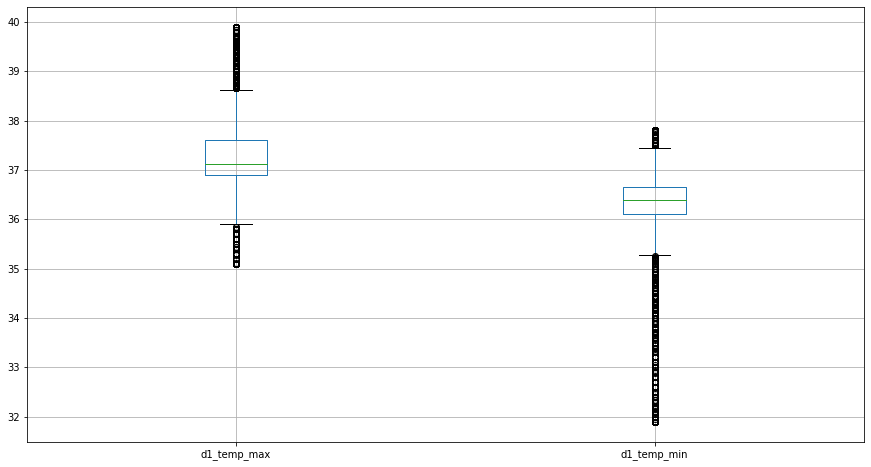

In [59]:
plt.figure(figsize=(15,8))
df_num.loc[:,['d1_temp_max','d1_temp_min']].boxplot()

<AxesSubplot:>

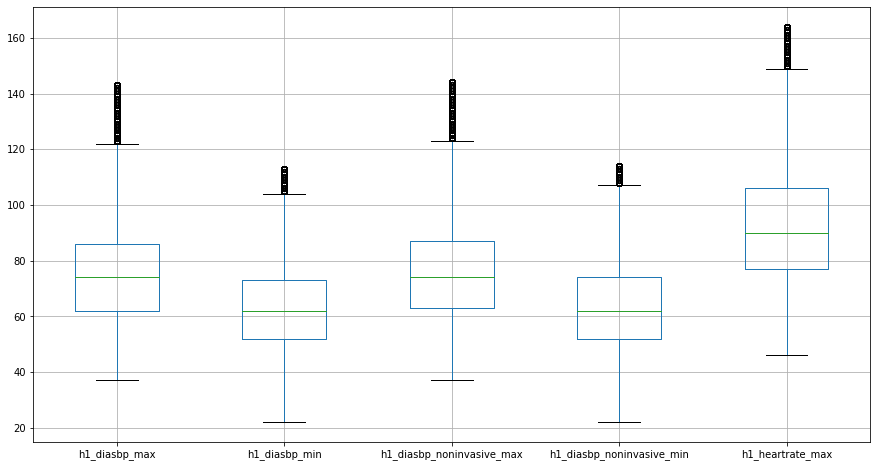

In [60]:
plt.figure(figsize=(15,8))
df_num.loc[:,['h1_diasbp_max','h1_diasbp_min','h1_diasbp_noninvasive_max',
              'h1_diasbp_noninvasive_min','h1_heartrate_max']].boxplot()

<AxesSubplot:>

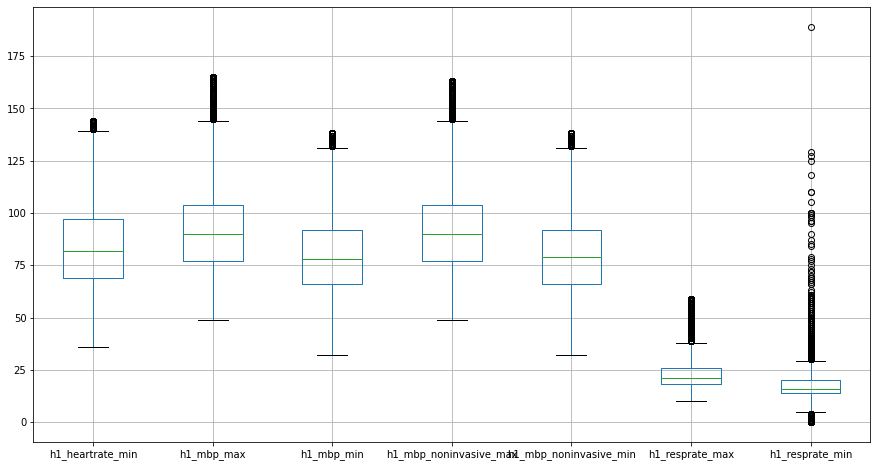

In [61]:
plt.figure(figsize=(15,8))
df_num.loc[:,['h1_heartrate_min', 'h1_mbp_max', 'h1_mbp_min',
       'h1_mbp_noninvasive_max', 'h1_mbp_noninvasive_min', 'h1_resprate_max',
       'h1_resprate_min']].boxplot()

<AxesSubplot:>

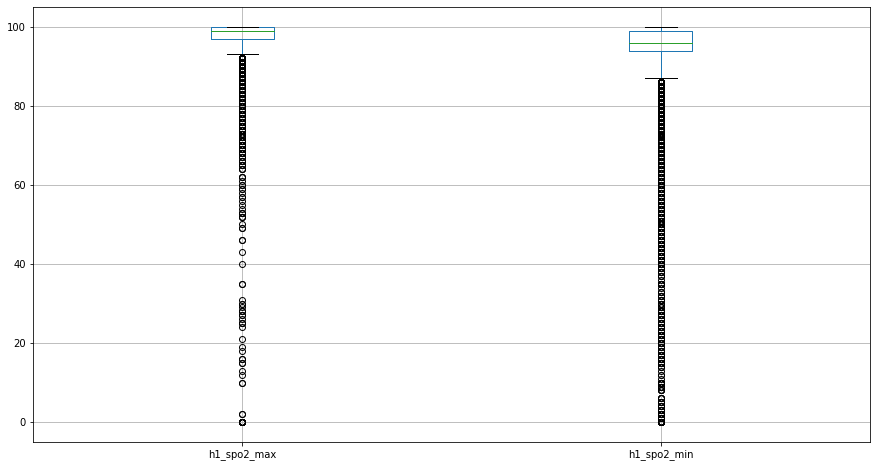

In [62]:
plt.figure(figsize=(15,8))
df_num.loc[:,['h1_spo2_max', 'h1_spo2_min']].boxplot()

<AxesSubplot:>

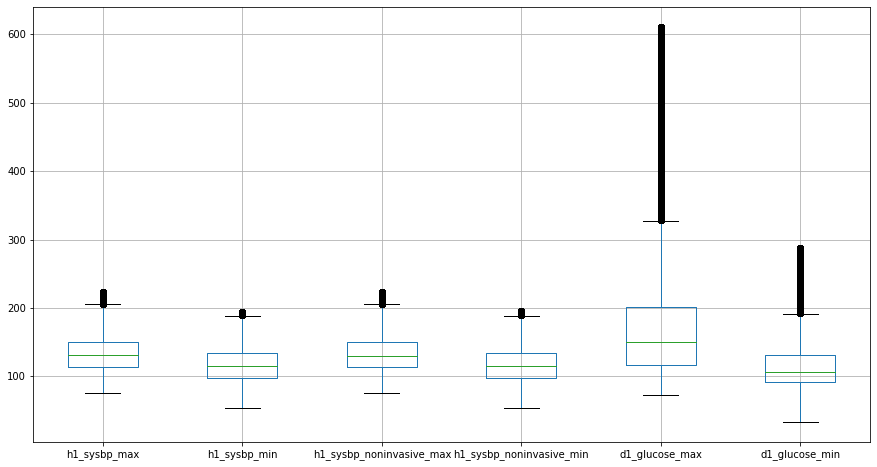

In [63]:
plt.figure(figsize=(15,8))
df_num.loc[:,['h1_sysbp_max','h1_sysbp_min', 'h1_sysbp_noninvasive_max', 'h1_sysbp_noninvasive_min',
       'd1_glucose_max', 'd1_glucose_min']].boxplot()

<AxesSubplot:>

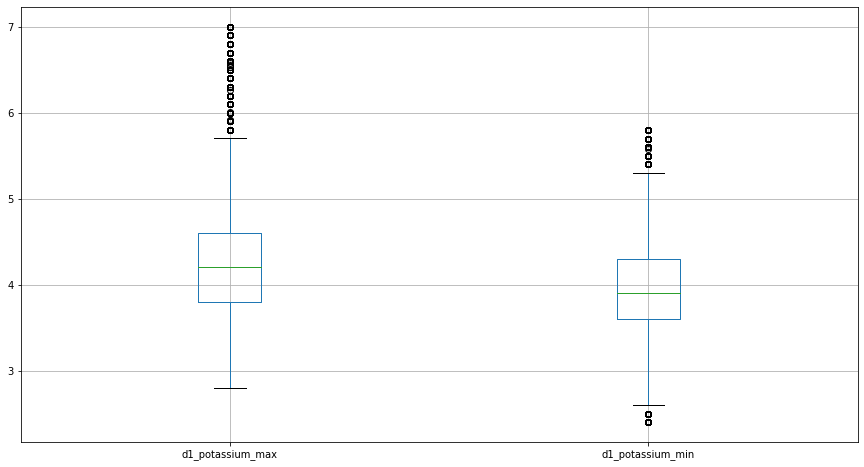

In [64]:
plt.figure(figsize=(15,8))
df_num.loc[:,['d1_potassium_max','d1_potassium_min']].boxplot()

<AxesSubplot:>

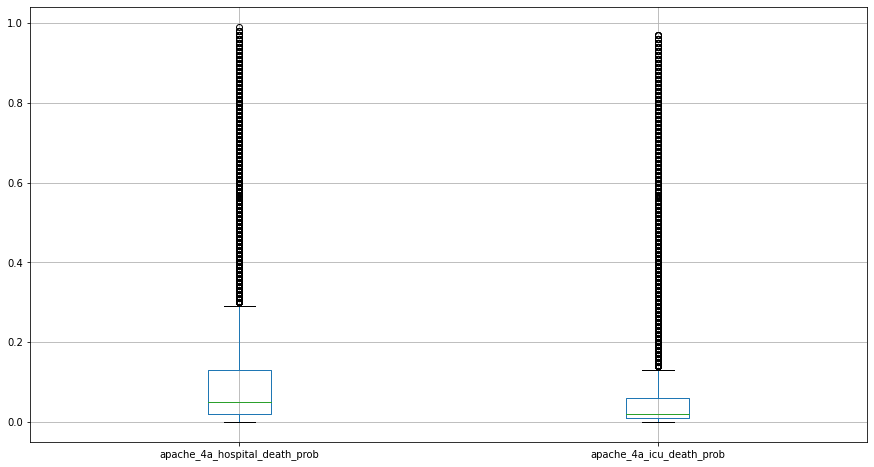

In [65]:
plt.figure(figsize=(15,8))
df_num.loc[:,['apache_4a_hospital_death_prob','apache_4a_icu_death_prob']].boxplot()

In [133]:
var = df.loc[df['apache_4a_hospital_death_prob']>0.9,'hospital_death']
var.mean(), var.size

(0.8634361233480177, 227)

In [120]:
df[numerical_columns].describe(percentiles=[0.001, 0.01, 0.05, 0.25, 0.50, 0.75, 0.90, 0.99, 0.999]).T

count        mean         std         min  \
age                            87485.0   62.309516   16.775119   16.000000   
bmi                            88284.0   29.185818    8.275142   14.844926   
height                         90379.0  169.641588   10.795378  137.200000   
pre_icu_los_days               90935.0    0.848435    2.491234    0.000000   
weight                         88993.0   84.028340   25.011497   38.600000   
apache_2_diagnosis             90051.0  185.401739   86.050882  101.000000   
apache_3j_diagnosis            90612.0  558.216377  463.266985    0.010000   
heart_rate_apache              90835.0   99.707932   30.870502   30.000000   
map_apache                     90719.0   88.015873   42.032412   40.000000   
resprate_apache                90479.0   25.811007   15.106312    4.000000   
temp_apache                    87605.0   36.414472    0.833496   32.100000   
d1_diasbp_max                  91548.0   88.491873   19.798379   46.000000   
d1_diasbp_min                  91548.0   50.161314   13.317586   13.000000   
d1_diasbp_noninvasive_max      90673.0   88.610513   19.793743   46.000000   
d1_diasbp_noninvasive_min      90673.0   50.242597   13.341521   13.000000   
d1_heartrate_max               91568.0  103.000568   22.017346   58.000000   
d1_heartrate_min               91568.0   70.321848   17.115903    0.000000   
d1_mbp_max                     91493.0  104.651339   20.808358   60.000000   
d1_mbp_min                     91493.0   64.871859   15.679680   22.000000   
d1_mbp_noninvasive_max         90234.0  104.590454   20.701171   60.000000   
d1_mbp_noninvasive_min         90234.0   64.941541   15.701305   22.000000   
d1_resprate_max                91328.0   28.882774   10.701973   14.000000   
d1_resprate_min                91328.0   12.846279    5.064943    0.000000   
d1_spo2_max                    91380.0   99.241836    1.794181    0.000000   
d1_spo2_min                    91380.0   90.454826   10.030069    0.000000   
d1_sysbp_max                   91554.0  148.339745   25.733259   90.000000   
d1_sysbp_min                   91554.0   96.923870   20.677930   41.000000   
d1_sysbp_noninvasive_max       90686.0  148.235549   25.792453   90.000000   
d1_sysbp_noninvasive_min       90686.0   96.993313   20.705016   41.030000   
d1_temp_max                    89389.0   37.284201    0.693287   35.100000   
d1_temp_min                    89389.0   36.268391    0.745147   31.889000   
h1_diasbp_max                  88094.0   75.354508   18.409190   37.000000   
h1_diasbp_min                  88094.0   62.838150   16.363229   22.000000   
h1_diasbp_noninvasive_max      84363.0   75.805934   18.481826   37.000000   
h1_diasbp_noninvasive_min      84363.0   63.270616   16.422063   22.000000   
h1_heartrate_max               88923.0   92.229198   21.823704   46.000000   
h1_heartrate_min               88923.0   83.663720   20.279869   36.000000   
h1_mbp_max                     87074.0   91.612950   20.533174   49.000000   
h1_mbp_min                     87074.0   79.400028   19.130590   32.000000   
h1_mbp_noninvasive_max         82629.0   91.594126   20.552018   49.000000   
h1_mbp_noninvasive_min         82629.0   79.709315   19.236507   32.000000   
h1_resprate_max                87356.0   22.633614    7.515043   10.000000   
h1_resprate_min                87356.0   17.211525    6.072588    0.000000   
h1_spo2_max                    87528.0   98.044637    3.212934    0.000000   
h1_spo2_min                    87528.0   95.174310    6.625227    0.000000   
h1_sysbp_max                   88102.0  133.247395   27.556986   75.000000   
h1_sysbp_min                   88102.0  116.362296   26.510637   53.000000   
h1_sysbp_noninvasive_max       84372.0  133.054686   27.679751   75.000000   
h1_sysbp_noninvasive_min       84372.0  116.549625   26.623528   53.000000   
d1_glucose_max                 85906.0  174.638023   86.687955   73.000000   
d1_glucose_min                 85906.0  114.380940   38

In [134]:
# right skew: pre_icu_los_days, d1_resprate_min, h1_resprate_min
# left skew: d1_heartrate_min, d1_resprate_min, d1_spo2_max, d1_spo2_min, h1_spo2_max, h1_spo2_min

## Data Preprocessing <a class="anchor" id="fifth-bullet"></a>

In [953]:
from sklearn.preprocessing import Normalizer, MinMaxScaler
from sklearn.feature_selection import VarianceThreshold

In [954]:
df_normalized = pd.DataFrame(MinMaxScaler().fit_transform(df[numerical_columns]), columns=numerical_columns)

In [955]:
df_normalized.std().sort_values()[:10]

pre_icu_los_days            0.013518
d1_spo2_max                 0.017942
h1_spo2_max                 0.032129
h1_resprate_min             0.032130
d1_resprate_min             0.050649
h1_spo2_min                 0.066252
d1_heartrate_min            0.097805
d1_spo2_min                 0.100301
temp_apache                 0.109671
apache_4a_icu_death_prob    0.110326
dtype: float64

In [956]:
# pre_icu_los_days, spo2_max, resperate_min, spo2_min have very low variance, possibly due to outliers

In [957]:
df.loc[np.abs(df['pre_icu_los_days'])>26, 'hospital_death'].value_counts(normalize=True)

0    0.757009
1    0.242991
Name: hospital_death, dtype: float64

In [958]:
# high value of pre_icu_los_days, leads to more deaths > 20% (compared to 8% overall )

In [959]:
df_original = df.copy()

In [960]:
df[df['pre_icu_los_days']<0]['hospital_death'].mean()
# df[df['pre_icu_los_days']>=0]['hospital_death'].mean()

0.032133676092544985

In [961]:
(df['pre_icu_los_days']<0).sum()

778

In [962]:
(df['apache_4a_hospital_death_prob']<0).sum()

2371

In [963]:
(df['apache_4a_icu_death_prob']<0).sum()

2230

In [964]:
# As probabilities acnnot be negative, we can remove the -ve value data points

In [965]:
# mark Invalid values as null
# df['pre_icu_los_days'] = np.abs(df['pre_icu_los_days'])     # maybe they marked as -ve because 
df.loc[df['pre_icu_los_days']<0, 'pre_icu_los_days'] = np.nan
df.loc[df['apache_4a_hospital_death_prob']<0, 'apache_4a_hospital_death_prob'] = np.nan
df.loc[df['apache_4a_icu_death_prob']<0, 'apache_4a_icu_death_prob'] = np.nan

In [966]:
# see which variables have -ve values
(df[numerical_columns]<0).sum().sum()

0

In [967]:
# see which variables have 0 values
(df[numerical_columns]==0).sum()[(df[numerical_columns]==0).sum()>0]

pre_icu_los_days                 3711
d1_heartrate_min                  598
d1_resprate_min                  3673
d1_spo2_max                         6
d1_spo2_min                       152
h1_resprate_min                   634
h1_spo2_max                        12
h1_spo2_min                        62
apache_4a_hospital_death_prob    2488
apache_4a_icu_death_prob         9694
dtype: int64

In [968]:
# effect of extreme values on target
var = df.loc[(df['h1_spo2_max']<50),'hospital_death']
var.size, var.mean()

(47, 0.14893617021276595)

In [969]:
def treat_outliers_remove(df):
    cond1 = df['pre_icu_los_days']>29  # 90 records
    cond2 = df['d1_resprate_min']>35  # 82 records
    cond3 = df['h1_resprate_min']>50  # 86 records
    cond4 = df['d1_spo2_max']<87  # 90 records
    cond5 = df['h1_spo2_max']<60  # 62 records
    df = df[~(cond1 | cond2 | cond3 | cond4 | cond5)]  # 370 records
    df = df.reset_index(drop=True)
    return df

In [970]:
def treat_outliers_capping(df, categorical_columns):
    
    # count = 90, target_mean = 0.23
    df.loc[df['pre_icu_los_days']>29 ,'high_pre_icu_los_days'] = 1
    df.loc[df['pre_icu_los_days']>29 ,'pre_icu_los_days'] = 29
    categorical_columns.append('high_pre_icu_los_days')
    
    # count = 82, target_mean = 0.23
    df.loc[df['d1_resprate_min']>35 ,'high_d1_resprate_min'] = 1
    df.loc[df['d1_resprate_min']>35 ,'d1_resprate_min'] = 35
    categorical_columns.append('high_d1_resprate_min')
    
    # count = 86, target_mean = 0.13
    df.loc[df['h1_resprate_min']>50 ,'high_h1_resprate_min'] = 1
    df.loc[df['h1_resprate_min']>50 ,'h1_resprate_min'] = 50
    categorical_columns.append('high_h1_resprate_min')
    
    # count = 90, target_mean = 0.62
    df.loc[df['d1_spo2_max']<87 ,'low_d1_spo2_max'] = 1
    df.loc[df['d1_spo2_max']<87 ,'d1_spo2_max'] = 87
    categorical_columns.append('low_d1_spo2_max')
    
    # # count = 893, target_mean = 0.39
    # df.loc[df['d1_spo2_min']<43 ,'low_d1_spo2_min'] = 1
    # df.loc[df['d1_spo2_min']<43 ,'d1_spo2_min'] = 43
    # categorical_columns.append('low_d1_spo2_min')
    
    # count = 62, target_mean = 0.27
    df.loc[df['h1_spo2_max']<60 ,'low_h1_spo2_max'] = 1
    df.loc[df['h1_spo2_max']<60 ,'h1_spo2_max'] = 60
    categorical_columns.append('low_h1_spo2_max')
    
    # # count = 447, target_mean = 0.27
    # df.loc[df['h1_spo2_min']<60 ,'low_h1_spo2_min'] = 1
    # df.loc[df['h1_spo2_min']<60 ,'h1_spo2_min'] = 60
    # categorical_columns.append('low_h1_spo2_min')
    
#     # count = 907, target_mean = 0.55
#     df.loc[df['d1_heartrate_min']<26 ,'low_d1_heartrate_min'] = 1
#     df.loc[df['d1_heartrate_min']<26 ,'d1_heartrate_min'] = 26
#     categorical_columns.append('low_d1_heartrate_min')
    
#     # count = 3673, target_mean = 0.20
#     df.loc[df['d1_resprate_min']<1 ,'low_d1_resprate_min'] = 1
#     df.loc[df['d1_resprate_min']<1 ,'d1_resprate_min'] = 1
#     categorical_columns.append('low_d1_resprate_min')
    
    return df

In [971]:
print('before:', df.shape)
df = treat_outliers_remove(df)
print('after:', df.shape)

before: (91713, 80)
after: (91343, 80)


In [972]:
# we see using z score method to remove outliers is not viable as it leads to too much data loss

In [973]:
# We can categorize some variables to mitigate the effect of outliers and skewness

In [974]:
def perform_binning(df):
    df['pre_icu_los_days'] = pd.cut(df['pre_icu_los_days'], bins=[0,1, 7, df['pre_icu_los_days'].max()], labels=[0, 1, 2], include_lowest=True).astype(object)
    df['d1_spo2_max'] = pd.cut(df['d1_spo2_max'], bins=[0,94,df['d1_spo2_max'].max()], labels=[0,1], include_lowest=True).astype(object)
    df['d1_spo2_min'] = pd.cut(df['d1_spo2_min'], bins=[0,70, 85, df['d1_spo2_min'].max()], labels=[0, 1, 2], include_lowest=True).astype(object)
    df['h1_spo2_max'] = pd.cut(df['h1_spo2_max'], bins=[0,94,df['h1_spo2_max'].max()], labels=[0, 1], include_lowest=True).astype(object)
    df['h1_spo2_min'] = pd.cut(df['h1_spo2_min'], bins=[0,70, 85, df['h1_spo2_min'].max()], labels=[0, 1, 2], include_lowest=True).astype(object)
    return df

In [975]:
# df = perform_binning(df)

In [976]:
numerical_columns = df.select_dtypes('number').columns

In [977]:
categorical_columns = df.select_dtypes(exclude='number').columns

In [978]:
len(numerical_columns), len(categorical_columns)

(55, 25)

## Missing Values <a class="anchor" id="sixth-bullet"></a>

### Check Missing Values

In [1033]:
df_before_missing = df.copy()

In [1034]:
import missingno as msno

<AxesSubplot:>

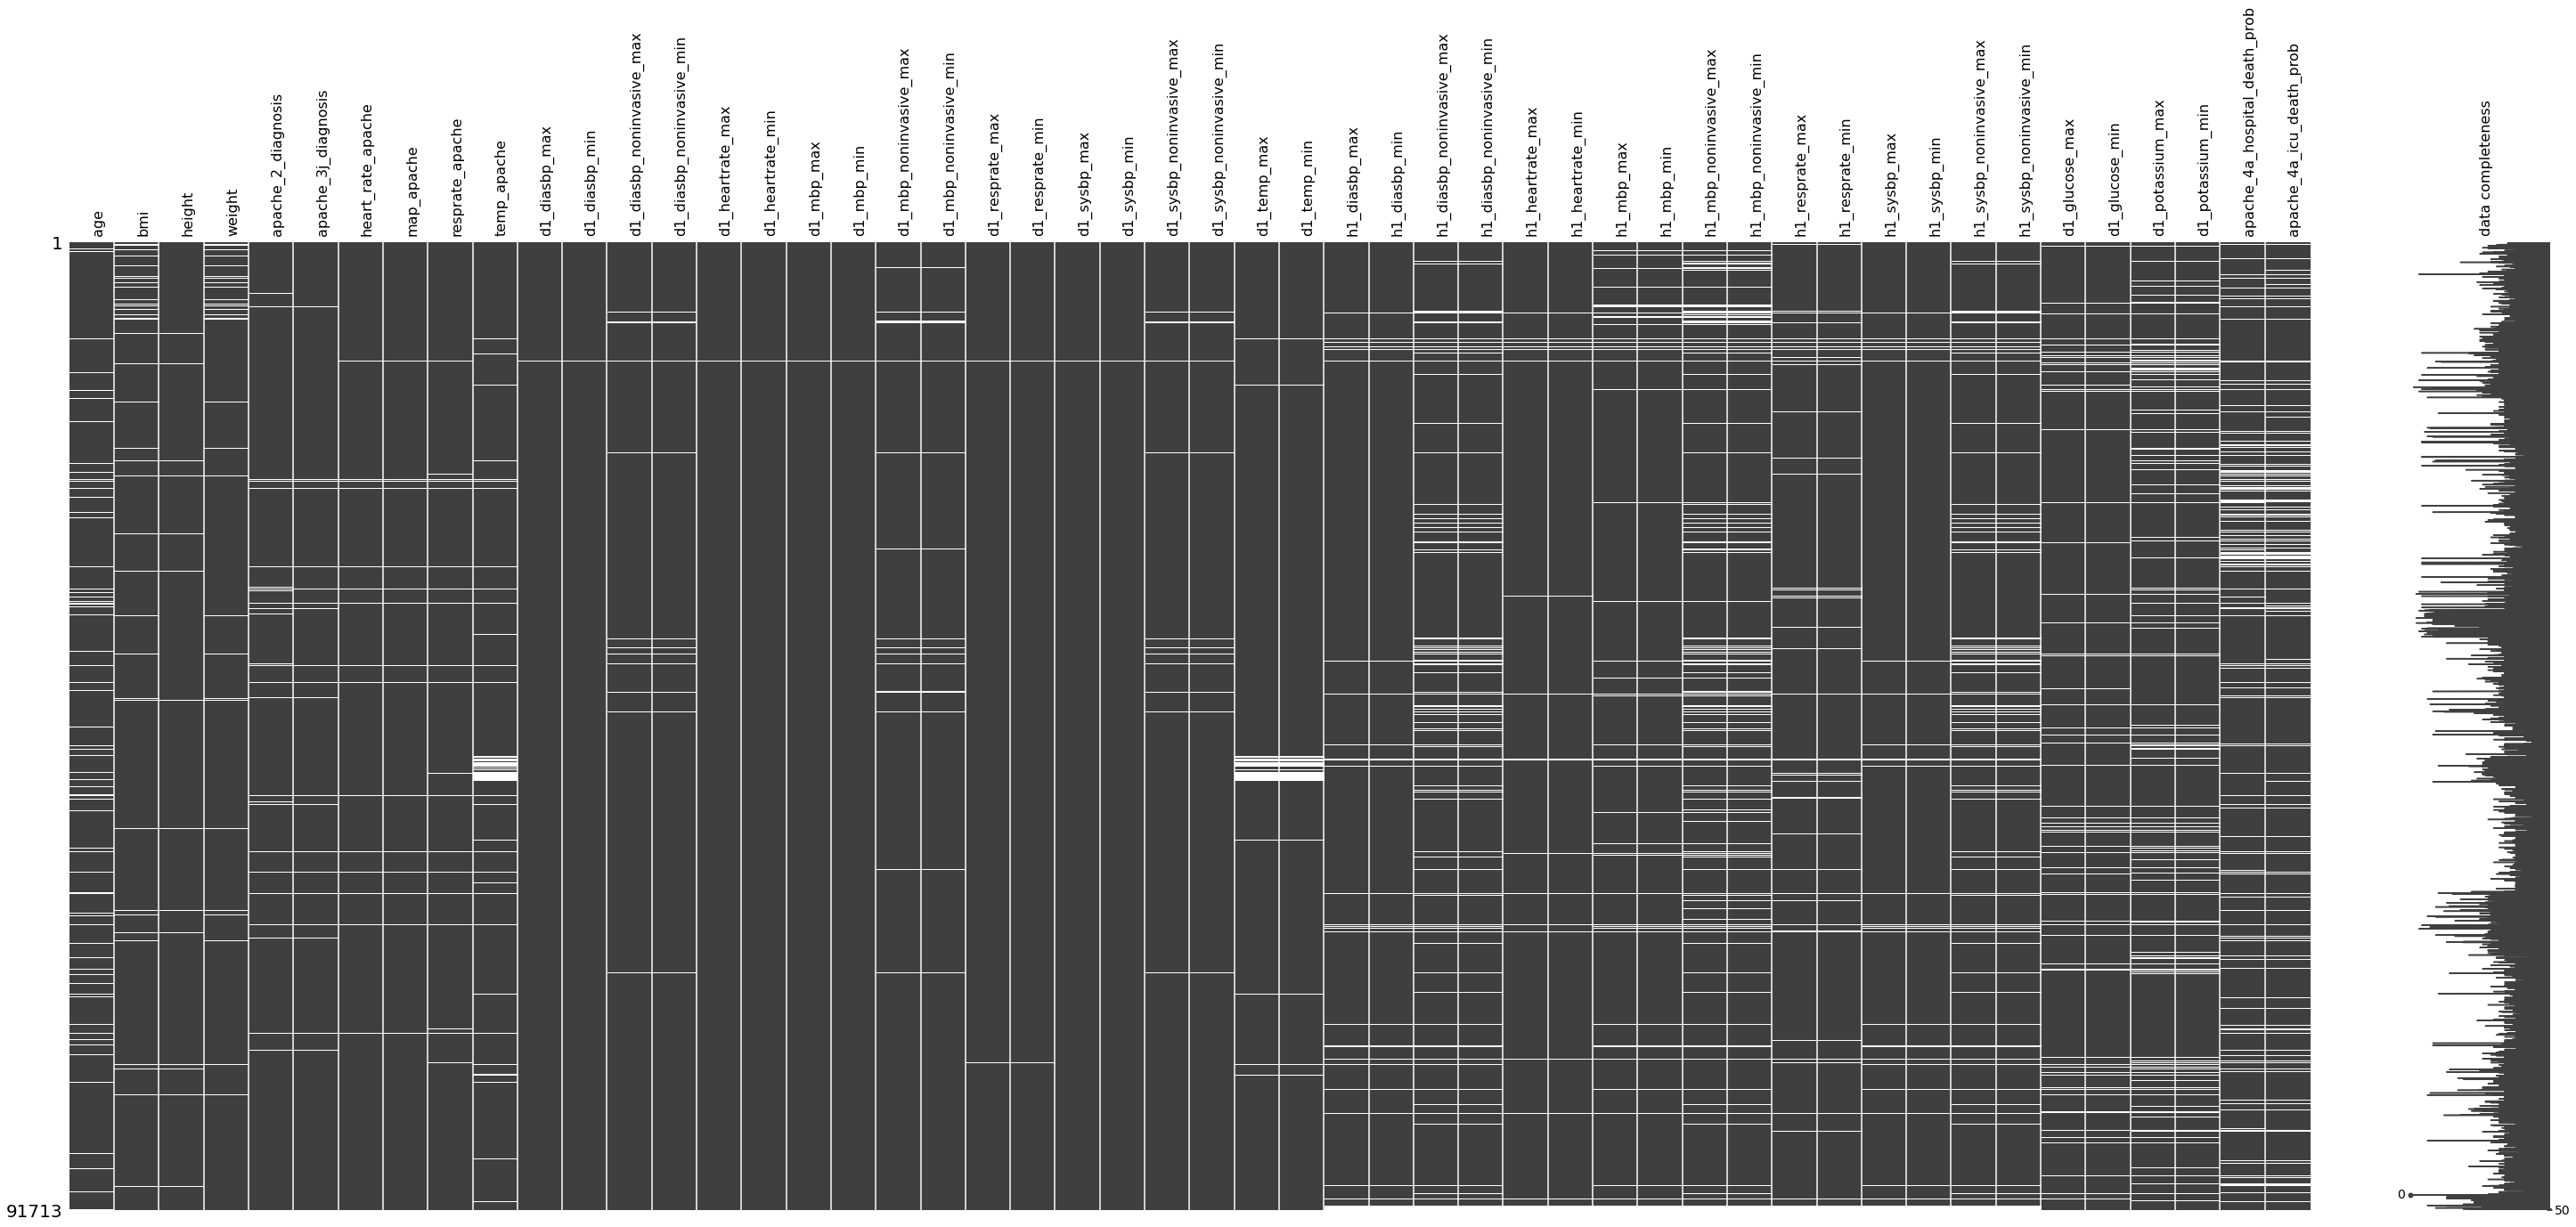

In [1035]:
msno.matrix(df[numerical_columns], figsize=(50,20), labels=True, label_rotation=90)

<AxesSubplot:>

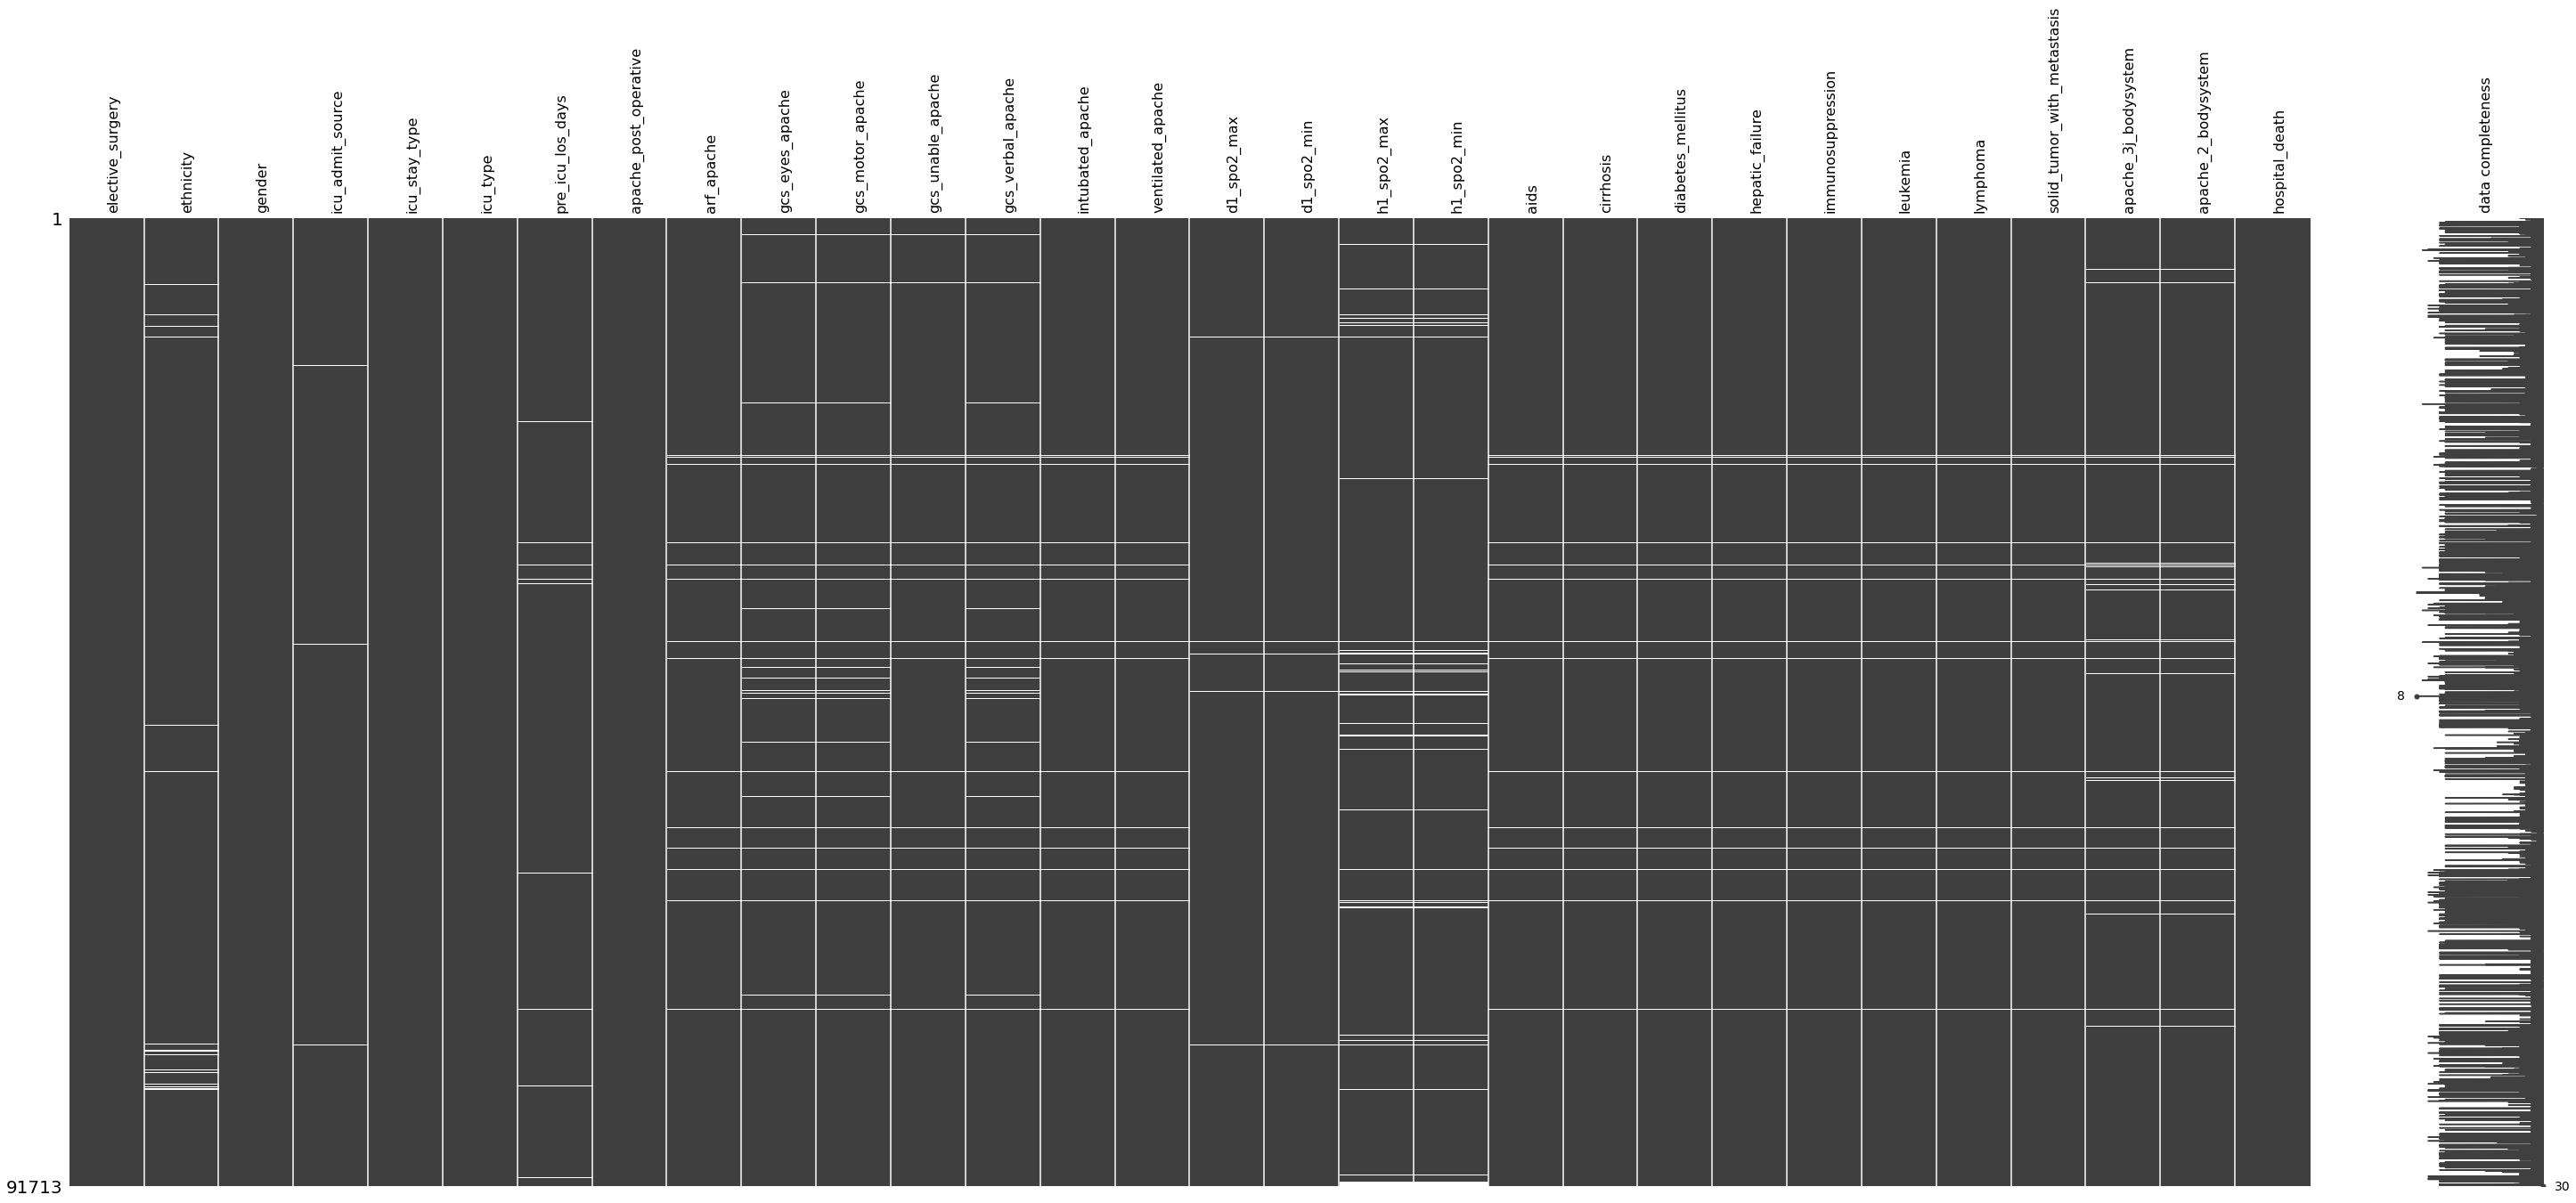

In [1036]:
msno.matrix(df[categorical_columns], figsize=(50,20), labels=True, label_rotation=90)

In [51]:
#relationship between null valued columns based on nullity correlation. 1 - > if one col has null, other col will also have null. for that row.

<AxesSubplot:>

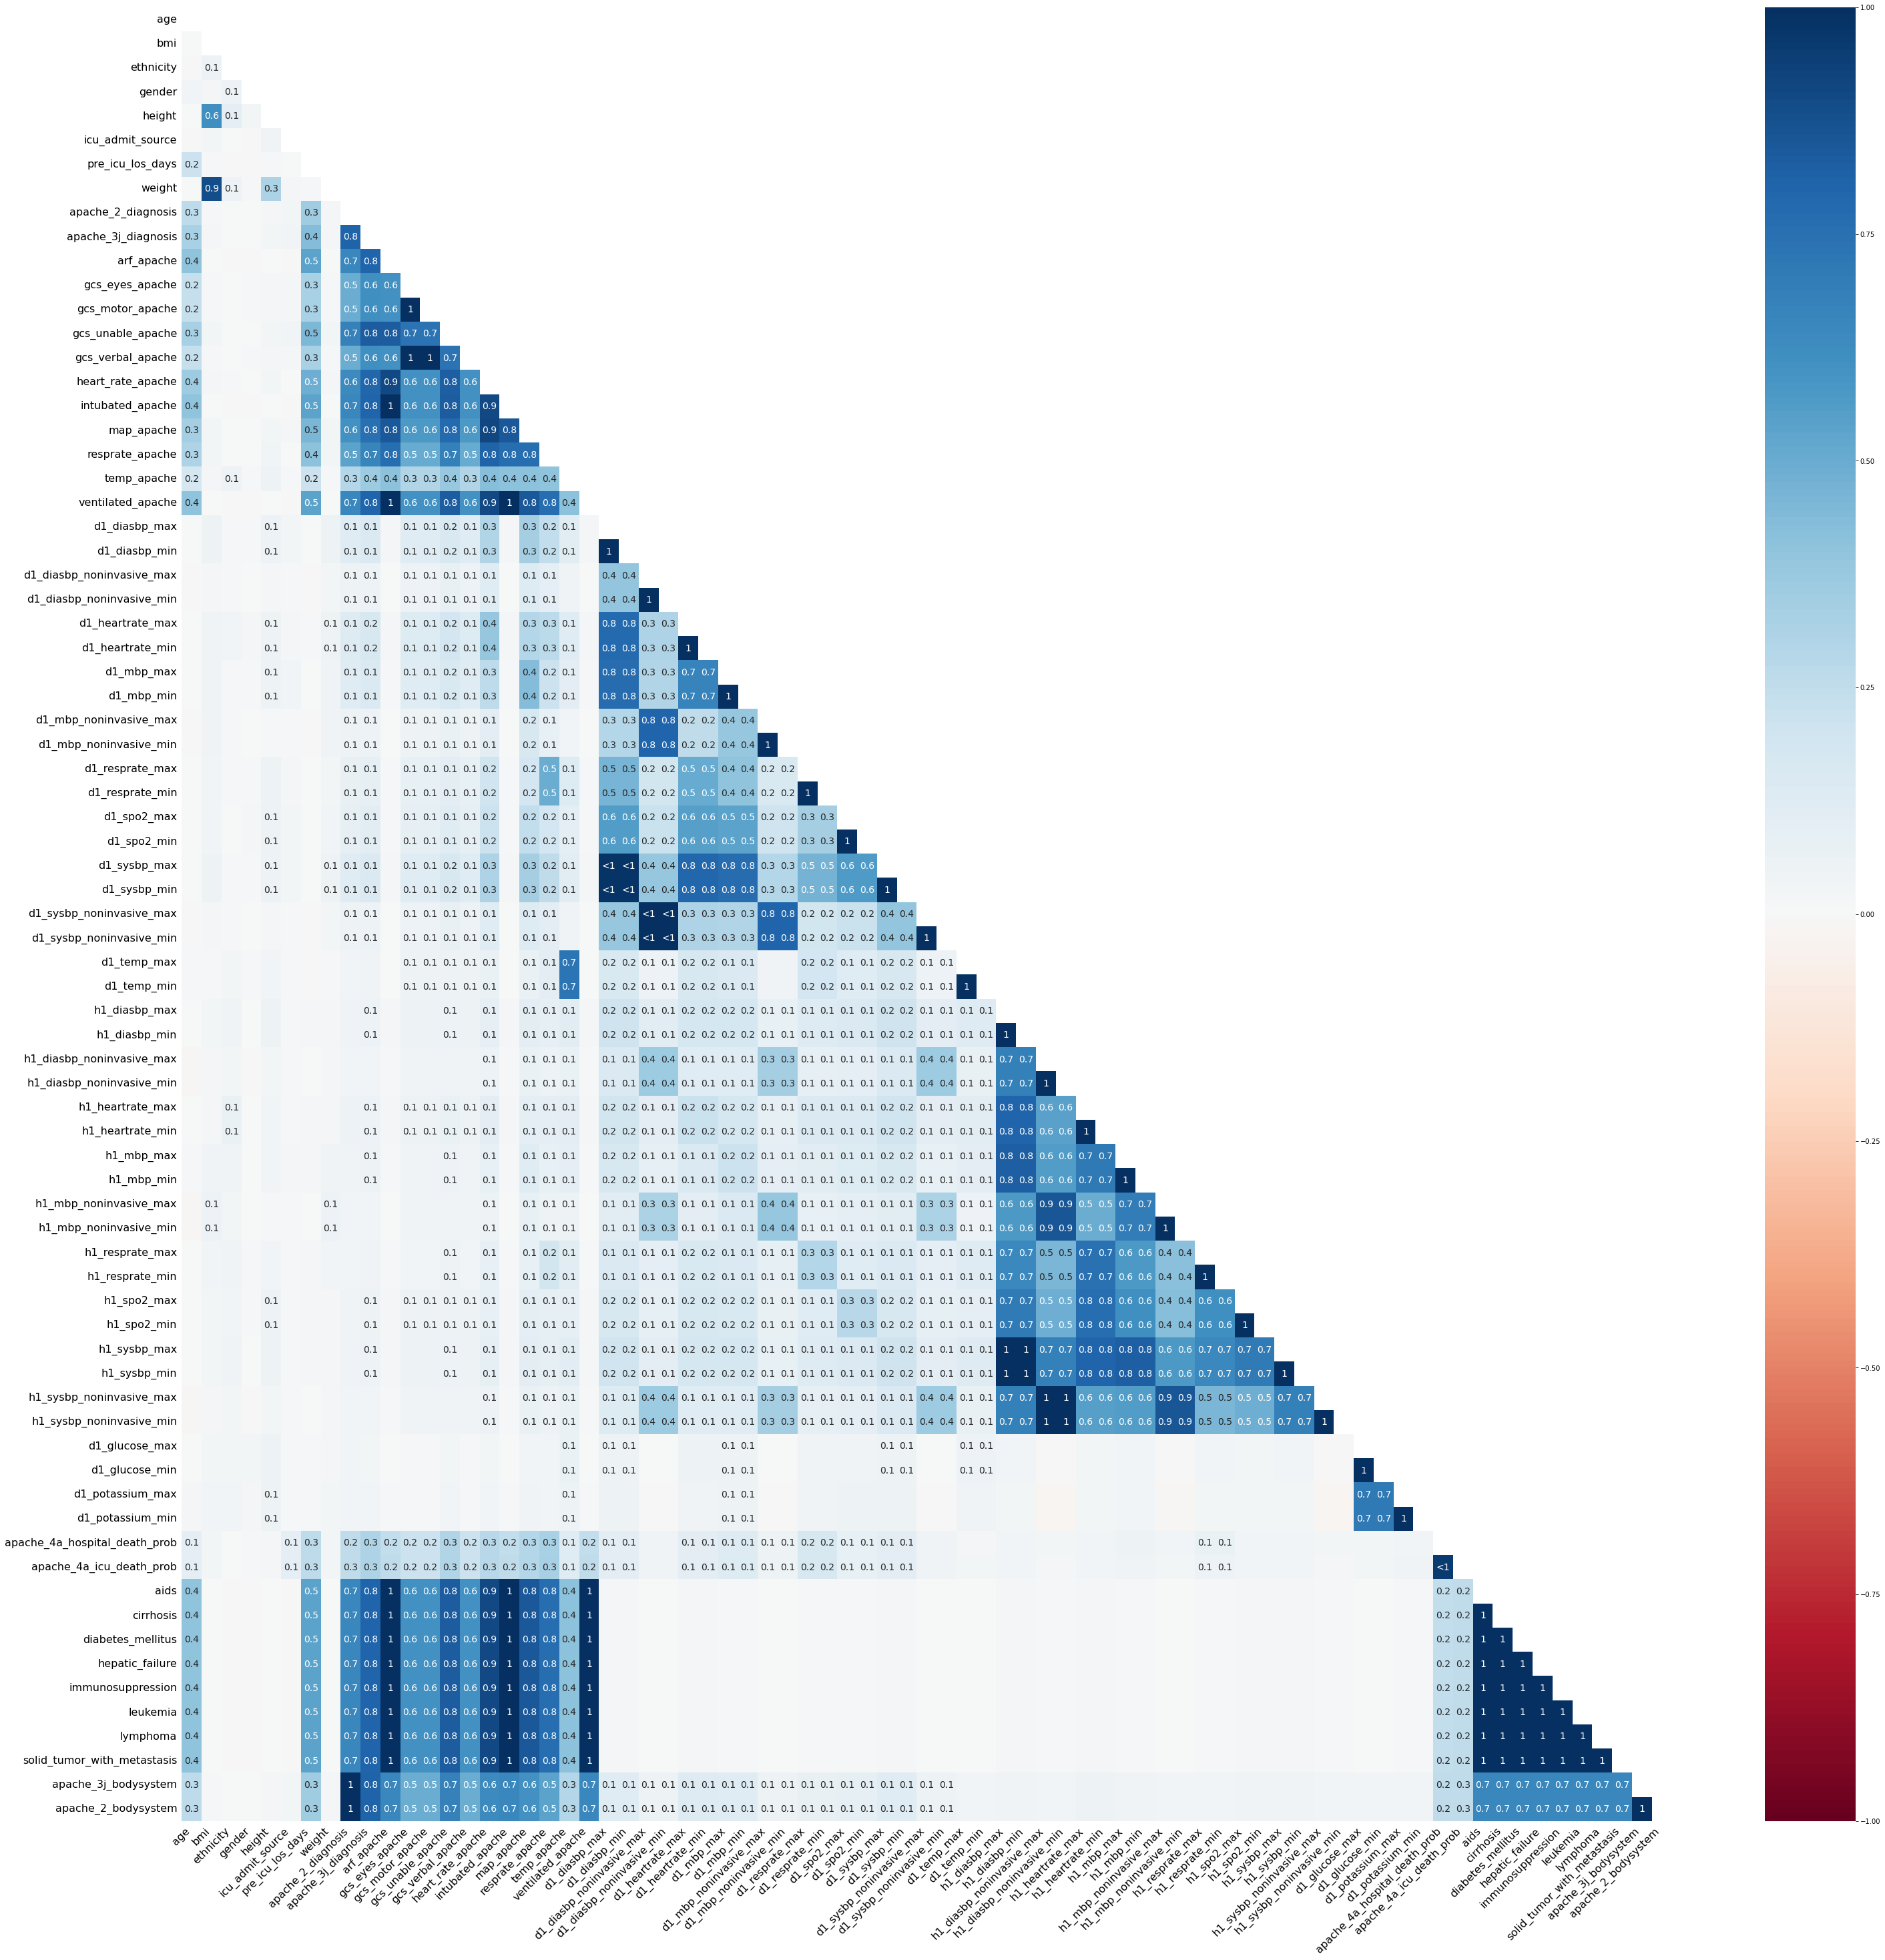

In [1037]:
msno.heatmap(df, figsize=(50,50))

In [298]:
((df[numerical_columns].isnull().sum()/len(df)).sort_values(ascending=False)*100)

apache_4a_hospital_death_prob    11.242241
apache_4a_icu_death_prob         11.091162
d1_potassium_min                 10.411307
d1_potassium_max                 10.411307
h1_mbp_noninvasive_min            9.897858
h1_mbp_noninvasive_max            9.897858
h1_diasbp_noninvasive_max         8.003897
h1_diasbp_noninvasive_min         8.003897
h1_sysbp_noninvasive_min          7.994044
h1_sysbp_noninvasive_max          7.994044
d1_glucose_min                    6.309186
d1_glucose_max                    6.309186
h1_mbp_min                        5.049101
h1_mbp_max                        5.049101
h1_resprate_min                   4.743659
h1_resprate_max                   4.743659
age                               4.598053
h1_spo2_max                       4.555357
h1_spo2_min                       4.555357
temp_apache                       4.448069
h1_diasbp_min                     3.935715
h1_diasbp_max                     3.935715
h1_sysbp_max                      3.926957
h1_sysbp_mi

In [299]:
((df[categorical_columns].isnull().sum()/len(df)).sort_values(ascending=False)*100)

gcs_eyes_apache                2.069124
gcs_motor_apache               2.069124
gcs_verbal_apache              2.069124
apache_2_bodysystem            1.808568
apache_3j_bodysystem           1.808568
ethnicity                      1.523926
gcs_unable_apache              1.128713
ventilated_apache              0.780574
immunosuppression              0.780574
hepatic_failure                0.780574
diabetes_mellitus              0.780574
cirrhosis                      0.780574
aids                           0.780574
intubated_apache               0.780574
lymphoma                       0.780574
arf_apache                     0.780574
solid_tumor_with_metastasis    0.780574
leukemia                       0.780574
icu_admit_source               0.119330
gender                         0.027369
elective_surgery               0.000000
apache_post_operative          0.000000
icu_type                       0.000000
icu_stay_type                  0.000000
hospital_death                 0.000000


###

### Highly Correlated columns

Many columns are highly correlated . The threshold for correlation is being considered as 0.98 or 98% for this dataset.
Accordingly there will be 12 highly coorelated columns which will be dropped from  " df_full "

In [979]:
corr_matrix = df.corr().abs()
# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find features with correlation greater than 0.98
to_drop = [column for column in upper.columns if any(upper[column] > 0.98)]
print(len(to_drop), 'highly correlated columns to drop')
print(to_drop)

12 highly correlated columns to drop
['d1_diasbp_noninvasive_max', 'd1_diasbp_noninvasive_min', 'd1_mbp_noninvasive_max', 'd1_mbp_noninvasive_min', 'd1_sysbp_noninvasive_max', 'd1_sysbp_noninvasive_min', 'h1_diasbp_noninvasive_max', 'h1_diasbp_noninvasive_min', 'h1_mbp_noninvasive_max', 'h1_mbp_noninvasive_min', 'h1_sysbp_noninvasive_max', 'h1_sysbp_noninvasive_min']


In [980]:
df.drop(to_drop,axis=1,inplace=True)

In [981]:
df.shape

(91343, 68)

In [982]:
numerical_columns = df.select_dtypes('number').columns.tolist()

In [983]:
categorical_columns = df.select_dtypes(exclude='number').columns.tolist()

In [984]:
len(numerical_columns), len(categorical_columns)

(43, 25)

### Splitting the dataset

In [985]:
def split_dataset(X, y, test_size=0.2):
    X_train, X_test, y_train, y_test = train_test_split (X, y, test_size=test_size, random_state=100)
    X_train = X_train.reset_index(drop=True)
    X_test = X_test.reset_index(drop=True)
    y_train = y_train.reset_index(drop=True)
    y_test = y_test.reset_index(drop=True)
    return X_train, X_test, y_train, y_test

In [986]:
X = df.drop(columns='hospital_death')
y = df['hospital_death']
X_train, X_test, y_train, y_test = split_dataset(X, y, 0.3)

print('Total no. of samples: Training and Testing dataset separately')
print('X_train:', np.shape(X_train))
print('y_train:', np.shape(y_train))
print('X_test:', np.shape(X_test))
print('y_test:', np.shape(y_test))

Total no. of samples: Training and Testing dataset separately
X_train: (63940, 67)
y_train: (63940,)
X_test: (27403, 67)
y_test: (27403,)


In [987]:
df.shape

(91343, 68)

##

### Encoding categorical variables <a class="anchor" id="seventh-bullet"></a>

In [988]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder

In [989]:
print(categorical_columns)

['elective_surgery', 'ethnicity', 'gender', 'icu_admit_source', 'icu_stay_type', 'icu_type', 'apache_post_operative', 'arf_apache', 'gcs_eyes_apache', 'gcs_motor_apache', 'gcs_unable_apache', 'gcs_verbal_apache', 'intubated_apache', 'ventilated_apache', 'aids', 'cirrhosis', 'diabetes_mellitus', 'hepatic_failure', 'immunosuppression', 'leukemia', 'lymphoma', 'solid_tumor_with_metastasis', 'apache_3j_bodysystem', 'apache_2_bodysystem', 'hospital_death']


In [990]:
binary_columns = df.nunique()[df.nunique()==2].index.tolist()
print(binary_columns)

['elective_surgery', 'gender', 'apache_post_operative', 'arf_apache', 'gcs_unable_apache', 'intubated_apache', 'ventilated_apache', 'aids', 'cirrhosis', 'diabetes_mellitus', 'hepatic_failure', 'immunosuppression', 'leukemia', 'lymphoma', 'solid_tumor_with_metastasis', 'hospital_death']


In [991]:
# df[['ethnicity', 'icu_admit_source', 'icu_stay_type', 'icu_type', 'apache_3j_bodysystem', 'apache_2_bodysystem',   'gcs_eyes_apache',   'gcs_motor_apache', 'gcs_unable_apache','gcs_verbal_apache']]

In [992]:
df[categorical_columns].nunique().sort_values(ascending=False)

apache_3j_bodysystem           11
apache_2_bodysystem             9
icu_type                        8
gcs_motor_apache                6
ethnicity                       6
icu_admit_source                5
gcs_verbal_apache               5
gcs_eyes_apache                 4
icu_stay_type                   3
elective_surgery                2
diabetes_mellitus               2
solid_tumor_with_metastasis     2
lymphoma                        2
leukemia                        2
immunosuppression               2
hepatic_failure                 2
intubated_apache                2
cirrhosis                       2
aids                            2
ventilated_apache               2
gcs_unable_apache               2
arf_apache                      2
apache_post_operative           2
gender                          2
hospital_death                  2
dtype: int64

In [993]:
# types of categorical columns
ordinal_cols = ['gcs_eyes_apache', 'gcs_motor_apache', 'gcs_verbal_apache']#, 'd1_spo2_min', 'h1_spo2_min', 'pre_icu_los_days']
nominal_cols = ['ethnicity', 'icu_admit_source', 'icu_stay_type', 'icu_type', 'apache_3j_bodysystem', 'apache_2_bodysystem']
binary_cols = df.nunique()[df.nunique()==2].index.tolist()
binary_cols.remove('hospital_death')
print('ordinal_columns:\n', len(ordinal_cols), ordinal_cols)
print('nominal_columns:\n', len(nominal_cols), nominal_cols)
print('binary_columns:\n', len(binary_cols), binary_cols)

ordinal_columns:
 3 ['gcs_eyes_apache', 'gcs_motor_apache', 'gcs_verbal_apache']
nominal_columns:
 6 ['ethnicity', 'icu_admit_source', 'icu_stay_type', 'icu_type', 'apache_3j_bodysystem', 'apache_2_bodysystem']
binary_columns:
 15 ['elective_surgery', 'gender', 'apache_post_operative', 'arf_apache', 'gcs_unable_apache', 'intubated_apache', 'ventilated_apache', 'aids', 'cirrhosis', 'diabetes_mellitus', 'hepatic_failure', 'immunosuppression', 'leukemia', 'lymphoma', 'solid_tumor_with_metastasis']


In [994]:
oe = OrdinalEncoder()
# these columns are either ordered or binary, hence we can use ordinal
oe.fit(X_train[ordinal_cols+binary_cols])

OrdinalEncoder()

In [995]:
x1 = pd.DataFrame(oe.transform(X_train[ordinal_cols+binary_cols]), columns=ordinal_cols+binary_cols)

In [996]:
x1_test = pd.DataFrame(oe.transform(X_test[ordinal_cols+binary_cols]), columns=ordinal_cols+binary_cols)

In [997]:
ohe = OneHotEncoder(sparse=False) #drop='first', sparse=False)
# nulls are assigned as new subcategory
ohe.fit(X_train[nominal_cols])

OneHotEncoder(sparse=False)

In [998]:
x2 = pd.DataFrame(ohe.transform(X_train[nominal_cols]), columns=ohe.get_feature_names_out())

In [999]:
x2_test = pd.DataFrame(ohe.transform(X_test[nominal_cols]), columns=ohe.get_feature_names_out())

In [1000]:
X_train = pd.concat([X_train[numerical_columns], x1, x2], axis=1)

In [1001]:
X_test = pd.concat([X_test[numerical_columns], x1_test, x2_test], axis=1)

In [1002]:
X_train.shape

(63940, 107)

In [1003]:
X_test.shape

(27403, 107)

In [1004]:
X_train.head()

age        bmi  height  pre_icu_los_days  weight  apache_2_diagnosis  \
0  72.0  24.751827   157.5          0.179167    61.4               305.0   
1  50.0  33.630540   152.0          0.102778    77.7               112.0   
2  80.0  31.483655   157.4          0.026389    78.0               121.0   
3  78.0  34.137529   163.0          0.315278    90.7               113.0   
4  74.0  23.316706   182.9          0.527083    78.0               113.0   

   apache_3j_diagnosis  heart_rate_apache  map_apache  resprate_apache  \
0               901.04               49.0        67.0             13.0   
1               107.01              119.0       143.0             12.0   
2               401.01               60.0        62.0             11.0   
3               501.06              107.0        57.0             29.0   
4               501.05              102.0        40.0             24.0   

   temp_apache  d1_diasbp_max  d1_diasbp_min  d1_heartrate_max  \
0        36.70           60.0           46.0              63.0   
1        36.60          103.0           60.0             104.0   
2        36.61          112.0           42.0              77.0   
3        36.90           98.0           51.0             111.0   
4        35.90           87.0           45.0             101.0   

   d1_heartrate_min  d1_mbp_max  d1_mbp_min  d1_resprate_max  d1_resprate_min  \
0              50.0        82.0        67.0             17.0             13.0   
1              82.0       124.0        68.0             21.0             12.0   
2              59.0       117.0        67.0             20.0             11.0   
3              77.0       105.0        62.0             32.0             14.0   
4              69.0        93.0        52.0             24.0             15.0   

   d1_spo2_max  d1_spo2_min  d1_sysbp_max  d1_sysbp_min  d1_temp_max  \
0         98.0         95.0         142.0         121.0        36.70   
1        100.0         90.0         168.0          97.0        36.80   
2        100.0         98.0         198.0         129.0        37.33   
3        100.0         90.0         150.0          80.0        38.40   
4        100.0         77.0         117.0          81.0        37.20   

   d1_temp_min  h1_diasbp_max  h1_diasbp_min  h1_heartrate_max  \
0        36.70           50.0           46.0              53.0   
1        36.60           88.0           88.0              89.0   
2        36.61           51.0           48.0              61.0   
3        36.10           90.0           75.0              88.0   
4        35.90           79.0           49.0              90.0   

   h1_heartrate_min  h1_mbp_max  h1_mbp_min  h1_resprate_max  h1_resprate_min  \
0              50.0        71.0        67.0             16.0             16.0   
1              85.0       107.0       107.0             20.0             14.0   
2              60.0        88.0        87.0             16.0             12.0   
3              87.0       105.0        86.0             32.0             19.0   
4              80.0        85.0        60.0             23.0             15.0   

   h1_spo2_max  h1_spo2_min  h1_sysbp_max  h1_sysbp_min  d1_glucose_max  \
0         96.0         95.0         131.0         129.0           155.0   
1         99.0         96.0         144.0         144.0           128.0   
2        100.0        100.0         196.0          53.0           157.0   
3         99.0         97.0         150.0         124.0           159.0   
4         97.0         77.0         105.0          81.0           219.0   

   d1_glucose_min  d1_potassium_max  d1_potassium_min  \
0            94.0               4.9               4.9   
1           128.0               3.8               3.8   
2           157.0               4.7               4.7   
3           112.0               3.6               3.6   
4           121.0               4.1               4.1   

   apache_4a_hospital_death_prob  apache_4a_icu_death_prob  gcs_eyes_apache  \
0                           

In [1005]:
# All columns are numerical now.
X_train.dtypes.unique()

array([dtype('float64')], dtype=object)

In [1006]:
# to keep track of all column names
X_columns = X_train.columns.tolist()

In [1007]:
le = LabelEncoder()
le.fit(y_train)

LabelEncoder()

In [1008]:
y_train = le.transform(y_train)

In [1009]:
y_test = le.transform(y_test)

In [1010]:
pd.Series(y_train).value_counts(normalize=True)

0    0.915139
1    0.084861
dtype: float64

In [1011]:
pd.Series(y_test).value_counts(normalize=True)

0    0.913294
1    0.086706
dtype: float64

## Imputation

In [1012]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer, KNNImputer
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier

### Simple Imputation
Filling missing values using median and mode

In [1013]:
def perform_imputation_simple(X_train, X_test, numerical_columns, ordinal_cols, binary_cols):
    X_train_imputed = X_train.copy()
    X_test_imputed = X_test.copy()
    
    # median imputation for numerical columns
    imp_num = SimpleImputer(missing_values=np.nan, strategy='mean')
    imp_num.fit(X_train[numerical_columns])
    X_train_imputed[numerical_columns] = imp_num.transform(X_train[numerical_columns])
    X_test_imputed[numerical_columns] = imp_num.transform(X_test[numerical_columns])
    
    # Mode imputation for categorical variables (nominal columns already include new column for missing)
    imp_cat = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
    imp_cat.fit(X_train[ordinal_cols+binary_cols])
    X_train_imputed[ordinal_cols+binary_cols] = imp_cat.transform(X_train[ordinal_cols+binary_cols])
    X_test_imputed[ordinal_cols+binary_cols] = imp_cat.transform(X_test[ordinal_cols+binary_cols])
    
    return X_train_imputed, X_test_imputed

### Multiple Imputer
A strategy for imputing missing values by modeling each feature with
missing values as a function of other features in a round-robin fashion

In [1014]:
def perform_imputation_mice(X_train, X_test, numerical_columns, ordinal_cols, binary_cols):
    X_train_imputed = X_train.copy()
    X_test_imputed = X_test.copy()
    
    # Imputing numerical features with Linear Regression as estimator for MICE
    lr = LinearRegression()
    imp_num = IterativeImputer(estimator=lr, missing_values=np.nan, max_iter=10, verbose=2, random_state=0)
    imp_num.fit(X_train[numerical_columns])
    X_train_imputed[numerical_columns] = imp_num.transform(X_train[numerical_columns])
    X_test_imputed[numerical_columns] = imp_num.transform(X_test[numerical_columns])
    
    # Imputing categorical features with Decision Tree as estimator for MICE (nominal columns already include new column for missing)
    dt = DecisionTreeClassifier(max_depth=10)
    imp_cat = IterativeImputer(estimator=dt, missing_values=np.nan, max_iter=10, verbose=2, random_state=0)
    imp_cat.fit(X_train[ordinal_cols+binary_cols])
    X_train_imputed[ordinal_cols+binary_cols] = imp_cat.transform(X_train[ordinal_cols+binary_cols])
    X_test_imputed[ordinal_cols+binary_cols] = imp_cat.transform(X_test[ordinal_cols+binary_cols])
    
    return X_train_imputed, X_test_imputed

### KNN Imputer

Since KNN uses nearest neighbor and imputes the missing values and it doesnt depend
on other columns like in multivariate approach.
Second it uses Euclidean distance to form the neighbors and fillinf missing values 
is not random or artificial unlike in Simple Imputations

In [1015]:
def perform_imputation_knn(X_train, X_test, numerical_columns, ordinal_cols, binary_cols):
    X_train_scaled = X_train.copy()
    X_test_scaled = X_test.copy()
    
    # Scaling numerical columns before applying KNN impute
    sc = StandardScaler()
    sc.fit(X_train[numerical_columns])
    X_train_scaled[numerical_columns] = sc.transform(X_train[numerical_columns])
    X_test_scaled[numerical_columns] = sc.transform(X_test[numerical_columns])
    
    # Imputing numerical features with KNN
    impute_knn=KNNImputer(n_neighbors=4)
    impute_knn.fit(X_train_scaled[numerical_columns])
    X_train_scaled[numerical_columns] = impute_knn.transform(X_train_scaled[numerical_columns])
    X_test_scaled[numerical_columns] = impute_knn.transform(X_test_scaled[numerical_columns])
    
#     # Mode imputation for categorical variables (nominal columns already include new column for missing)
#     imp_cat = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
#     imp_cat.fit(X_train_scaled[ordinal_cols+binary_cols])
#     X_train_scaled[ordinal_cols+binary_cols] = imp_cat.transform(X_train_scaled[ordinal_cols+binary_cols])
#     X_test_scaled[ordinal_cols+binary_cols] = imp_cat.transform(X_test_scaled[ordinal_cols+binary_cols])
    
    # Imputing categorical features with Decision Tree as estimator for MICE (nominal columns already include new column for missing)
    dt = DecisionTreeClassifier(max_depth=10)
    imp_cat = IterativeImputer(estimator=dt, missing_values=np.nan, max_iter=10, verbose=2, random_state=0)
    imp_cat.fit(X_train_scaled[ordinal_cols+binary_cols])
    X_train_scaled[ordinal_cols+binary_cols] = imp_cat.transform(X_train_scaled[ordinal_cols+binary_cols])
    X_train_scaled[ordinal_cols+binary_cols] = imp_cat.transform(X_train_scaled[ordinal_cols+binary_cols])
    
    # inverse transform the numerical values to get to to original scale before returning
    X_train_scaled[numerical_columns] = sc.inverse_transform(X_train[numerical_columns])
    X_test_scaled[numerical_columns] = sc.inverse_transform(X_test[numerical_columns])
    
    return X_train_scaled, X_test_scaled

In [1016]:
# there are no missing values in target
pd.isna(y_train).sum(), pd.isna(y_test).sum()

(0, 0)

In [1017]:
# X_train, X_test = perform_imputation_mice(X_train, X_test, numerical_columns, ordinal_cols, binary_cols)
# X_train, X_test = perform_imputation_knn(X_train, X_test, numerical_columns, ordinal_cols, binary_cols)
X_train, X_test = perform_imputation_simple(X_train, X_test, numerical_columns, ordinal_cols, binary_cols)

In [1018]:
X_train.isna().sum().sum(), X_test.isna().sum().sum()

(0, 0)

In [1019]:
# Save copy of imputed data, as imputation is computationally expensive. We can retreive this back after any more changes during model building
X_train_copy = X_train.copy()
X_test_copy = X_test.copy()
y_train_copy = y_train.copy()
y_test_copy = y_test.copy()

In [1021]:
# Scaling numerical columns before applying logistic regression
sc = StandardScaler()
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

sc.fit(X_train[numerical_columns])
X_train_scaled[numerical_columns] = sc.transform(X_train[numerical_columns])
X_test_scaled[numerical_columns] = sc.transform(X_test[numerical_columns])

In [1022]:
# Transform numerical columns
pt = PowerTransformer()
X_train_transf = X_train.copy()
X_test_transf = X_test.copy()

pt.fit(X_train[numerical_columns])
X_train_transf[numerical_columns] = pt.transform(X_train[numerical_columns])
X_test_transf[numerical_columns] = pt.transform(X_test[numerical_columns])

c:\users\sparsh singhal\appdata\local\programs\python\python39\lib\site-packages\numpy\core\_methods.py:205: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
c:\users\sparsh singhal\appdata\local\programs\python\python39\lib\site-packages\numpy\core\_methods.py:216: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(x, axis, dtype, out, keepdims)


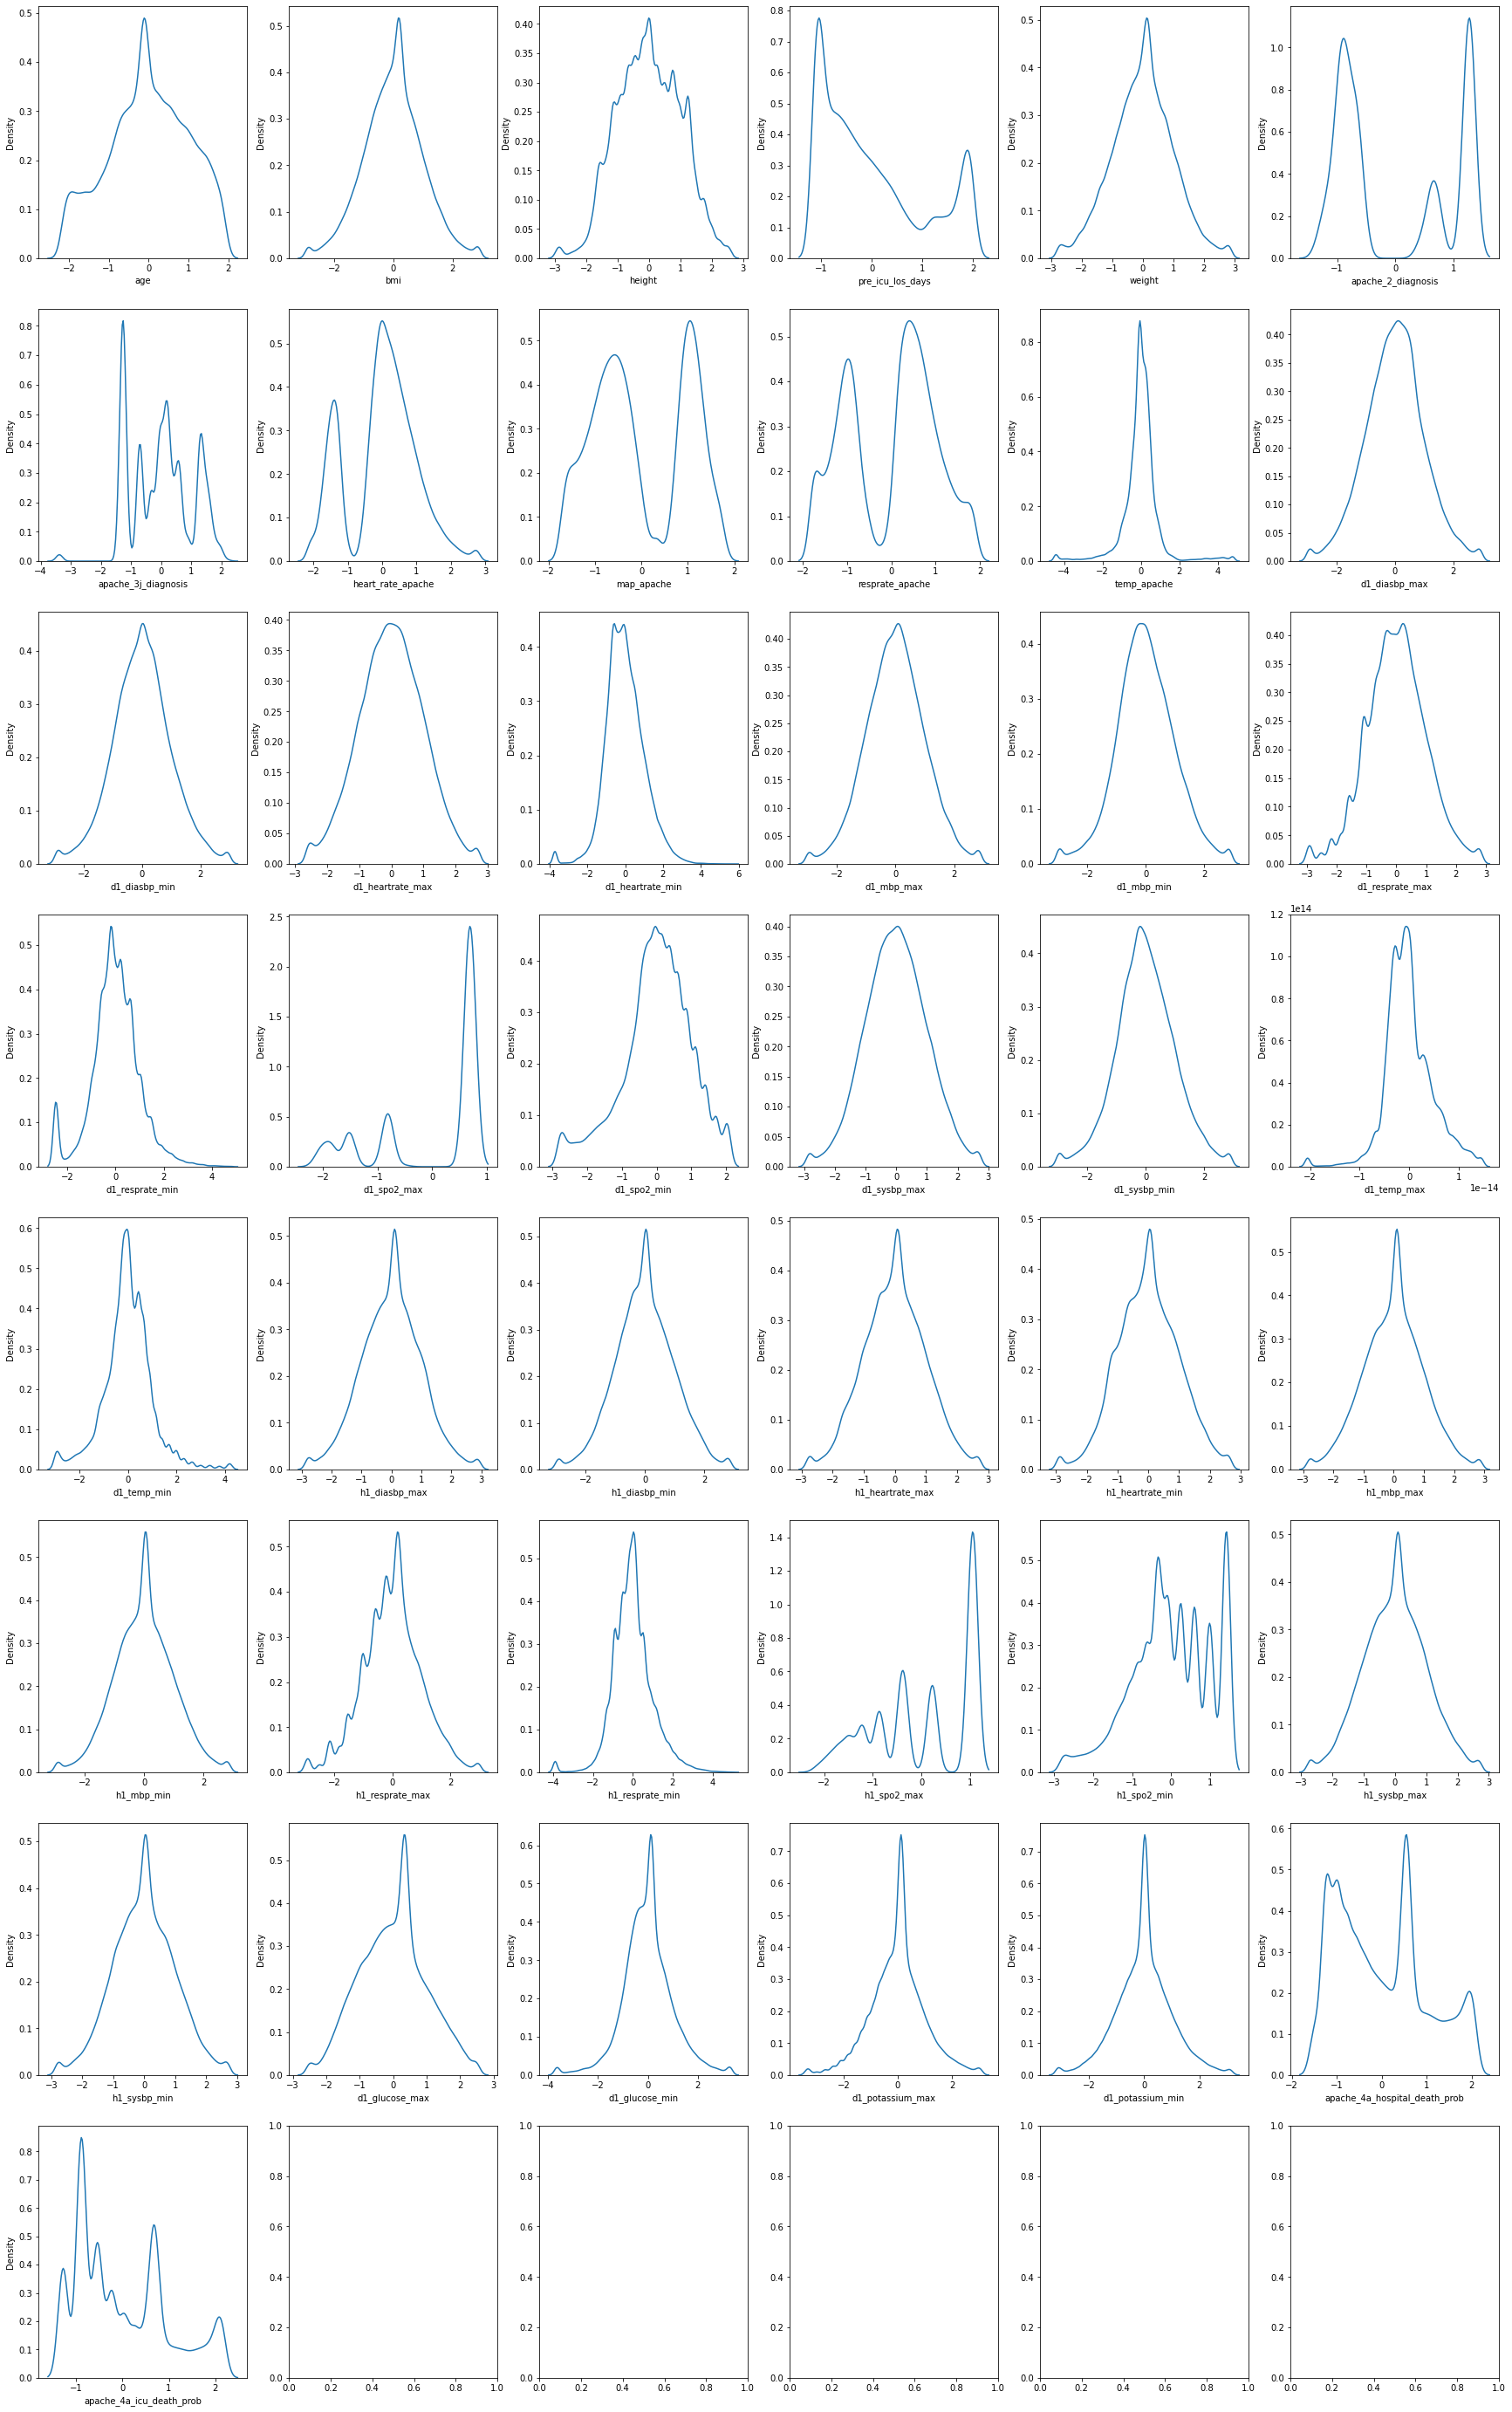

In [1023]:
fig, ax = plt.subplots(nrows=8, ncols=6, figsize=(30,50))

i=0
for col in numerical_columns:   
    r = i//6
    c = i%6
    i+=1
    sns.kdeplot(data=X_train_transf, x=col, ax=ax[r][c])

##

## Statistical Tests for feature selection

In [1024]:
from sklearn.feature_selection import SelectKBest, chi2, mutual_info_classif


In [1134]:
def select_features_chi2(X_train, y_train, X_test, k='all'):
    fs = SelectKBest(score_func=chi2, k=k)
    fs.fit(X_train, y_train)
    # X_train_fs = fs.transform(X_train)
    # X_test_fs = fs.transform(X_test)
    return fs

In [1135]:
def select_features_mi(X_train, y_train, X_test, k='all'):
    def mi(X, y):
        return mutual_info_classif(X, y, discrete_features=[i for i in range(64)]) 
    fs = SelectKBest(score_func=mi, k=k)
    fs.fit(X_train, y_train)
    # X_train_fs = fs.transform(X_train)
    # X_test_fs = fs.transform(X_test)
    return fs

In [1027]:
encoded_categorical_columns = list(set(X_columns).difference(set(numerical_columns)))

In [1028]:
len(encoded_categorical_columns)

64

In [1029]:
# Using chi-squared test for feature selection
fs_chi2 = select_features_chi2(X_train[encoded_categorical_columns], y_train, X_test[encoded_categorical_columns])

In [1030]:
df_best_features_chi2 = pd.Series(fs_chi2.scores_, index=encoded_categorical_columns, name='score').sort_values(ascending=False)
print(df_best_features_chi2.head(20).index.tolist())

['gcs_verbal_apache', 'ventilated_apache', 'gcs_motor_apache', 'intubated_apache', 'gcs_eyes_apache', 'apache_3j_bodysystem_Sepsis', 'elective_surgery', 'icu_admit_source_Operating Room / Recovery', 'apache_post_operative', 'apache_2_bodysystem_Metabolic', 'apache_3j_bodysystem_Metabolic', 'icu_admit_source_Floor', 'apache_2_bodysystem_Cardiovascular', 'gcs_unable_apache', 'solid_tumor_with_metastasis', 'apache_2_bodysystem_Undefined diagnoses', 'immunosuppression', 'hepatic_failure', 'cirrhosis', 'icu_type_MICU']


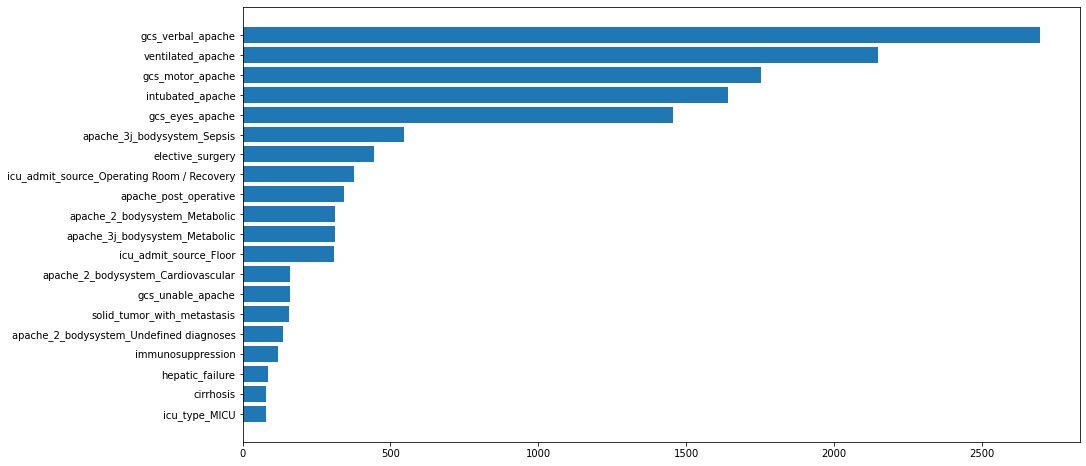

In [1031]:
plt.figure(figsize=(15,8))
plt.barh(df_best_features_chi2.head(20).sort_values().index, df_best_features_chi2.head(20).sort_values().values)
# plt.xticks(rotation=90)
plt.show()

In [1032]:
# Using Mutual Information for feature selection
fs_mi = select_features_mi(X_train[encoded_categorical_columns+numerical_columns], y_train, X_test[encoded_categorical_columns+numerical_columns])

In [1033]:
df_best_features_mi = pd.Series(fs_mi.scores_, index=encoded_categorical_columns+numerical_columns, name='score').sort_values(ascending=False)
print(df_best_features_mi[:20].index.tolist())

['apache_4a_hospital_death_prob', 'apache_4a_icu_death_prob', 'apache_3j_diagnosis', 'apache_2_diagnosis', 'gcs_motor_apache', 'd1_sysbp_min', 'gcs_eyes_apache', 'ventilated_apache', 'gcs_verbal_apache', 'd1_mbp_min', 'd1_temp_min', 'd1_spo2_min', 'temp_apache', 'd1_diasbp_min', 'map_apache', 'h1_sysbp_min', 'd1_heartrate_min', 'd1_temp_max', 'd1_heartrate_max', 'heart_rate_apache']


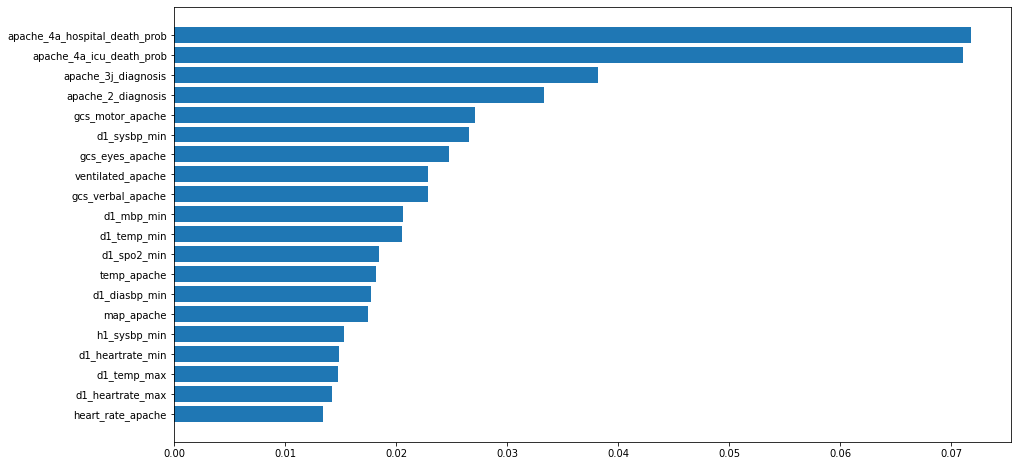

In [1034]:
plt.figure(figsize=(15,8))
plt.barh(df_best_features_mi.head(20).sort_values().index, df_best_features_mi.head(20).sort_values().values)
# plt.xticks(rotation=90)
plt.show()

In [1035]:
# Using ANOVA for feature selection from numerical columns

In [1036]:
from sklearn.feature_selection import f_classif

In [1037]:
fs = SelectKBest(score_func=f_classif, k=20)
# apply feature selection

In [1038]:
X_selected = fs.fit_transform(X_train[numerical_columns], y_train)

In [1039]:
best_features_num = pd.Series(fs.scores_, index=numerical_columns).sort_values(ascending=False)
best_features_num.head(20).index


Index(['apache_4a_hospital_death_prob', 'apache_4a_icu_death_prob',
       'd1_sysbp_min', 'd1_temp_min', 'd1_spo2_min', 'd1_mbp_min',
       'd1_diasbp_min', 'd1_heartrate_max', 'temp_apache', 'h1_sysbp_min',
       'h1_mbp_min', 'h1_diasbp_min', 'h1_resprate_max', 'h1_heartrate_max',
       'h1_resprate_min', 'heart_rate_apache', 'd1_potassium_max', 'age',
       'd1_resprate_max', 'h1_spo2_min'],
      dtype='object')

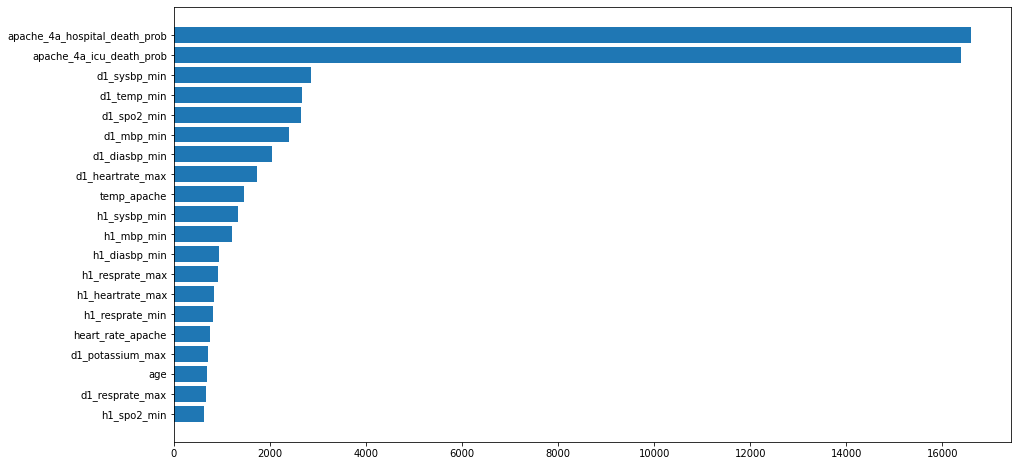

In [1040]:
plt.figure(figsize=(15,8))
plt.barh(best_features_num.head(20).sort_values().index, best_features_num.head(20).sort_values().values)
# plt.xticks(rotation=90)
plt.show()

In [1041]:
top_features = ['gcs_motor_apache', 'gcs_verbal_apache', 'gcs_eyes_apache', 'ventilated_apache', 'intubated_apache', 'elective_surgery', 'icu_admit_source_Operating Room / Recovery', 'pre_icu_los_days', 'apache_3j_bodysystem_Metabolic', 'apache_3j_bodysystem_Sepsis', 'apache_post_operative', 'd1_spo2_min', 'apache_4a_hospital_death_prob', 'apache_4a_icu_death_prob', 'd1_heartrate_max', 'd1_mbp_min', 'd1_temp_min', 'd1_sysbp_min', 'd1_diasbp_min', 'temp_apache']
# top_features = df_best_features_mi.head(20).index.tolist()
# top_features = X_columns

## Model Building <a class="anchor" id="seventh-bullet"></a>

In [1042]:
from sklearn.metrics import fbeta_score, make_scorer, f1_score, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

In [1043]:
X_train.shape

(63940, 107)

#### Utility functions

In [1044]:
ftwo_scorer = make_scorer(fbeta_score, beta=2)

In [1045]:
def evaluate_model(estimator, X_train, y_train, X_test, y_test, train_scores=False):
    estimator.fit(X_train, y_train)
    if train_scores:
        y_true = y_train
        y_hat = estimator.predict(X_train)
        y_hat_probs = estimator.predict_proba(X_train)[:,1]
    else:
        y_true = y_test
        y_hat = estimator.predict(X_test)
        y_hat_probs = estimator.predict_proba(X_test)[:,1]
    
    f1 = f1_score(y_true, y_hat)*100
    f2 = fbeta_score(y_true, y_hat, beta=2)*100
    auc_roc = roc_auc_score(y_true, y_hat_probs)*100
    accuracy = accuracy_score(y_true, y_hat)*100
    return {'f1': round(f1, 2), 'f2': round(f2, 2), 'roc': round(auc_roc, 2), 'acc': round(accuracy, 2)}

In [1046]:
def get_cv_results(estimator, X, y):
    print('CV scores (mean, std) for ', estimator)
    fone_scores = cross_val_score(estimator, X, y, scoring='f1', cv=5, verbose=1)
    print('f1:', fone_scores.mean(), fone_scores.std(), fone_scores)
    ftwo_scores = cross_val_score(estimator, X, y, scoring=ftwo_scorer, cv=5, verbose=1)
    print('f2:', ftwo_scores.mean(), ftwo_scores.std(), ftwo_scores)
    roc_scores = cross_val_score(estimator, X, y, scoring='roc_auc', cv=5, verbose=1)
    print('roc:', roc_scores.mean(), roc_scores.std(), roc_scores)
    acc_scores = cross_val_score(estimator, X, y, scoring='accuracy', cv=5, verbose=1)
    print('acc:', acc_scores.mean(), acc_scores.std(), acc_scores)
    return fone_scores.mean(), ftwo_scores.mean(), roc_scores.mean(), acc_scores.mean()

In [1047]:
def plot_confusion_matrix(cm, norm=False): 
    conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1'], 
                               index = ['Actual:0','Actual:1'])
    fmt = '0.2f' if norm else 'd'
    plt.figure(figsize=(5,3))
    sns.heatmap(conf_matrix, annot = True, fmt = fmt, cmap = ListedColormap(['lightskyblue']), cbar = False, 
                linewidths = 0.1, annot_kws = {'size':25})    
    plt.xticks(fontsize = 10)
    plt.yticks(fontsize = 10)
    plt.show()

In [1048]:
def plot_roc(fpr, tpr, thresholds, score):
    plt.plot(fpr, tpr)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.plot([0, 1], [0, 1],'r--')
    plt.title('ROC curve ', fontsize = 15)
    plt.xlabel('False positive rate (1-Specificity)', fontsize = 15)
    plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)
    plt.text(x = 0.02, y = 0.9, s = ('AUC Score:',round(score)))
    plt.grid(True)

In [1049]:
def display_model_results(y_true, y_predicted, y_predicted_prob, norm=False):
    f2 = fbeta_score(y_true, y_predicted, beta=2)*100
    auc_roc = roc_auc_score(y_true, y_predicted_prob)*100
    # PR AUC - precision recall ROC curve area
    avg_prec_score = average_precision_score(y_true, y_predicted_prob)
    cm = confusion_matrix(y_true, y_predicted)
    cm_norm = cm*100/cm.sum()
    print('ROC AUC: %.4f' % auc_roc)
    print('f2 Score: %.4f %%' % f2)
    print(f'Avg Precision Score: {avg_prec_score:.2f}')
    print()
    print(classification_report(y_true, y_predicted))
    if norm:
        plot_confusion_matrix(cm_norm, True)
    else:
        plot_confusion_matrix(cm)
        

In [1060]:
X_train_scaled.shape, y_train.shape

((63940, 107), (63940,))

In [1061]:
X_test_scaled.shape, y_test.shape

((27403, 107), (27403,))

## Model evaluation with all features

In [1056]:
lr = LogisticRegression(max_iter=1000, class_weight='balanced', random_state=100)
dt = DecisionTreeClassifier(max_depth=6, min_samples_split=30, class_weight='balanced', random_state=100)
rf = RandomForestClassifier(max_depth=6, min_samples_split=30, class_weight='balanced', random_state=100)
classifiers = [lr, dt, rf]
cl_names = ['lr', 'dt', 'rf']
results = []
for classifier, name in zip(classifiers, cl_names):
    res = evaluate_model(classifier, X_train_scaled, y_train, X_test_scaled, y_test)
    results.append(res)
    print(name, res)

lr {'f1': 41.88, 'f2': 57.95, 'roc': 87.98, 'acc': 81.26}
dt {'f1': 37.39, 'f2': 54.1, 'roc': 85.93, 'acc': 77.62}
rf {'f1': 41.59, 'f2': 57.39, 'roc': 87.58, 'acc': 81.28}


## Model evaluation with top features

### Logistic Regression

In [1068]:
lr_tf = LogisticRegression(max_iter=1000, class_weight='balanced', random_state=100)
get_cv_results(lr_tf, X_train_scaled[top_features], y_train)

CV scores (mean, std) for  LogisticRegression(class_weight='balanced', max_iter=1000, random_state=100)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    1.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


f1: 0.4036592172085035 0.0044068196755544225 [0.40193089 0.41155419 0.402      0.39833377 0.40447723]


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    1.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


f2: 0.551531922865206 0.007327536124881892 [0.54999305 0.56160179 0.55410062 0.53903608 0.55292808]


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    1.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


roc: 0.8613803703337956 0.006445006696112197 [0.8596511  0.86659965 0.86795532 0.84988346 0.86281233]
acc: 0.817015952455427 0.0025184227069882693 [0.81592118 0.81998749 0.81294964 0.8192837  0.81693775]


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    1.5s finished


(0.4036592172085035, 0.551531922865206, 0.8613803703337956, 0.817015952455427)

In [1069]:
lr_classifier = LogisticRegression(max_iter=1000, class_weight='balanced', random_state=100)
lr_classifier.fit(X_train_scaled[top_features], y_train)

LogisticRegression(class_weight='balanced', max_iter=1000, random_state=100)

ROC AUC: 86.7721
f2 Score: 56.3043 %
Avg Precision Score: 0.46

              precision    recall  f1-score   support

           0       0.97      0.82      0.89     25027
           1       0.29      0.74      0.41      2376

    accuracy                           0.82     27403
   macro avg       0.63      0.78      0.65     27403
weighted avg       0.91      0.82      0.85     27403



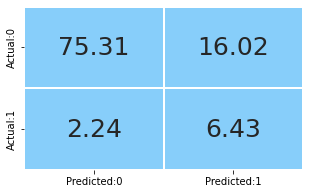

In [1070]:
y_test_hat = lr_classifier.predict(X_test_scaled[top_features])
y_test_hat_probs = lr_classifier.predict_proba(X_test_scaled[top_features])[:,1]
display_model_results(y_test, y_test_hat, y_test_hat_probs, True)

### Threshold tuning

In [1071]:
from sklearn.metrics import precision_recall_curve

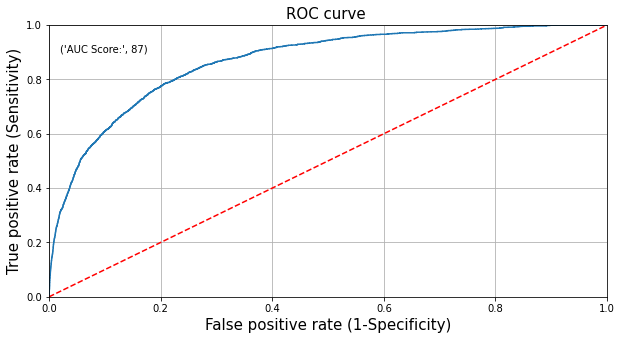

In [1072]:
test_auc_roc = roc_auc_score(y_test, y_test_hat_probs)*100
fpr, tpr, thresholds = roc_curve(y_test, y_test_hat_probs)
plot_roc(fpr, tpr, thresholds, test_auc_roc)

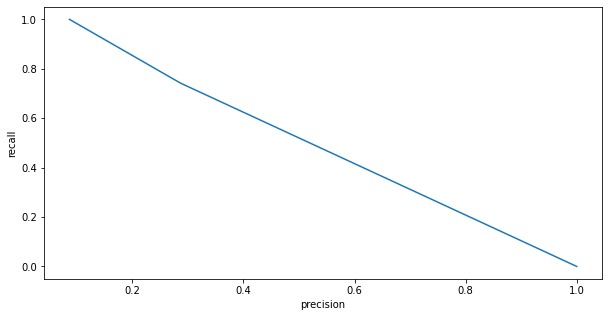

In [1073]:
precision_, recall_, thresholds_ = precision_recall_curve(y_test, y_test_hat)
plt.xlabel('precision')
plt.ylabel('recall')
plt.plot(precision_, recall_)

In [1074]:
from sklearn.metrics import precision_recall_fscore_support

In [1075]:
thresholds_ = [0.1*i for i in range(0,11)]

accuracies, recalls, precs, fones, fbetas = [], [], [], [], []

for thresh in thresholds_:
    y_test_hat2 = np.where(y_test_hat_probs>=thresh, 1, 0)
    accuracy = accuracy_score(y_test, y_test_hat2)
    prec, recall, fbeta, support  = precision_recall_fscore_support(y_test, y_test_hat2, beta=2, zero_division=0)
    accuracies.append(accuracy)
    precs.append(prec[1])
    recalls.append(recall[1])
    fones.append(2*prec[1]*recall[1]/(prec[1]+recall[1]))
    fbetas.append(fbeta[1])

C:\Users\Sparsh Singhal\AppData\Local\Temp/ipykernel_29796/1817608773.py:12: RuntimeWarning: invalid value encountered in double_scalars
  fones.append(2*prec[1]*recall[1]/(prec[1]+recall[1]))


<AxesSubplot:>

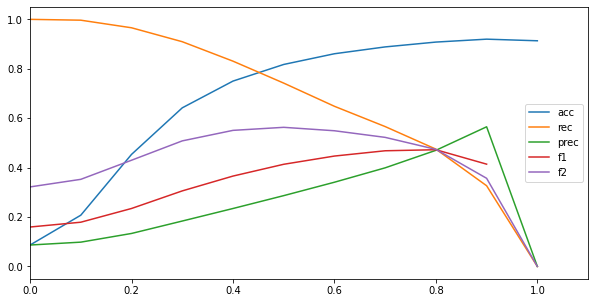

In [1076]:
plt.xlim(0,1.1)
sns.lineplot(x=thresholds_, y=accuracies, label='acc')
sns.lineplot(x=thresholds_, y=recalls, label='rec')
sns.lineplot(x=thresholds_, y=precs, label='prec')
sns.lineplot(x=thresholds_, y=fones, label='f1')
sns.lineplot(x=thresholds_, y=fbetas, label='f2')

In [1080]:
# we are seeing tradeoff between precision and recall. 

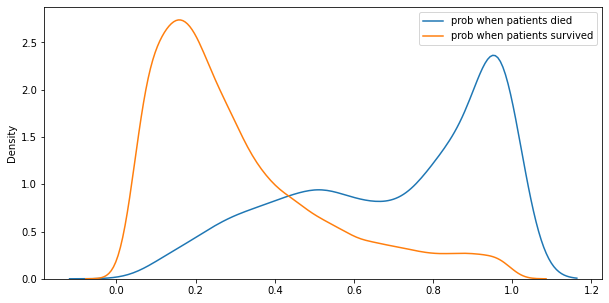

In [1086]:
# Predicted Probabilities of both the classes
sns.kdeplot(pd.Series(y_test_hat_probs)[y_test==1], label='prob when patients died')
sns.kdeplot(pd.Series(y_test_hat_probs)[y_test==0], label='prob when patients survived')
plt.legend()

In [1087]:
# Coefficients

In [1088]:
lr_classifier.intercept_

array([-0.39540723])

In [1095]:
coeff = pd.Series(lr_classifier.coef_[0], index=top_features)
coeff.sort_values(ascending=False)[:20]

apache_4a_hospital_death_prob                 1.078761
ventilated_apache                             0.601235
apache_3j_bodysystem_Sepsis                   0.286294
d1_heartrate_max                              0.246703
pre_icu_los_days                              0.141461
gcs_verbal_apache                             0.006954
temp_apache                                  -0.018392
gcs_motor_apache                             -0.041034
intubated_apache                             -0.059524
gcs_eyes_apache                              -0.071331
d1_mbp_min                                   -0.090767
apache_post_operative                        -0.092880
d1_diasbp_min                                -0.100482
d1_sysbp_min                                 -0.162450
d1_temp_min                                  -0.175748
icu_admit_source_Operating Room / Recovery   -0.198168
d1_spo2_min                                  -0.225771
apache_4a_icu_death_prob                     -0.415555
elective_s

In [488]:
df['apache_post_operative'].value_counts()

0    73269
1    18444
Name: apache_post_operative, dtype: int64

In [491]:
coeff.sort_values(ascending=True)[:20]

apache_post_operative                        -1.414961
apache_3j_bodysystem_Gynecological           -0.660751
apache_2_bodysystem_Metabolic                -0.630707
apache_3j_bodysystem_Metabolic               -0.630707
icu_admit_source_Operating Room / Recovery   -0.610160
elective_surgery                             -0.607710
apache_2_bodysystem_Undefined diagnoses      -0.600960
icu_admit_source_Accident & Emergency        -0.271498
apache_3j_bodysystem_Genitourinary           -0.245567
icu_type_CSICU                               -0.236450
apache_2_bodysystem_Renal/Genitourinary      -0.234749
d1_spo2_min                                  -0.230502
diabetes_mellitus                            -0.212211
ethnicity_African American                   -0.187204
intubated_apache                             -0.185366
d1_mbp_min                                   -0.168790
ethnicity_Asian                              -0.168209
d1_temp_min                                  -0.154868
apache_3j_

## Decision Tree

In [1098]:
dt_tf = DecisionTreeClassifier(max_depth=6, min_samples_split=30, class_weight='balanced', random_state=100)
get_cv_results(dt_tf, X_train_scaled[top_features], y_train)

CV scores (mean, std) for  DecisionTreeClassifier(class_weight='balanced', max_depth=6,
                       min_samples_split=30, random_state=100)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


f1: 0.35832119079953106 0.004782901238384609 [0.35514798 0.36607143 0.36176349 0.35465865 0.3539644 ]


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


f2: 0.5333197432305011 0.007359482474265095 [0.52899541 0.5408971  0.54137378 0.52192594 0.53340649]


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


roc: 0.8518726545588503 0.0034590619369631666 [0.84718421 0.85708434 0.85422266 0.84971769 0.85115438]
acc: 0.7595558335939944 0.0058997814215088476 [0.75805443 0.76681264 0.75774163 0.76493588 0.75023459]


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.8s finished


(0.35832119079953106,
 0.5333197432305011,
 0.8518726545588503,
 0.7595558335939944)

In [1171]:
dt_tf = DecisionTreeClassifier(max_depth=6, min_samples_split=30, class_weight='balanced', random_state=100)
dt_tf.fit(X_train_scaled[top_features], y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=6,
                       min_samples_split=30, random_state=100)

ROC AUC: 85.9687
f2 Score: 54.5855 %
Avg Precision Score: 0.43

              precision    recall  f1-score   support

           0       0.98      0.75      0.85     25027
           1       0.24      0.81      0.37      2376

    accuracy                           0.76     27403
   macro avg       0.61      0.78      0.61     27403
weighted avg       0.91      0.76      0.81     27403



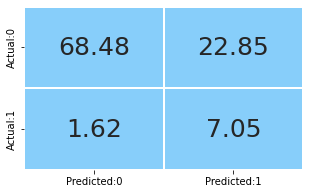

In [1172]:
y_test_hat = dt_tf.predict(X_test_scaled[top_features])
y_test_hat_probs = dt_tf.predict_proba(X_test_scaled[top_features])[:,1]
display_model_results(y_test, y_test_hat, y_test_hat_probs, True)

## Random Forest

In [1101]:
rf_tf = RandomForestClassifier(max_depth=6, min_samples_split=30, class_weight='balanced', random_state=100)
get_cv_results(rf_tf, X_train_scaled[top_features], y_train)

CV scores (mean, std) for  RandomForestClassifier(class_weight='balanced', max_depth=6,
                       min_samples_split=30, random_state=100)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   13.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


f1: 0.399497163243897 0.004648306710788066 [0.39871858 0.40365648 0.40274491 0.39081583 0.40155001]


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   13.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


f2: 0.5586571050406042 0.008932383540027218 [0.55312457 0.5659741  0.56877423 0.54429174 0.56112089]


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   13.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


roc: 0.8667965396476334 0.006500103886176311 [0.86154616 0.87309182 0.87392145 0.85723795 0.86818532]
acc: 0.8059430716296528 0.002156119019243696 [0.80919612 0.80614639 0.80262746 0.80497341 0.80677197]


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   13.6s finished


(0.399497163243897, 0.5586571050406042, 0.8667965396476334, 0.8059430716296528)

In [1103]:
rf_tf = RandomForestClassifier(max_depth=6, min_samples_split=30, class_weight='balanced', random_state=100)
rf_tf.fit(X_train[top_features], y_train)

RandomForestClassifier(class_weight='balanced', max_depth=6,
                       min_samples_split=30, random_state=100)

ROC AUC: 87.1457
f2 Score: 56.5172 %
Avg Precision Score: 0.47

              precision    recall  f1-score   support

           0       0.97      0.81      0.88     25027
           1       0.28      0.77      0.41      2376

    accuracy                           0.80     27403
   macro avg       0.62      0.79      0.64     27403
weighted avg       0.91      0.80      0.84     27403



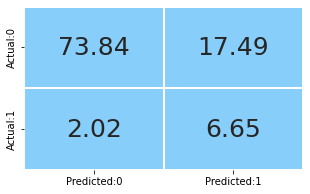

In [1104]:
y_test_hat = rf_tf.predict(X_test[top_features])
y_test_hat_probs = rf_tf.predict_proba(X_test[top_features])[:,1]
display_model_results(y_test, y_test_hat, y_test_hat_probs, True)

## XGBoost

In [1110]:
from xgboost import XGBClassifier

In [1136]:
xgb_model = XGBClassifier( use_label_encoder=False, scale_pos_weight=10)
xgb_model.fit(X_train_scaled[top_features], y_train, eval_metric=ftwo_scorer)

[09:44:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=10, subsample=1,
              tree_method='exact', use_label_encoder=False,
              validate_parameters=1, verbosity=None)

In [1137]:
y_test_hat = xgb_model.predict(X_test_scaled[top_features])
y_test_hat_probs = xgb_model.predict_proba(X_test_scaled[top_features])[:,1]

ROC AUC: 85.5877
f2 Score: 54.0917 %
Avg Precision Score: 0.45

              precision    recall  f1-score   support

           0       0.96      0.86      0.91     25027
           1       0.31      0.67      0.42      2376

    accuracy                           0.84     27403
   macro avg       0.63      0.76      0.66     27403
weighted avg       0.91      0.84      0.86     27403



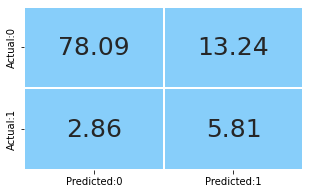

In [1138]:
display_model_results(y_test, y_test_hat, y_test_hat_probs, True)

In [1139]:
pd.Series(xgb_model.feature_importances_, index=top_features).sort_values(ascending=False).iloc[:20]

apache_4a_hospital_death_prob                 0.264002
apache_4a_icu_death_prob                      0.133453
ventilated_apache                             0.074009
elective_surgery                              0.063745
apache_3j_bodysystem_Metabolic                0.047986
d1_sysbp_min                                  0.037215
d1_spo2_min                                   0.033798
apache_post_operative                         0.033186
gcs_verbal_apache                             0.030795
icu_admit_source_Operating Room / Recovery    0.029486
d1_temp_min                                   0.028989
d1_heartrate_max                              0.028836
apache_3j_bodysystem_Sepsis                   0.028356
pre_icu_los_days                              0.025755
temp_apache                                   0.024886
d1_diasbp_min                                 0.024641
gcs_eyes_apache                               0.024533
d1_mbp_min                                    0.024426
gcs_motor_

## PCA for Dimention reduction

In [1499]:
from sklearn.decomposition import PCA

In [1500]:
len(numerical_columns)

43

In [1585]:
n_pca = 15
pca = PCA(n_components=n_pca)

In [1586]:
pca_train = pca.fit_transform(X_train_scaled[numerical_columns])
pca_test = pca.transform(X_test_scaled[numerical_columns])

In [1587]:
pca.explained_variance_ratio_.sum()

0.7699648656380191

In [1588]:
pca_train_df = pd.DataFrame(data = pca_train, columns = ['PC'+str(i) for i in range(1, n_pca+1)])
pca_test_df = pd.DataFrame(data = pca_test, columns = ['PC'+str(i) for i in range(1, n_pca+1)])

In [1589]:
X_train_pca = pd.concat([pca_train_df, X_train[df_best_features_chi2[:5].index.tolist()]], axis = 1)
X_test_pca = pd.concat([pca_test_df, X_test[df_best_features_chi2[:5].index.tolist()]], axis = 1)

In [1590]:
model = LogisticRegression(max_iter=1000, class_weight='balanced', random_state = 100)

In [1591]:
model.fit(X_train_pca, y_train)

LogisticRegression(class_weight='balanced', max_iter=1000, random_state=100)

In [1592]:
y_test_pred = model.predict(X_test_pca)
y_test_pred_prob = model.predict_proba(X_test_pca)[:,1]

ROC AUC: 86.6812
f2 Score: 56.3801 %
Avg Precision Score: 0.46

              precision    recall  f1-score   support

           0       0.97      0.83      0.89     25027
           1       0.29      0.74      0.42      2376

    accuracy                           0.82     27403
   macro avg       0.63      0.78      0.65     27403
weighted avg       0.91      0.82      0.85     27403



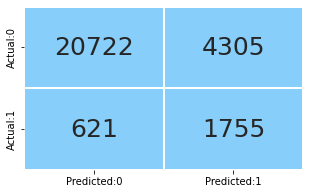

In [1593]:
display_model_results(y_test, y_test_pred, y_test_pred_prob)

## AutoML

## Hybridization: SMOTE + TOMEK LINKS
### for Target since target is imbalanced  

SMOTE+TOMEK is such a hybrid technique that aims to clean overlapping data points for each of the classes distributed in sample space. After the oversampling is done by SMOTE, the class clusters may be invading each other’s space. As a result, the classifier model will be overfitting. Now, Tomek links are the opposite class paired samples that are the closest neighbors to each other. Therefore the majority of class observations from these links are removed as it is believed to increase the class separation near the decision boundaries. Now, to get better class clusters, Tomek links are applied to oversampled minority class samples done by SMOTE. Thus instead of removing the observations only from the majority class, we generally remove both the class observations from the Tomek links.
Reference:

https://www.analyticsvidhya.com/blog/2020/10/overcoming-class-imbalance-using-smote-techniques/

In [1129]:
from imblearn.combine import SMOTEENN, SMOTETomek
from collections import Counter

In [1146]:
y_train.shape

(63940,)

In [1147]:
# SMOTE + TOMEK for train data
counter = Counter(y_train)
print('Before SMOTE : ', counter)

smt = SMOTETomek(sampling_strategy='minority', random_state=100)
X_train_smt, y_train_smt = smt.fit_resample(X_train_scaled[top_features], y_train)

counter = Counter(y_train_smt)
print('After SMOTE : ', counter)

Before SMOTE :  Counter({0: 58514, 1: 5426})
After SMOTE :  Counter({0: 58425, 1: 58425})


In [1148]:
print('data shape before smote')
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

data shape before smote
(63940, 107) (27403, 107) (63940,) (27403,)


In [1149]:
print('data shape after smote')
print(X_train_smt.shape, X_test.shape, y_train_smt.shape, y_test.shape)

data shape after smote
(116850, 20) (27403, 107) (116850,) (27403,)


In [1164]:
lr = LogisticRegression(max_iter=2000, random_state=100)
dt = DecisionTreeClassifier(max_depth=6, min_samples_split=30, random_state=100)
rf = RandomForestClassifier(max_depth=6, min_samples_split=30, random_state=100)
classifiers = [lr, dt, rf]
cl_names = ['lr', 'dt', 'rf']
results = []
for classifier, name in zip(classifiers, cl_names):
    res = evaluate_model(classifier, X_train_smt[top_features], y_train_smt, X_test_scaled[top_features], y_test)
    results.append(res)
    print(name, res)

lr {'f1': 40.97, 'f2': 56.27, 'roc': 86.69, 'acc': 81.28}
dt {'f1': 39.03, 'f2': 52.39, 'roc': 84.0, 'acc': 81.61}
rf {'f1': 40.65, 'f2': 56.01, 'roc': 86.45, 'acc': 81.04}


### HyperParameter Tuning for Logistic Regression Classifier <a class="anchor" id="tenth-bullet"></a>

In [513]:
from sklearn.model_selection import GridSearchCV, GroupKFold

In [1251]:
tuned_paramaters = [{'solver': ['newton-cg', 'lbfgs', 'sag', 'saga'],
                     'penalty': ['l1', 'l2', 'elasticnet', 'none'],
                     'C': [100, 10, 1.0, 0.1, 0.01],
                     'class_weight': ['balanced', {0:1, 1:5}, {0:1, 1:8}],
                     'max_iter': [2000]}]
 
log_reg = LogisticRegression(random_state = 10)

logreg_grid = GridSearchCV(estimator = log_reg, 
                       param_grid = tuned_paramaters, 
                       scoring=ftwo_scorer,
                       cv = 5)

In [ ]:
# use fit() to fit the model on the train set
logreg_grid_model = logreg_grid.fit(X_train_scaled[top_features], y_train)

In [1253]:
# get the best parameters
print('Best parameters for Logistic Regression classifier: ', logreg_grid_model.best_params_, '\n')

Best parameters for Logistic Regression classifier:  {'C': 0.01, 'class_weight': 'balanced', 'max_iter': 2000, 'penalty': 'l1', 'solver': 'saga'} 



In [1254]:
# Save the model and reload

In [1255]:
from joblib import dump, load

In [1256]:
dump(logreg_grid_model, 'logreg_grid_model.joblib') 

['logreg_grid_model.joblib']

In [786]:
logreg_grid_model2 = load('logreg_grid_model.joblib')

In [1258]:
def get_tuning_results(res):
    ranks = pd.Series(res['rank_test_score'])
    params = pd.Series(res['params'])
    scores0 = pd.Series(res['split0_test_score'])
    scores_mean = pd.Series(res['mean_test_score'])
    scores_std = pd.Series(res['std_test_score'])
    params_exp = params.apply(pd.Series)
    results = pd.concat([ranks, scores_mean, scores_std, scores0, params, params_exp], axis=1)
    results.columns = ['ranks', 'scores_mean', 'scores_std', 'scores0', 'params'] + params_exp.columns.tolist()
    results = results.sort_values(by=['ranks'])[:20]
    return results

In [1270]:
def try_grid_params(params):
    params2 = {'random_state': 100}
    params2.update(params)
    model_temp = LogisticRegression(**params2)
    model_temp.fit(X_train_scaled[top_features], y_train)
    y_test_hat = model_temp.predict(X_test_scaled[top_features])
    y_test_hat_probs = model_temp.predict_proba(X_test_scaled[top_features])[:,1]
    f2score = fbeta_score(y_test, y_test_hat, beta=2)
    auc_roc = roc_auc_score(y_test, y_test_hat_probs)*100
    avg_prec_score = average_precision_score(y_test, y_test_hat_probs)
    rep = classification_report(y_test, y_test_hat, output_dict=True)
    prec = rep['1']['precision']
    recall = rep['1']['recall']
    f1score = rep['1']['f1-score']
    accuracy = rep['accuracy']
    return pd.Series([f1score, f2score, auc_roc, accuracy, prec, recall])

In [1271]:
results_lr = get_tuning_results(logreg_grid_model.cv_results_)
results_lr[:5]

ranks  scores_mean  scores_std   scores0  \
195      1     0.554745    0.008122  0.549738   
197      2     0.553635    0.006539  0.551656   
199      3     0.553620    0.006561  0.551579   
198      4     0.553620    0.006536  0.551656   
196      4     0.553620    0.006536  0.551656   

                                                                                                params  \
195       {'C': 0.01, 'class_weight': 'balanced', 'max_iter': 2000, 'penalty': 'l1', 'solver': 'saga'}   
197      {'C': 0.01, 'class_weight': 'balanced', 'max_iter': 2000, 'penalty': 'l2', 'solver': 'lbfgs'}   
199       {'C': 0.01, 'class_weight': 'balanced', 'max_iter': 2000, 'penalty': 'l2', 'solver': 'saga'}   
198        {'C': 0.01, 'class_weight': 'balanced', 'max_iter': 2000, 'penalty': 'l2', 'solver': 'sag'}   
196  {'C': 0.01, 'class_weight': 'balanced', 'max_iter': 2000, 'penalty': 'l2', 'solver': 'newton-cg'}   

        C class_weight  max_iter penalty     solver  
195  0.01     balanced      2000      l1       saga  
197  0.01     balanced      2000      l2      lbfgs  
199  0.01     balanced      2000      l2       saga  
198  0.01     balanced      2000      l2        sag  
196  0.01     balanced      2000      l2  newton-cg

In [1272]:
results_lr_all = results_lr[:10]['params'].apply(try_grid_params)

results_lr_all.columns = ['f1', 'f2', 'roc', 'acc', 'prec', 'recall']
results_lr_all.insert(0, 'rank', results_lr[:10]['ranks'])
results_lr_all.insert(1, 'params', results_lr[:10]['params'])
results_lr_all[:10]

c:\users\sparsh singhal\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
c:\users\sparsh singhal\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


rank  \
195     1   
197     2   
199     3   
198     4   
196     4   
147     6   
157     7   
109     7   
5       7   
61      7   

                                                                                                params  \
195       {'C': 0.01, 'class_weight': 'balanced', 'max_iter': 2000, 'penalty': 'l1', 'solver': 'saga'}   
197      {'C': 0.01, 'class_weight': 'balanced', 'max_iter': 2000, 'penalty': 'l2', 'solver': 'lbfgs'}   
199       {'C': 0.01, 'class_weight': 'balanced', 'max_iter': 2000, 'penalty': 'l2', 'solver': 'saga'}   
198        {'C': 0.01, 'class_weight': 'balanced', 'max_iter': 2000, 'penalty': 'l2', 'solver': 'sag'}   
196  {'C': 0.01, 'class_weight': 'balanced', 'max_iter': 2000, 'penalty': 'l2', 'solver': 'newton-cg'}   
147        {'C': 0.1, 'class_weight': 'balanced', 'max_iter': 2000, 'penalty': 'l1', 'solver': 'saga'}   
157     {'C': 0.1, 'class_weight': 'balanced', 'max_iter': 2000, 'penalty': 'none', 'solver': 'lbfgs'}   
109     {'C': 1.0, 'class_weight': 'balanced', 'max_iter': 2000, 'penalty': 'none', 'solver': 'lbfgs'}   
5         {'C': 100, 'class_weight': 'balanced', 'max_iter': 2000, 'penalty': 'l2', 'solver': 'lbfgs'}   
61       {'C': 10, 'class_weight': 'balanced', 'max_iter': 2000, 'penalty': 'none', 'solver': 'lbfgs'}   

           f1        f2        roc       acc      prec    recall  
195  0.417961  0.562358  86.802970  0.823559  0.292699  0.730640  
197  0.415680  0.563511  86.765087  0.819947  0.289222  0.738636  
199  0.415631  0.563475  86.765184  0.819910  0.289174  0.738636  
198  0.415443  0.563190  86.765161  0.819874  0.289057  0.738215  
196  0.415631  0.563475  86.765145  0.819910  0.289174  0.738636  
147  0.413817  0.563016  86.778432  0.817940  0.287042  0.741162  
157  0.413365  0.562971  86.771738  0.817392  0.286480  0.742003  
109  0.413365  0.562971  86.771738  0.817392  0.286480  0.742003  
5    0.413413  0.563007  86.771961  0.817429  0.286527  0.742003  
61   0.413365  0.562971  86.771738  0.817392  0.286480  0.742003

In [1273]:
# Model builing with tuned parameters
model_lr_tuned = LogisticRegression(random_state=100, **logreg_grid_model.best_params_)
model_lr_tuned.fit(X_train_scaled[top_features], y_train)

LogisticRegression(C=0.01, class_weight='balanced', max_iter=2000, penalty='l1',
                   random_state=100, solver='saga')

ROC AUC: 86.2821
f2 Score: 55.5493 %
Avg Precision Score: 0.46

              precision    recall  f1-score   support

           0       0.97      0.83      0.90     58514
           1       0.29      0.73      0.41      5426

    accuracy                           0.82     63940
   macro avg       0.63      0.78      0.65     63940
weighted avg       0.91      0.82      0.85     63940



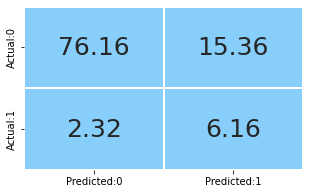

In [1277]:
y_train_hat = model_lr_tuned.predict(X_train_scaled[top_features])
y_train_hat_probs = model_lr_tuned.predict_proba(X_train_scaled[top_features])[:,1]
display_model_results(y_train, y_train_hat, y_train_hat_probs, True)

ROC AUC: 86.8030
f2 Score: 56.2358 %
Avg Precision Score: 0.47

              precision    recall  f1-score   support

           0       0.97      0.83      0.90     25027
           1       0.29      0.73      0.42      2376

    accuracy                           0.82     27403
   macro avg       0.63      0.78      0.66     27403
weighted avg       0.91      0.82      0.85     27403



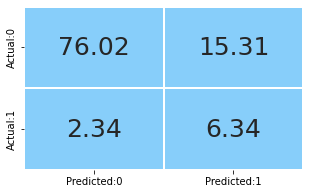

In [1278]:
y_test_hat = model_lr_tuned.predict(X_test_scaled[top_features])
y_test_hat_probs = model_lr_tuned.predict_proba(X_test_scaled[top_features])[:,1]
display_model_results(y_test, y_test_hat, y_test_hat_probs, True)

### Hyperparameter tuning for decision tree

In [873]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [1162]:
X_train.shape[0] / (2 * np.bincount(y_train))

array([0.54636497, 5.89200147])

In [1229]:
tuning_paramaters = [{'criterion' : ["gini", "entropy"],
                     'max_depth': [5, 6, 7, 8, 9, 10],
                     'min_samples_split': [2, 5, 20, 40],
                     'class_weight': ['balanced', {0:1, 1:4}]}]

dt_est = DecisionTreeClassifier(random_state = 100)

dt_grid = GridSearchCV(estimator = dt_est, 
                       param_grid = tuning_paramaters, 
                       scoring=ftwo_scorer,
                       cv = 5)

In [1230]:
# use fit() to fit the model on the train set
dt_grid_model = dt_grid.fit(X_train[top_features], y_train)

In [1231]:
# get the best parameters
print('Best parameters for random forest classifier: ', dt_grid_model.best_params_, '\n')

Best parameters for random forest classifier:  {'class_weight': 'balanced', 'criterion': 'entropy', 'max_depth': 6, 'min_samples_split': 40} 



In [1232]:
# Save the model and reload

In [1233]:
from joblib import dump, load

In [1234]:
dump(dt_grid_model, 'dt_grid_model1.joblib') 

['dt_grid_model1.joblib']

In [1264]:
results_dt = get_tuning_results(dt_grid_model.cv_results_)
results_dt[:5]

ranks  scores_mean  scores_std   scores0  \
31      1     0.533766    0.009565  0.527486   
30      2     0.533669    0.009623  0.527390   
29      3     0.533559    0.009698  0.526837   
28      3     0.533559    0.009698  0.526837   
34      5     0.533543    0.010004  0.523960   

                                                                                           params  \
31  {'class_weight': 'balanced', 'criterion': 'entropy', 'max_depth': 6, 'min_samples_split': 40}   
30  {'class_weight': 'balanced', 'criterion': 'entropy', 'max_depth': 6, 'min_samples_split': 20}   
29   {'class_weight': 'balanced', 'criterion': 'entropy', 'max_depth': 6, 'min_samples_split': 5}   
28   {'class_weight': 'balanced', 'criterion': 'entropy', 'max_depth': 6, 'min_samples_split': 2}   
34  {'class_weight': 'balanced', 'criterion': 'entropy', 'max_depth': 7, 'min_samples_split': 20}   

   class_weight criterion  max_depth  min_samples_split  
31     balanced   entropy          6                 40  
30     balanced   entropy          6                 20  
29     balanced   entropy          6                  5  
28     balanced   entropy          6                  2  
34     balanced   entropy          7                 20

In [1265]:
def try_params_decisiontree(params):
    params2 = {'random_state': 100}
    params2.update(params)
    model_temp = DecisionTreeClassifier(**params2)
    model_temp.fit(X_train[top_features], y_train)
    y_test_hat = model_temp.predict(X_test[top_features])
    y_test_hat_probs = model_temp.predict_proba(X_test[top_features])[:,1]
    f2score = fbeta_score(y_test, y_test_hat, beta=2)
    auc_roc = roc_auc_score(y_test, y_test_hat_probs)*100
    avg_prec_score = average_precision_score(y_test, y_test_hat_probs)
    rep = classification_report(y_test, y_test_hat, output_dict=True)
    prec = rep['1']['precision']
    recall = rep['1']['recall']
    f1score = rep['1']['f1-score']
    accuracy = rep['accuracy']
    return pd.Series([f1score, f2score, auc_roc, accuracy, prec, recall])

In [ ]:
results_dt_all = results_dt['params'].apply(try_params_decisiontree)

results_dt_all.columns = ['f1', 'f2', 'roc', 'acc', 'prec', 'recall']
results_dt_all.insert(0, 'rank', results_dt['ranks'])
results_dt_all.insert(1, 'params', results_dt['params'])
results_dt_all[:10]

In [1244]:
# Model builing with tuned parameters
model_dt_tuned = DecisionTreeClassifier(random_state=100, **dt_grid_model.best_params_)
model_dt_tuned.fit(X_train[top_features], y_train)

DecisionTreeClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=6, min_samples_split=40, random_state=100)

ROC AUC: 86.7046
f2 Score: 55.0768 %
Avg Precision Score: 0.46

              precision    recall  f1-score   support

           0       0.98      0.78      0.87     58514
           1       0.25      0.79      0.38      5426

    accuracy                           0.78     63940
   macro avg       0.61      0.78      0.62     63940
weighted avg       0.91      0.78      0.82     63940



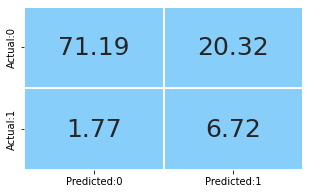

In [1246]:
y_train_hat = model_dt_tuned.predict(X_train[top_features])
y_train_hat_probs = model_dt_tuned.predict_proba(X_train[top_features])[:,1]
display_model_results(y_train, y_train_hat, y_train_hat_probs, True)

ROC AUC: 86.0086
f2 Score: 55.1510 %
Avg Precision Score: 0.45

              precision    recall  f1-score   support

           0       0.97      0.78      0.87     25027
           1       0.25      0.78      0.38      2376

    accuracy                           0.78     27403
   macro avg       0.61      0.78      0.62     27403
weighted avg       0.91      0.78      0.82     27403



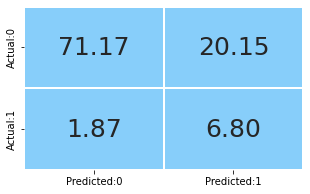

In [1247]:
y_test_hat = model_dt_tuned.predict(X_test[top_features])
y_test_hat_probs = model_dt_tuned.predict_proba(X_test[top_features])[:,1]
display_model_results(y_test, y_test_hat, y_test_hat_probs, True)

In [1248]:
# We can observe that there is no overfitting and we get good results with these parameters

In [1281]:
from sklearn.tree import plot_tree

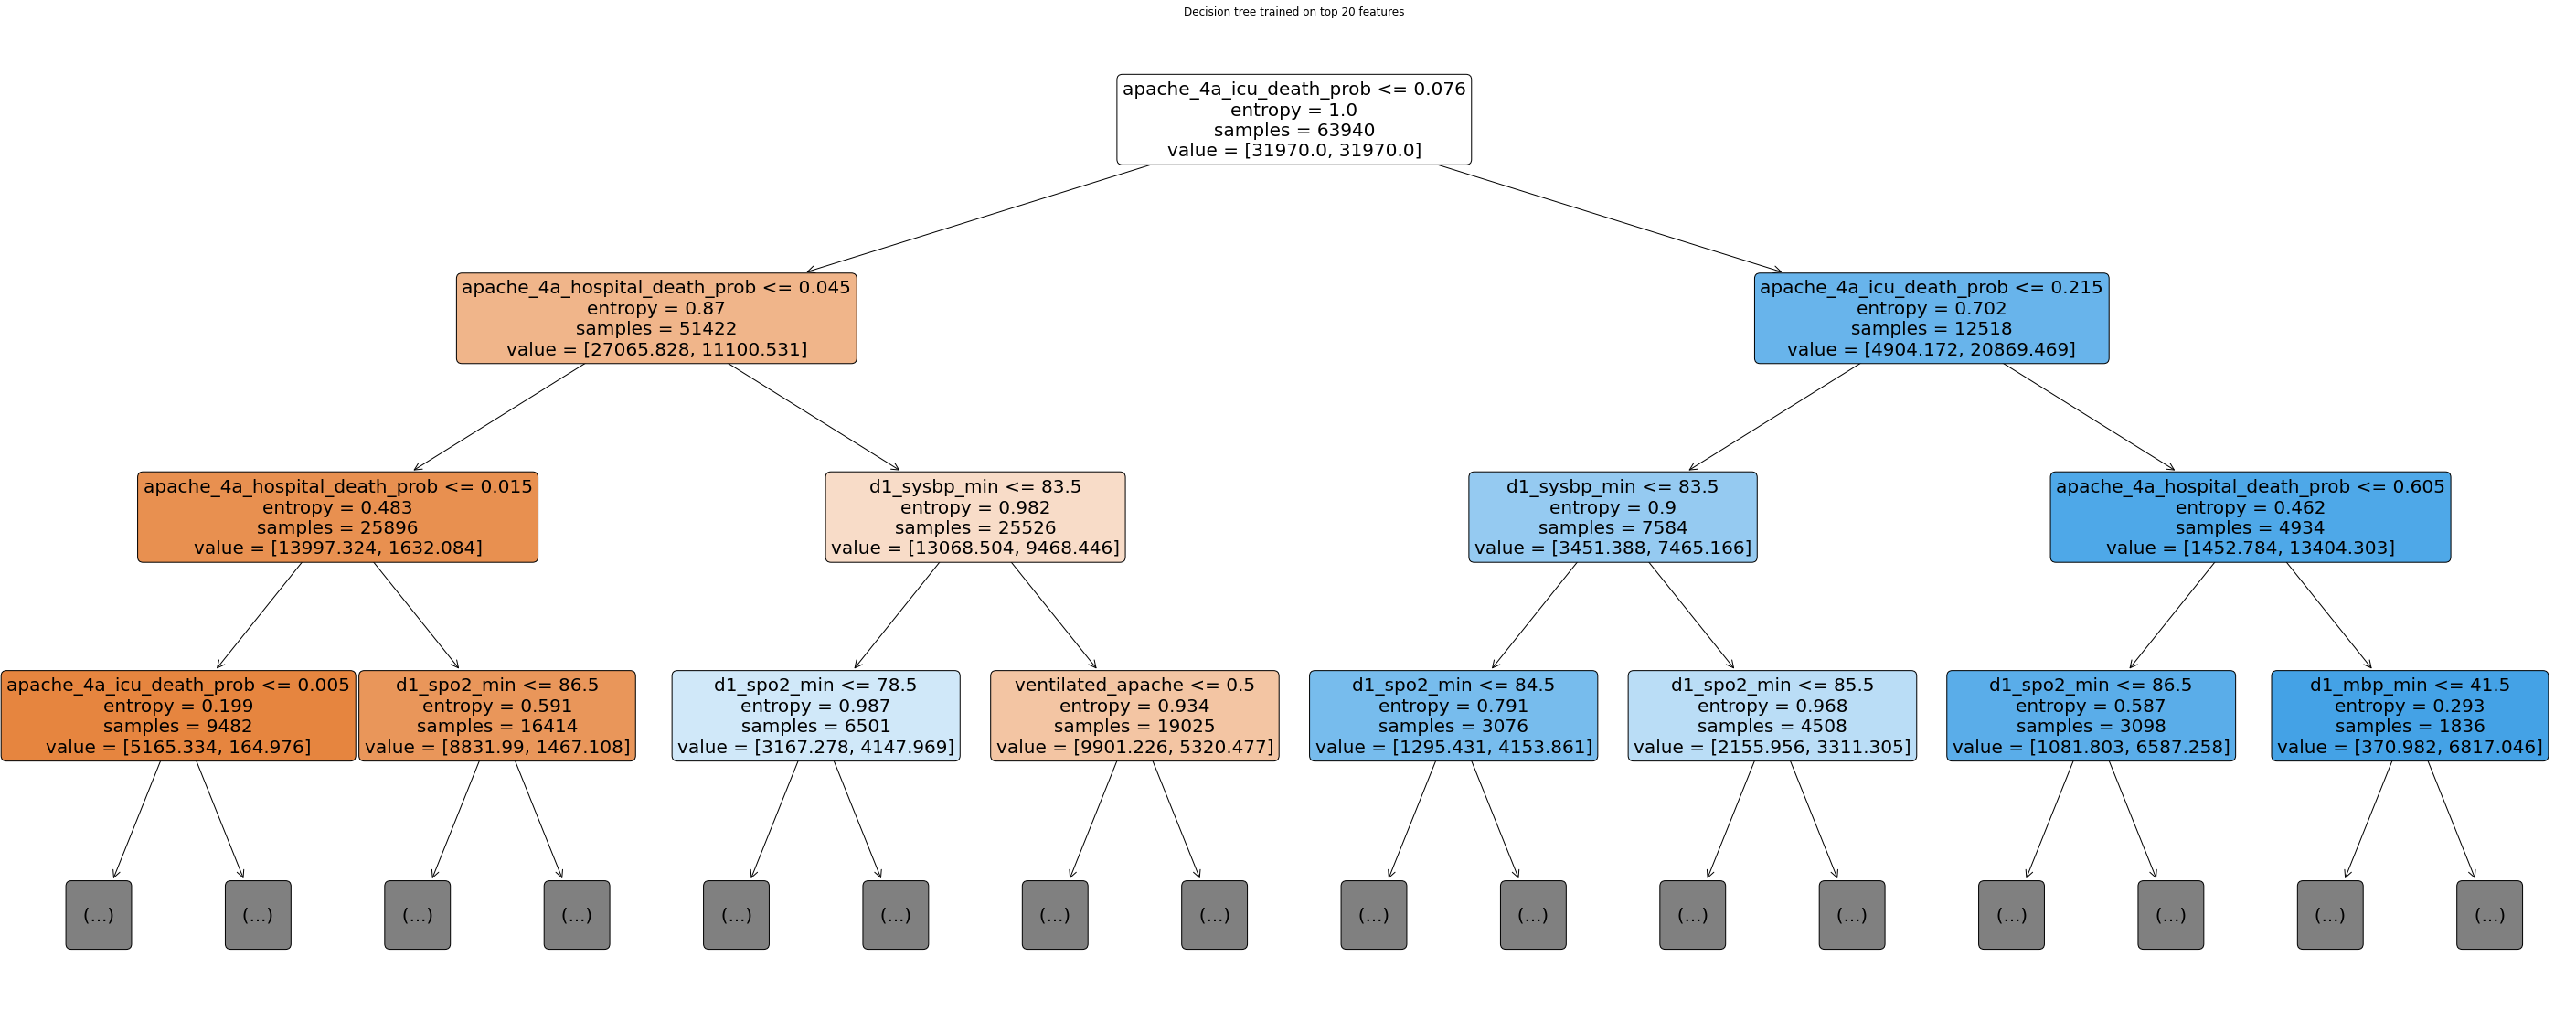

In [1286]:
plt.figure(figsize=(50,20))
plot_tree(model_dt_tuned, filled=True, max_depth=3, feature_names=top_features, fontsize=20, rounded=True)
plt.title("Decision tree trained on top 20 features")
plt.show()

In [1285]:
important_features = pd.Series(model_dt_tuned.feature_importances_, index=model_dt_tuned.feature_names_in_).sort_values(ascending=False)
important_features[:10]

apache_4a_icu_death_prob         0.639774
apache_4a_hospital_death_prob    0.207638
d1_sysbp_min                     0.053154
d1_spo2_min                      0.034306
d1_heartrate_max                 0.019417
ventilated_apache                0.013914
pre_icu_los_days                 0.008070
d1_mbp_min                       0.006143
d1_diasbp_min                    0.005205
elective_surgery                 0.004568
dtype: float64

In [1308]:
# We chose Decision Tree as our final model since it performs almost similar to other models and it is highly interpretable.
# We achieved a f2 score of 55% and ROC AUC score 86%.